# Import Thư Viện

In [2]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import folium
from IPython.display import HTML
from folium.plugins import MarkerCluster

import seaborn as sns
from plotly.offline import iplot

pd.set_option("display.max_columns", None)
pd.options.display.float_format = "{:,.1f}".format

from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import IsolationForest


# Thư viện cho feature selection và engineering
from sklearn.feature_selection import SelectKBest, f_classif, RFE
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score

# Thư viện cho mô hình
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

# Thư viện để xử lý imbalanced data
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Thư viện cho đánh giá mô hình
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score,
    roc_auc_score, confusion_matrix, classification_report,
    roc_curve, precision_recall_curve, auc
)
from sklearn.ensemble import RandomForestRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import joblib

import warnings
warnings.filterwarnings('ignore')

# 1.Phân Tích Hành Vi Mua Sắm Của Khách Hàng 

In [3]:
# setting màu 
colors = ["#89CFF0", "#FF69B4", "#FFD700", "#7B68EE", "#FF4500",
          "#9370DB", "#32CD32", "#8A2BE2", "#FF6347", "#20B2AA",
          "#FF69B4", "#00CED1", "#FF7F50", "#7FFF00", "#DA70D6"]

In [4]:
df_processed =pd.read_csv(r'C:\study\do_an_2\data\shopping_trends_updated.csv')
df_processed

Customer ID  Age  Gender Item Purchased     Category  \
0               1   55    Male         Blouse     Clothing   
1               2   19    Male        Sweater     Clothing   
2               3   45    Male         Blouse     Clothing   
3               4   46    Male       Sneakers     Footwear   
4               5   27    Male         Shorts     Clothing   
...           ...  ...     ...            ...          ...   
3895         3896   24    Male           Belt    Outerwear   
3896         3897   56    Male         Shorts     Clothing   
3897         3898   36    Male         Gloves  Accessories   
3898         3899   45    Male       Sneakers    Outerwear   
3899         3900   56  Female          Boots    Outerwear   

      Purchase Amount (USD)        Location Size      Color  Season  \
0                        58        Kentucky    L       Gray  Winter   
1                        79           Maine    L     Maroon  Winter   
2                        64          Oregon    M  Turquoise  Spring   
3                        20         Wyoming    M      White  Summer   
4                        49       Louisiana    L   Charcoal  Winter   
...                     ...             ...  ...        ...     ...   
3895                     76         Vermont    S        Red  Winter   
3896                     61        Kentucky    L       Cyan  Summer   
3897                     26  North Carolina    L       Pink  Spring   
3898                     54        Michigan   XL       Pink  Winter   
3899                     25        Virginia    M       Gray  Winter   

      Review Rating Subscription Status   Shipping Type Discount Applied  \
0               3.1                 Yes         Express              Yes   
1               3.1                 Yes         Express              Yes   
2               2.7                 Yes   Free Shipping              Yes   
3               2.9                 Yes        Standard              Yes   
4               3.2                 Yes   Free Shipping              Yes   
...             ...                 ...             ...              ...   
3895            3.4                  No  2-Day Shipping               No   
3896            5.0                 Yes    Next Day Air              Yes   
3897            2.9                 Yes    Store Pickup              Yes   
3898            3.9                  No         Express               No   
3899            2.7                  No         Express               No   

     Promo Code Used  Previous Purchases Payment Method Frequency of Purchases  
0                Yes                  14          Venmo                Monthly  
1                Yes                   2           Cash                Monthly  
2                Yes                  31         PayPal               Annually  
3                Yes                  14          Venmo                 Weekly  
4                Yes                  19    Credit Card                 Weekly  
...              ...                 ...            ...                    ...  
3895              No                  44     Debit Card               Annually  
3896             Yes                   7  Bank Transfer               Annually  
3897             Yes                   3     Debit Card               Annually  
3898              No                  35  Bank Transfer               Annually  
3899              No                  49    Credit Card               Annually  

[3900 rows x 18 columns]

In [5]:
df_processed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

Bộ dữ liệu Customer Shopping Trends từ Kaggle chứa thông tin về:
+ 3.900 khách hàng mua sắm trực tuyến
+ 18 cột đặc trưng bao gồm thông tin nhân khẩu học, sản phẩm đã mua, hành vi mua sắm và thông tin thanh toán. Bộ dữ liệu phục vụ cho việc phân tích hành vi tiêu dùng, phân nhóm khách hàng và dự đoán chi tiêu mua sắm.

Cụ thể:

1. Thông tin nhân khẩu học:
    - Customer ID: Mã định danh khách hàng
    - Age: Tuổi của khách hàng
    - Gender: Giới tính (Male/Female)
    - Location: Khu vực sinh sống
2. Thông tin sản phẩm và hành vi mua sắm:
    - Item Purchased: Tên sản phẩm đã mua
    - Category: Danh mục sản phẩm (quần áo, giày, v.v.)
    - Size: Cỡ sản phẩm (S, M, L, XL...)
    - Color: Màu sắc sản phẩm
    - Season: Mùa mua sắm (Xuân, Hạ, Thu, Đông)
    - Review Rating: Đánh giá sản phẩm từ 1 đến 5 sao
    - Previous Purchases: Số lần mua hàng trước đó
3. Thông tin thanh toán và ưu đãi:
    - Purchase Amount (USD): Số tiền giao dịch (đơn vị: USD)
    - Discount Applied: Có áp dụng giảm giá không (Yes/No)
    - Promo Code Used: Có dùng mã khuyến mãi không (Yes/No)
    - Subscription Status: Đã đăng ký nhận tin khuyến mãi chưa
    - Payment Method: Phương thức thanh toán (Credit Card, PayPal,.)
4. Thông tin giao hàng và phản hồi:
    - Shipping Type: Hình thức giao hàng (Standard, Express, v.v.)
    - Feedback: Phản hồi văn bản của khách hàng về sản phẩm/dịch vụ

Bộ dữ liệu shopping_trends_updated gồm 3,900 bản ghi, cung cấp thông tin chi tiết về hành vi mua sắm của khách hàng, bao gồm dữ liệu nhân khẩu học, danh mục sản phẩm, mức chi tiêu, phương thức thanh toán và các yếu tố ảnh hưởng đến quyết định mua hàng. Với 18 cột dữ liệu, bộ dữ liệu này giúp khám phá mối quan hệ giữa độ tuổi, giới tính, danh mục sản phẩm, và thói quen mua sắm theo mùa. Đặc biệt, dữ liệu có thông tin về trạng thái đăng ký thành viên (Subscription Status), hình thức vận chuyển (Shipping Type), việc sử dụng mã giảm giá (Promo Code Used), giúp đánh giá hiệu quả của các chương trình ưu đãi. Ngoài ra, thông tin về phương thức thanh toán (Payment Method) và tần suất mua hàng (Frequency of Purchases) có thể hỗ trợ trong việc phân loại nhóm khách hàng theo mức độ trung thành. Bộ dữ liệu này không chỉ giúp phân tích xu hướng tiêu dùng, mà còn đóng vai trò quan trọng trong việc xây dựng chiến lược tiếp thị, tối ưu hóa danh mục sản phẩm và cải thiện trải nghiệm mua sắm của khách hàng.

In [6]:
# tìm hiểu các giá trị trong cột
for i in df_processed.columns:
    print("------------------------{}------------------------".format(i))
    print(df_processed[i].unique())

------------------------Customer ID------------------------
[   1    2    3 ... 3898 3899 3900]
------------------------Age------------------------
[55 19 45 46 27 26 57 53 61 65 64 25 52 66 21 56 31 18 38 54 36 35 29 70
 69 67 20 39 42 68 59 47 40 41 63 50 48 49 22 24 33 37 58 32 62 28 44 30
 43 34 51 23 60]
------------------------Gender------------------------
['Male' 'Female']
------------------------Item Purchased------------------------
['Blouse' 'Sweater' 'Sneakers' 'Shorts' 'Coat' 'Handbag' 'Shoes' 'Dress'
 'Sunglasses' 'Pants' 'Jacket' 'Hoodie' 'Jewelry' 'T-shirt' 'Jeans'
 'Scarf' 'Hat' 'Shirt' 'Skirt' 'Backpack' 'Belt' 'Boots' 'Gloves'
 'Sandals' 'Socks']
------------------------Category------------------------
['Clothing' 'Footwear' 'Outerwear' 'Accessories']
------------------------Purchase Amount (USD)------------------------
[ 58  79  64  20  49  97  31  34  69  56  50  36  43  53  80  66  42  88
  29  40  61  74  38  84  60  52  65  51  39 100  54  48  70  35  94  71
  5

In [7]:
df_processed.describe()

Customer ID     Age  Purchase Amount (USD)  Review Rating  \
count      3,900.0 3,900.0                3,900.0        3,900.0   
mean       1,950.5    44.1                   56.9            3.8   
std        1,126.0    15.2                   21.6            0.7   
min            1.0    18.0                   20.0            2.5   
25%          975.8    31.0                   38.0            3.1   
50%        1,950.5    44.0                   55.0            3.8   
75%        2,925.2    57.0                   76.0            4.4   
max        3,900.0    70.0                  100.0            5.0   

       Previous Purchases  
count             3,900.0  
mean                 25.4  
std                  14.4  
min                   1.0  
25%                  13.0  
50%                  25.0  
75%                  38.0  
max                  50.0

Nhận Xét:

Nhân khẩu học – Độ tuổi khách hàng Dữ liệu cho thấy độ tuổi trung bình của khách hàng là 44.1 tuổi với độ lệch chuẩn 15.2. Độ tuổi nhỏ nhất là 18 và lớn nhất là 70, với phần lớn khách hàng nằm trong nhóm 31–57 tuổi. Điều này cho thấy khách hàng chủ yếu thuộc nhóm trung niên, có khả năng chi tiêu ổn định và ưu tiên chất lượng sản phẩm hơn giá cả. Các chiến dịch tiếp thị có thể tập trung vào nhóm này với các thông điệp nhấn mạnh giá trị sản phẩm, sự tiện lợi và trải nghiệm mua sắm cao cấp. Nếu muốn mở rộng thị trường sang nhóm 18–30 tuổi, cần điều chỉnh chiến dịch tiếp thị để thu hút sự quan tâm của khách hàng trẻ thông qua quảng cáo trên mạng xã hội hoặc hợp tác với influencer.

Mức chi tiêu – Purchase Amount Mức chi tiêu trung bình của khách hàng là 56.9 USD, với độ lệch chuẩn 21.6 USD. Phân vị thứ 25 cho thấy 25% khách hàng chi tiêu dưới 38 USD, trong khi 25% khách hàng chi tiêu trên 76 USD. Điều này cho thấy có sự phân hóa khá rõ giữa các nhóm chi tiêu thấp và cao. Nhóm khách hàng có mức chi tiêu cao thường tìm kiếm sản phẩm chất lượng cao hơn và có thể là đối tượng phù hợp cho các chương trình khách hàng VIP hoặc các sản phẩm xa xỉ. Trong khi đó, nhóm chi tiêu thấp có thể phản ứng tốt với các chương trình giảm giá, flash sale hoặc gói mua hàng theo nhóm để thúc đẩy doanh số. Việc phân loại khách hàng theo mức chi tiêu sẽ giúp tối ưu hóa chiến lược tiếp thị và giá trị đơn hàng.

Đánh giá sản phẩm – Review Rating Điểm đánh giá trung bình là 3.8, với điểm thấp nhất là 2.5 và cao nhất là 5.0. Phân vị thứ 25 là 3.1 và phân vị thứ 75 là 4.4, cho thấy phần lớn khách hàng đánh giá sản phẩm từ mức trung bình đến tốt. Độ lệch chuẩn 0.7 chỉ ra rằng các đánh giá không có sự chênh lệch quá lớn. Việc có một số khách hàng đánh giá thấp có thể là dấu hiệu cho thấy một số sản phẩm hoặc dịch vụ chưa đáp ứng kỳ vọng. Cần kiểm tra các sản phẩm có điểm đánh giá thấp và thu thập phản hồi của khách hàng để xác định nguyên nhân. Nếu những sản phẩm có điểm thấp thuộc nhóm bán chạy, có thể cân nhắc cải thiện chất lượng sản phẩm hoặc dịch vụ hậu mãi. Một chương trình khuyến khích khách hàng để lại đánh giá có thể giúp cải thiện mức độ uy tín của sản phẩm và tạo niềm tin cho khách hàng mới.

Số lần mua trước – Previous Purchases Khách hàng đã mua trung bình 25.4 lần, với số lần mua thấp nhất là 1 và cao nhất là 50. Phân vị thứ 25 cho thấy 25% khách hàng đã mua dưới 13 lần, trong khi phân vị thứ 75 là 38 lần, cho thấy sự khác biệt rõ rệt giữa nhóm khách hàng mới và trung thành. Nhóm khách hàng mua ít có thể là khách hàng mới, cần có chiến lược giữ chân hiệu quả như chương trình giảm giá cho lần mua tiếp theo hoặc ưu đãi dựa trên số lần mua. Nhóm khách hàng mua nhiều có thể được nhắm đến với chương trình khách hàng thân thiết, ưu đãi VIP hoặc các chiến dịch marketing cá nhân hóa. Việc tận dụng các phân tích từ số lần mua trước sẽ giúp tối ưu hóa chiến lược chăm sóc khách hàng và tăng tỷ lệ mua lại.

In [8]:
df_processed.columns

Index(['Customer ID', 'Age', 'Gender', 'Item Purchased', 'Category',
       'Purchase Amount (USD)', 'Location', 'Size', 'Color', 'Season',
       'Review Rating', 'Subscription Status', 'Shipping Type',
       'Discount Applied', 'Promo Code Used', 'Previous Purchases',
       'Payment Method', 'Frequency of Purchases'],
      dtype='object')

In [9]:
# Cleaning The Columns' Names
def cleaning_column(data):
    data.columns = data.columns.str.replace(" ", "_")
    data.rename(columns={"Purchase_Amount_(USD)": "Price_in_USD"}, inplace=True)
    return data.columns
cleaning_column(df_processed)

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Price_in_USD', 'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Promo_Code_Used', 'Previous_Purchases', 'Payment_Method',
       'Frequency_of_Purchases'],
      dtype='object')

In [10]:
# Kiểm tra các giá trị trùng lặp
duplicates = df_processed.duplicated()
print(f"Số lượng giá trị trùng lặp: {duplicates.sum()}")

# Loại bỏ các giá trị trùng lặp
df_processed = df_processed.drop_duplicates()
print(f"Số lượng hàng sau khi loại bỏ trùng lặp: {len(df_processed)}")

Số lượng giá trị trùng lặp: 0
Số lượng hàng sau khi loại bỏ trùng lặp: 3900


Nhận Xét :

Việc không có giá trị trùng lặp giúp đảm bảo tính chính xác trong phân tích, tránh việc một khách hàng hoặc một giao dịch bị tính nhiều lần, dẫn đến kết quả bị lệch. Dữ liệu sạch cho phép thực hiện các phương pháp phân tích chuyên sâu như phân cụm khách hàng, dự báo hành vi mua sắm và đánh giá tác động của các chương trình giảm giá hoặc đăng ký thành viên mà không bị ảnh hưởng bởi dữ liệu dư thừa.

In [11]:
# Kiểm tra giá trị null
null_values = df_processed.isnull().sum()
print("Số lượng giá trị null trong từng cột:")
print(null_values)

# vì dữ liệu không có giá trị null nên không cần xử lý
# nếu dữ liệu có giá trị null thì có thể sử dụng phương pháp điền giá trị trung bình,trung vị,mode tùy thuộc vào kiểu dữ liệu
#  của cột đó hoặc loại bỏ hàng chứa giá trị null

Số lượng giá trị null trong từng cột:
Customer_ID               0
Age                       0
Gender                    0
Item_Purchased            0
Category                  0
Price_in_USD              0
Location                  0
Size                      0
Color                     0
Season                    0
Review_Rating             0
Subscription_Status       0
Shipping_Type             0
Discount_Applied          0
Promo_Code_Used           0
Previous_Purchases        0
Payment_Method            0
Frequency_of_Purchases    0
dtype: int64


Nhận Xét :

Dữ liệu không có giá trị null ở bất kỳ cột nào vì vậy mà ta không cần phải thực hiện các bước xử lý dữ liệu như loại bỏ hoặc điền giá trị thay thế.

In [12]:
def create_bar_chart(the_data, x_label, y_label, the_title):
    fig = px.bar(the_data,
             x = the_data.index,
             y = (the_data / sum(gender)) * 100,
             labels = {"index" : x_label,  "y" : y_label},
             text = the_data.apply(lambda x: f"{(x / sum(the_data)) * 100 : 0.1f}%"),  
             title = the_title,
             color = the_data.index,
             color_discrete_sequence=["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F", "#EDD2F3"],
            )

    fig.update_layout(
        showlegend = False,
         title = {
            "font": {
                "size": 26,
                "family": "tahoma",
            }
        }
    )

    return fig

In [13]:
def create_pie_chart(the_data, the_title, the_colors  = ["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F"]):
    fig = px.pie(names = the_data.index, 
             values = the_data,
             title = the_title,
             color_discrete_sequence = the_colors,
            )



    fig.update_layout(
        showlegend = False,
         title = {
            "font": {
                "size": 28,
                "family": "tahoma",
            }
        }
    )
    
    return fig

## 1.1Giới thiệu tổng quan về dữ liệu

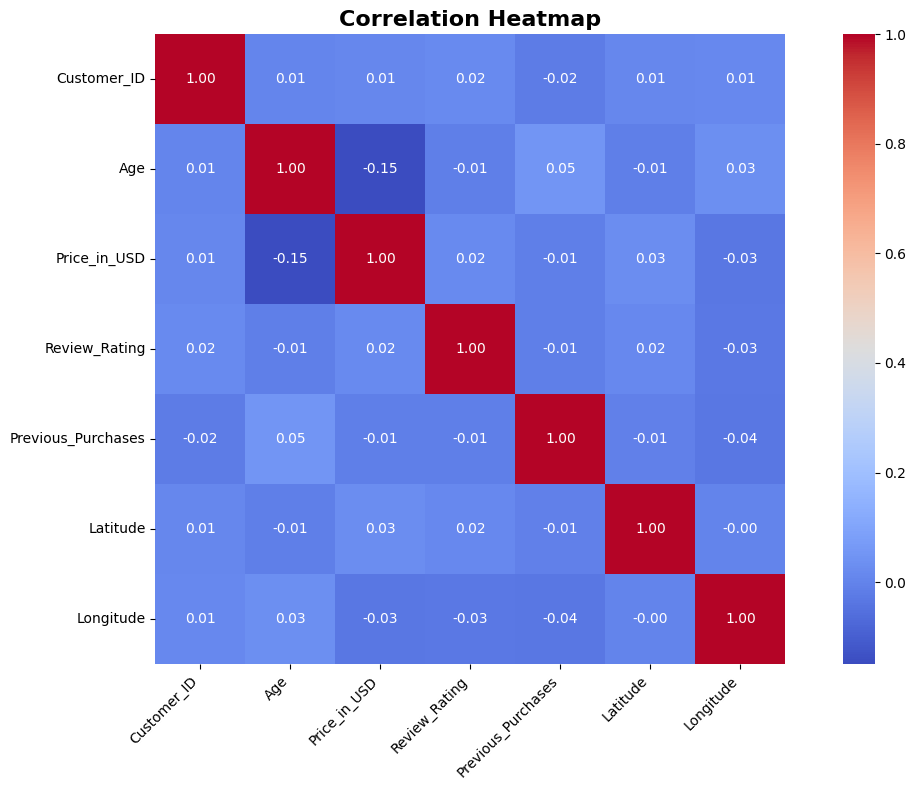

In [68]:
# Select only numerical columns for correlation
numerical_columns = df_processed.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df_processed[numerical_columns].corr()
# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", cbar=True, square=True)
plt.title("Correlation Heatmap", fontsize=16, weight="bold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Sự phân bố độ tuổi

In [14]:
fig = px.histogram(df_processed["Age"], 
                   nbins=25, 
                   color_discrete_sequence=["#7B66FF"],
                   labels = {"value" :"Ages", "count" : "Frequency"},
                   title="The Distribution of Ages",text_auto=True)

fig.update_layout(
    showlegend = False,
     title = {
        "font": {
            "size": 26,
            "family": "tahoma",
        }
    }
)
fig.update_traces(
    textfont= {
        "family": "consolas",
        "size": 16,  
    },
    hovertemplate = "Age Range: %{x}<br>Frequency: %{y}",
    marker = {"line": {"color": "#333", "width":1}} 
)
    
iplot(fig)

Nhận xét :

- Phân bố độ tuổi khách hàng: Biểu đồ cho thấy độ tuổi khách hàng tập trung chủ yếu trong khoảng từ 30 đến 50 tuổi. Đây là nhóm tuổi chiếm phần lớn trong tập dữ liệu, cho thấy họ là đối tượng chính của các hoạt động mua sắm.

- Độ tuổi phổ biến nhất: Nhóm tuổi từ 35 đến 45 có tần suất cao nhất, điều này có thể phản ánh rằng đây là nhóm khách hàng có thu nhập ổn định và sẵn sàng chi tiêu cho các sản phẩm/dịch vụ.

- Nhóm tuổi trẻ và lớn tuổi: Các nhóm tuổi dưới 25 và trên 60 có tần suất thấp hơn đáng kể, cho thấy họ không phải là đối tượng khách hàng chính. Điều này có thể do hạn chế về thu nhập (nhóm trẻ) hoặc nhu cầu mua sắm thấp hơn (nhóm lớn tuổi).

Insight và Đề xuất chiến lược:

1. Tập trung vào nhóm tuổi 30-50:
    - Đây là nhóm khách hàng chính, nên các chiến dịch tiếp thị và sản phẩm cần được thiết kế để phù hợp với nhu cầu và sở thích của họ.
    - Ví dụ: Các sản phẩm/dịch vụ liên quan đến gia đình, công việc, hoặc phong cách sống hiện đại.

2. Thu hút nhóm tuổi trẻ (18-25):
    - Tăng cường quảng cáo trên các nền tảng mạng xã hội như TikTok, Instagram để tiếp cận nhóm khách hàng trẻ.
    - Cung cấp các chương trình khuyến mãi, giảm giá hoặc sản phẩm phù hợp với ngân sách của họ.

3. Chăm sóc nhóm khách hàng lớn tuổi (trên 60):
    - Tạo ra các sản phẩm/dịch vụ phù hợp với nhu cầu của nhóm này, như sản phẩm chăm sóc sức khỏe, tiện ích gia đình.
    - Đơn giản hóa quy trình mua sắm trực tuyến để tăng trải nghiệm người dùng cho nhóm khách hàng này.

Tỷ lệ giới tính

In [15]:
gender = df_processed["Gender"].value_counts()
(gender / sum(gender)) * 100

fig = create_bar_chart(the_data=gender, 
    x_label="Gender", 
    y_label="Frequency (%)", 
    the_title="Percentage of Gender")
fig.update_traces(
textfont= {
"family": "consolas",
"size": 16,  
},
hovertemplate = "Gender: %{x}<br>Frequency (%): %{y}%",
marker = {"line": {"color": "#333", "width":2}} 
)
iplot(fig)

Nhận xét:

Tỷ lệ giới tính: Biểu đồ cho thấy sự chênh lệch rõ rệt giữa tỷ lệ khách hàng nam và nữ. Cụ thể, khách hàng nam chiếm 68%, trong khi khách hàng nữ chỉ chiếm 32%. Điều này cho thấy nam giới là nhóm khách hàng chính chiếm đa số và có sức ảnh hưởng lớn đến doanh thu của doanh nghiệp.

- Insight chiến lược:
    1. Tập trung vào khách hàng nam: Với tỷ lệ áp đảo, các chiến dịch tiếp thị nên ưu tiên nhắm đến nhóm khách hàng nam. Các sản phẩm, dịch vụ và thông điệp quảng cáo cần được thiết kế phù hợp với sở thích và nhu cầu của họ.
    2. Khai thác tiềm năng từ khách hàng nữ: Mặc dù chiếm tỷ lệ thấp hơn, nhóm khách hàng nữ vẫn là một phân khúc tiềm năng. Doanh nghiệp có thể triển khai các chiến dịch cá nhân hóa, tập trung vào các sản phẩm hoặc dịch vụ phù hợp với nữ giới để tăng tỷ lệ chuyển đổi.
    3. Đa dạng hóa sản phẩm: Để thu hút cả hai giới, doanh nghiệp có thể mở rộng danh mục sản phẩm, đảm bảo đáp ứng được nhu cầu của cả nam và nữ.

Hành động đề xuất:

    - Đối với khách hàng nam: Tăng cường quảng cáo trên các nền tảng phổ biến với nam giới, như YouTube, Facebook, hoặc các trang thể thao. Tập trung vào các sản phẩm có tính năng mạnh mẽ, tiện ích hoặc liên quan đến công nghệ.
    - Đối với khách hàng nữ: Sử dụng các nền tảng như Instagram, Pinterest để tiếp cận nhóm khách hàng nữ. Tạo các chiến dịch khuyến mãi hoặc ưu đãi đặc biệt dành riêng cho họ, nhấn mạnh vào yếu tố thẩm mỹ và phong cách.

Phân phối xếp hạng(đánh giá)

In [16]:
fig = px.histogram(df_processed["Review_Rating"], 
    nbins=10,
   title= "The Distribution Of Rating",
   color_discrete_sequence= [ "#7B66FF"], labels= { "value" : "Rating"}, text_auto=True)

fig.update_layout(
showlegend = False,
title = {
"font": {
"size": 26,
"family": "tahoma",
}
}
)
fig.update_traces(
textfont= {
"family": "consolas",
"size": 16,  
},
hovertemplate = "Rating Range: %{x}<br>Frequency: %{y}",
marker = {"line": {"color": "#333", "width":1}} 
)

iplot(fig)

Nhận xét:

- Phân bố xếp hạng đánh giá:
    - Biểu đồ cho thấy phần lớn khách hàng đánh giá sản phẩm ở mức trung bình đến tốt, với các mức đánh giá từ 3 đến 4.5 chiếm tỷ lệ cao nhất.
    - Các mức đánh giá cực đoan như 2.5 (thấp) và 5 (cao) có số lượng ít hơn đáng kể, cho thấy sự phân hóa trong mức độ hài lòng của khách hàng.

- Insight chiến lược:
    1. Cải thiện chất lượng sản phẩm/dịch vụ:
         - Các sản phẩm/dịch vụ có điểm đánh giá thấp cần được xem xét và cải thiện để đáp ứng kỳ vọng của khách hàng.
         - Thu thập phản hồi chi tiết từ khách hàng để xác định nguyên nhân dẫn đến đánh giá thấp.

    2. Khuyến khích đánh giá tích cực:
         - Tạo các chương trình khuyến khích khách hàng để lại đánh giá, đặc biệt là những khách hàng hài lòng, nhằm tăng tỷ lệ đánh giá cao. Ví dụ như cung cấp mã giảm giá hoặc ưu đãi cho lần mua tiếp theo khi khách hàng để lại đánh giá.

    3. Tăng cường dịch vụ hậu mãi:
         - Đối với các sản phẩm có đánh giá trung bình, cần tập trung vào dịch vụ hậu mãi để cải thiện trải nghiệm tổng thể của khách hàng. Điều này có thể giúp chuyển đổi các đánh giá trung lập thành tích cực.

    4. Xây dựng niềm tin với khách hàng mới:
         - Sử dụng các đánh giá tích cực làm công cụ tiếp thị để thu hút khách hàng mới. Đảm bảo rằng các sản phẩm/dịch vụ có đánh giá cao được quảng bá mạnh mẽ hơn.

- Từ góc độ kinh doanh, kết quả này cho thấy doanh nghiệp cần chuyển hóa các phản hồi trung lập thành các ý kiến tích cực thông qua việc cải tiến chất lượng sản phẩm, nâng cao dịch vụ khách hàng và tối ưu trải nghiệm mua sắm. Việc số lượng đánh giá cao (điểm 5) không đạt kỳ vọng cũng cho thấy còn tồn tại tiềm năng cải thiện để củng cố niềm tin từ phía khách hàng. Những thông tin thu thập được cung cấp cơ sở để doanh nghiệp triển khai các chiến lược can thiệp cụ thể, nhằm nâng cao mức độ hài lòng và tăng cường khả năng chuyển đổi doanh số, từ đó củng cố vị thế cạnh tranh trên thị trường thương mại điện tử hiện nay.

In [17]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

discount = df_processed["Discount_Applied"].value_counts()
discount_percentage = discount / sum(discount) * 100  # Tính tỷ lệ %

# Tạo một figure với 2 subplots
fig = make_subplots(rows=1, cols=2, subplot_titles=["Tần Suất Áp Dụng Giảm Giá", "Tỷ Lệ Áp Dụng Giảm Giá"], 
                    specs=[[{"type": "bar"}, {"type": "pie"}]])

# Biểu đồ cột
fig.add_trace(
    go.Bar(
        x=discount.index, 
        y=discount,
        marker=dict(color=["#C0DEFF", "#FF9F9F"], line=dict(color='#111', width=2)),
        text=discount,
        textposition="auto",
        hovertemplate="Loại Giảm Giá: %{x}<br>Số Lần Áp Dụng: %{y}"
    ),
    row=1, col=1
)

# Biểu đồ tròn
fig.add_trace(
    go.Pie(
        labels=discount.index,
        values=discount_percentage,
        marker=dict(colors=["#C0DEFF", "#FF9F9F"], line=dict(color='#111', width=2)),
        textinfo="label+percent",
        hovertemplate="Have Discount: %{label}<br>Frequency (%): %{percent}"
    ),
    row=1, col=2
)

# Cập nhật layout
fig.update_layout(
    template="plotly_white",
    showlegend=True
)

fig.show()


Nhận xét: 

1. **Tần suất áp dụng giảm giá**:
    - Cho thấy số lượng giao dịch có áp dụng giảm giá chiếm tỷ lệ lớn hơn so với giao dịch không áp dụng giảm giá. Điều này cho thấy 
    khách hàng có xu hướng tận dụng các chương trình khuyến mãi, giảm giá khi mua sắm.

2. **Tỷ lệ áp dụng giảm giá**:
    - Có thể rằng phần lớn các giao dịch có áp dụng giảm giá, chiếm tỷ lệ cao hơn đáng kể so với giao dịch không áp dụng giảm giá.Giúp phản ánh
     rằng các chương trình giảm giá đóng vai trò quan trọng trong việc thúc đẩy hành vi mua sắm của khách hàng.

Insight chiến lược:

1. **Tăng cường các chương trình khuyến mãi**:
    - Do khách hàng có xu hướng mua sắm nhiều hơn khi có giảm giá, doanh nghiệp nên tập trung vào các chiến dịch khuyến mãi như flash sale, giảm giá theo mùa, hoặc ưu đãi đặc biệt cho khách hàng thân thiết.

2. **Cá nhân hóa ưu đãi**:
    - Sử dụng dữ liệu lịch sử mua sắm để gửi các ưu đãi phù hợp với từng nhóm khách hàng, giúp tăng tỷ lệ chuyển đổi.

3. **Đánh giá hiệu quả của giảm giá**:
    - Phân tích sâu hơn để xác định mức giảm giá tối ưu, đảm bảo vừa thu hút khách hàng vừa duy trì lợi nhuận.

4. **Tận dụng các dịp đặc biệt**:
    - Tăng cường các chương trình giảm giá vào các dịp lễ, ngày đặc biệt để tối đa hóa doanh số bán hàng.

Hành động đề xuất:
- **Đối với khách hàng thường xuyên mua sắm khi có giảm giá**:
  - Tạo các chương trình khuyến mãi định kỳ, ví dụ: "Mua 3 sản phẩm, giảm 20%".
  - Gửi thông báo qua email hoặc ứng dụng di động để nhắc nhở khách hàng về các chương trình khuyến mãi sắp tới.

- **Đối với khách hàng ít bị ảnh hưởng bởi giảm giá**:
  - Tập trung vào việc nâng cao trải nghiệm mua sắm, chẳng hạn như giao hàng nhanh, dịch vụ khách hàng tốt hơn.
  - Cung cấp các sản phẩm độc quyền hoặc chất lượng cao để thu hút nhóm khách hàng này.

## 1.2.Phân tích hành vi mua sắm

Tần suất mua hàng của khách hàng

In [44]:
freq_purchases = df_processed["Frequency_of_Purchases"].value_counts()
fig = px.bar(freq_purchases,
         x = freq_purchases.index,
         y = (freq_purchases / sum(freq_purchases)) * 100,
         labels = {"y" : "Frequency PCT(%)", "index": "Frequency of Purchases"},
         title = "Frequency of Purchases of Customers",
         color = freq_purchases.index,
         color_discrete_sequence=["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F", "#EDD2F3", "#98EECC", "#FFA1CF"],
         template="plotly_white",
         text = freq_purchases.apply(lambda x : f"{(x / sum(freq_purchases)) * 100:.1f}%")
        )

fig.update_layout(
    showlegend = False,
     title = {
        "font": {
            "size": 26,
            "family": "tahoma",
        }
    }
)
fig.update_traces(
 textfont= {
        "family": "tahoma",
        "size": 14,  
        "color" : "#444"
    },
    hovertemplate = "Category:%{x}<br>Sales USD: %{y}",
)


iplot(fig)


 Tổng quan:
- Biểu đồ hiển thị tần suất mua sắm của khách hàng, được chia thành 5 nhóm: **Monthly (Hàng tháng)**, **Quarterly (Hàng quý)**, **Annually (Hàng năm)**, **Bi-Weekly (Hai tuần một lần)**, và **Weekly (Hàng tuần)**.
- **Monthly** là nhóm có tần suất mua sắm cao nhất, chiếm **27.7%** tổng số giao dịch, tiếp theo là **Quarterly (24.3%)**, **Annually (20.0%)**, **Bi-Weekly (14.0%)**, và **Weekly (13.9%)**.



 Phân tích:
1. **Nhóm khách hàng mua sắm hàng tháng (Monthly):**
    - Đây là nhóm khách hàng có tần suất mua sắm cao nhất, chiếm gần **1/3 tổng số giao dịch**. Điều này cho thấy rằng một lượng lớn khách hàng có thói quen mua sắm định kỳ hàng tháng.
    - Nhóm này có thể bao gồm các khách hàng trung thành, thường xuyên mua sắm các sản phẩm thiết yếu hoặc các mặt hàng thời trang theo xu hướng.

2. **Nhóm khách hàng mua sắm hàng quý (Quarterly):**
    - Với **24.3%**, nhóm này có tần suất mua sắm thấp hơn Monthly nhưng vẫn chiếm tỷ lệ đáng kể. Điều này có thể phản ánh rằng nhóm khách hàng này có xu hướng mua sắm theo mùa hoặc theo các dịp đặc biệt.

3. **Nhóm khách hàng mua sắm hàng năm (Annually):**
    - Chiếm **20.0%**, nhóm này có thể bao gồm các khách hàng mua sắm lớn vào các dịp đặc biệt như lễ hội, ngày kỷ niệm hoặc các sự kiện lớn trong năm.
    - Họ có thể không thường xuyên mua sắm nhưng có xu hướng chi tiêu nhiều hơn trong mỗi lần mua.

4. **Nhóm khách hàng mua sắm hai tuần một lần (Bi-Weekly) và hàng tuần (Weekly):**
    - Hai nhóm này chiếm tỷ lệ thấp hơn, lần lượt là **14.0%** và **13.9%**. Điều này có thể phản ánh rằng chỉ một số ít khách hàng có nhu cầu mua sắm thường xuyên, có thể là các sản phẩm tiêu dùng nhanh hoặc các mặt hàng cần thiết hàng ngày.


 Chiến lược :
1. **Tăng cường chăm sóc nhóm khách hàng Monthly:**
    - Tập trung xây dựng các chương trình khách hàng thân thiết như tích điểm đổi quà, giảm giá cho các lần mua tiếp theo hoặc ưu đãi đặc biệt dành riêng cho nhóm khách hàng mua sắm hàng tháng. Điều này không chỉ giúp tăng tỷ lệ quay lại mua hàng mà còn củng cố lòng trung thành của khách hàng.

2. **Khai thác tiềm năng từ nhóm Quarterly và Annually:**
    - Đẩy mạnh các chiến dịch marketing theo mùa hoặc các dịp lễ lớn để thu hút sự chú ý của nhóm khách hàng này. Các chương trình giảm giá theo mùa, sự kiện mua sắm đặc biệt hoặc các bộ sưu tập giới hạn có thể tạo động lực mua sắm mạnh mẽ, đồng thời tăng doanh số trong các giai đoạn cao điểm.

3. **Thúc đẩy nhóm Weekly và Bi-Weekly:**
    - Tăng cường quảng bá các sản phẩm tiêu dùng nhanh hoặc các mặt hàng thiết yếu thông qua các ưu đãi hấp dẫn. Các chương trình khuyến mãi định kỳ hoặc ưu đãi theo tuần có thể khuyến khích nhóm khách hàng này mua sắm thường xuyên hơn, từ đó tăng doanh thu đều đặn.

4. **Cá nhân hóa trải nghiệm mua sắm:**
    - Sử dụng dữ liệu tần suất mua sắm để cá nhân hóa các ưu đãi và thông điệp tiếp thị. Việc gửi các gợi ý sản phẩm hoặc chương trình khuyến mãi phù hợp với thói quen mua sắm của từng nhóm khách hàng sẽ giúp tăng tỷ lệ chuyển đổi và cải thiện trải nghiệm người dùng.

5. **Tăng cường quảng bá trên các kênh trực tuyến:**
    - Tận dụng các nền tảng mạng xã hội và các kênh trực tuyến để quảng bá sản phẩm và chương trình khuyến mãi. Đặc biệt, các chiến dịch quảng cáo cần được tối ưu hóa để tiếp cận đúng đối tượng khách hàng, từ nhóm mua sắm hàng tháng đến nhóm mua sắm theo mùa.

6. **Đánh giá và tối ưu hóa chiến lược:**
    - Thường xuyên phân tích hành vi mua sắm của từng nhóm khách hàng để điều chỉnh chiến lược marketing và quản lý tồn kho một cách hiệu quả. Việc sử dụng các công cụ phân tích dữ liệu sẽ giúp doanh nghiệp đưa ra quyết định dựa trên dữ liệu thực tế, từ đó tối ưu hóa hiệu quả kinh doanh.


5 mặt hàng được mua nhiều nhất

In [19]:
items = df_processed["Item_Purchased"].value_counts()
(items / sum(items)) * 100
top_5_items = items.nlargest(5)
fig = px.bar(top_5_items, 
             x = top_5_items,
             y = top_5_items.index,
             orientation="h",
            color=top_5_items.index,
            labels={"x" : "Frequency of Sold Items", "y" : "Item"},
            text_auto=True,
            title="Top 5 Purchased Items")

fig.update_layout(
    showlegend = False,
     title = {
        "font": {
            "size": 28,
            "family": "tahoma",
        }
    }
)
fig.update_traces(
    textfont= {
        "family": "consolas",
        "size": 16,  
    },
    hovertemplate = "Item: %{y}<br>Frequency (%): %{x}",
    marker = {"line": {"color": "#444", "width":1}} 
)
iplot(fig)

 Tổng quan:
- Biểu đồ hiển thị **Top 5 sản phẩm được mua nhiều nhất**, bao gồm **Blouse, Sunglasses, Jewelry, Handbag, và Scarf**.
- **Blouse** dẫn đầu danh sách với **177 lượt mua**, tiếp theo là **Sunglasses (174)**, **Jewelry (172)**, **Handbag (171)**, và **Scarf (167)**.
- Các sản phẩm trong Top 5 đều thuộc danh mục **thời trang và phụ kiện**, phản ánh xu hướng mua sắm của khách hàng tập trung vào các sản phẩm liên quan đến phong cách cá nhân.

 Phân tích:
1. **Blouse (Áo kiểu):**
    - Là sản phẩm được mua nhiều nhất, cho thấy đây là một mặt hàng thời trang phổ biến, phù hợp với nhiều đối tượng khách hàng.
    - Blouse thường có tính đa dụng, có thể mặc trong nhiều dịp khác nhau, khiến nó trở thành một lựa chọn phổ biến.
    - Có thể khách hàng mua Blouse nhiều do các chương trình ưu đãi hoặc sự hấp dẫn của thiết kế và chất liệu sản phẩm.

2. **Sunglasses (Kính mát):**
    - Kính mát không chỉ là một phụ kiện thời trang mà còn có công dụng bảo vệ mắt, điều này có thể khiến chúng trở thành một sản phẩm có nhu cầu cao.
    - Việc xuất hiện trong danh sách Top 5 có thể cho thấy rằng khách hàng mua kính không theo mùa mà là một sản phẩm được ưa chuộng quanh năm.

3. **Jewelry (Trang sức):**
    - Trang sức là một sản phẩm thể hiện phong cách cá nhân, được mua nhiều có thể do xu hướng thời trang hoặc là quà tặng.
    - Những sản phẩm như vòng cổ, nhẫn, hoặc bông tai có thể được mua trong các dịp đặc biệt như lễ kỷ niệm hoặc quà tặng.

4. **Handbag (Túi xách):**
    - Túi xách là một sản phẩm không thể thiếu trong tủ đồ của nhiều khách hàng, đặc biệt là phụ nữ.
    - Việc có số lượng mua gần bằng với Jewelry và Sunglasses cho thấy đây là một mặt hàng có mức độ phổ biến tương đương với các phụ kiện khác.

5. **Scarf (Khăn quàng cổ):**
    - Khăn quàng cổ thường được mua theo mùa hoặc làm phụ kiện cho trang phục.
    - Dù có số lượng thấp hơn Blouse nhưng vẫn đủ để lọt vào danh sách sản phẩm phổ biến.

 Chiến lược :
1. **Tập trung vào danh mục thời trang và phụ kiện:**
    - Do các mặt hàng thời trang và phụ kiện chiếm ưu thế trong Top 5, doanh nghiệp nên tập trung vào việc mở rộng danh mục sản phẩm trong các nhóm này.
    - Ví dụ: Cung cấp thêm các mẫu mã mới, đa dạng về màu sắc, kích thước, và phong cách để đáp ứng nhu cầu của khách hàng.

2. **Tăng cường chiến dịch tiếp thị cho các mặt hàng phổ biến:**
    - Các mặt hàng như Blouse, Sunglasses, Jewelry, Handbag, và Scarf nên được ưu tiên trong các chiến dịch quảng cáo và khuyến mãi.
    - Sử dụng các kênh tiếp thị như mạng xã hội, email marketing để giới thiệu các sản phẩm này đến khách hàng.

3. **Phân tích sâu hơn về hành vi mua sắm:**
    - Nghiên cứu thêm về đặc điểm của khách hàng mua các mặt hàng này (độ tuổi, giới tính, mùa mua sắm,...) để cá nhân hóa chiến lược tiếp thị.
    - Ví dụ: Nếu Blouse được mua nhiều hơn vào mùa xuân, doanh nghiệp có thể tập trung quảng bá sản phẩm này trong giai đoạn đó.

4. **Tận dụng các chương trình khuyến mãi và ưu đãi:**
    - Tạo các chương trình giảm giá hoặc ưu đãi đặc biệt cho các mặt hàng trong Top 5 để thúc đẩy doanh số.
    - Ví dụ: "Mua 2 Blouse, giảm 20%" hoặc "Giảm giá 15% cho tất cả các sản phẩm Sunglasses trong tuần này".

5. **Đánh giá và cải thiện các mặt hàng khác:**
    - Các mặt hàng không nằm trong Top 5 có thể cần được đánh giá lại về chất lượng, giá cả, hoặc chiến lược tiếp thị.
    - Tìm hiểu lý do tại sao các mặt hàng này không phổ biến và thực hiện các cải tiến cần thiết.

 Hành động đề xuất:
- **Đối với khách hàng hiện tại:** Gửi email hoặc thông báo cá nhân hóa, giới thiệu các sản phẩm trong Top 5 mà họ có thể quan tâm.
- **Đối với khách hàng mới:** Sử dụng các sản phẩm trong Top 5 làm điểm nhấn trong các chiến dịch quảng cáo để thu hút sự chú ý.
- **Đối với chiến lược dài hạn:** Đầu tư vào nghiên cứu và phát triển các sản phẩm thời trang và phụ kiện mới, dựa trên xu hướng thị trường và sở thích của khách hàng.

Mức độ phổ biến của từng danh mục mặt hàng

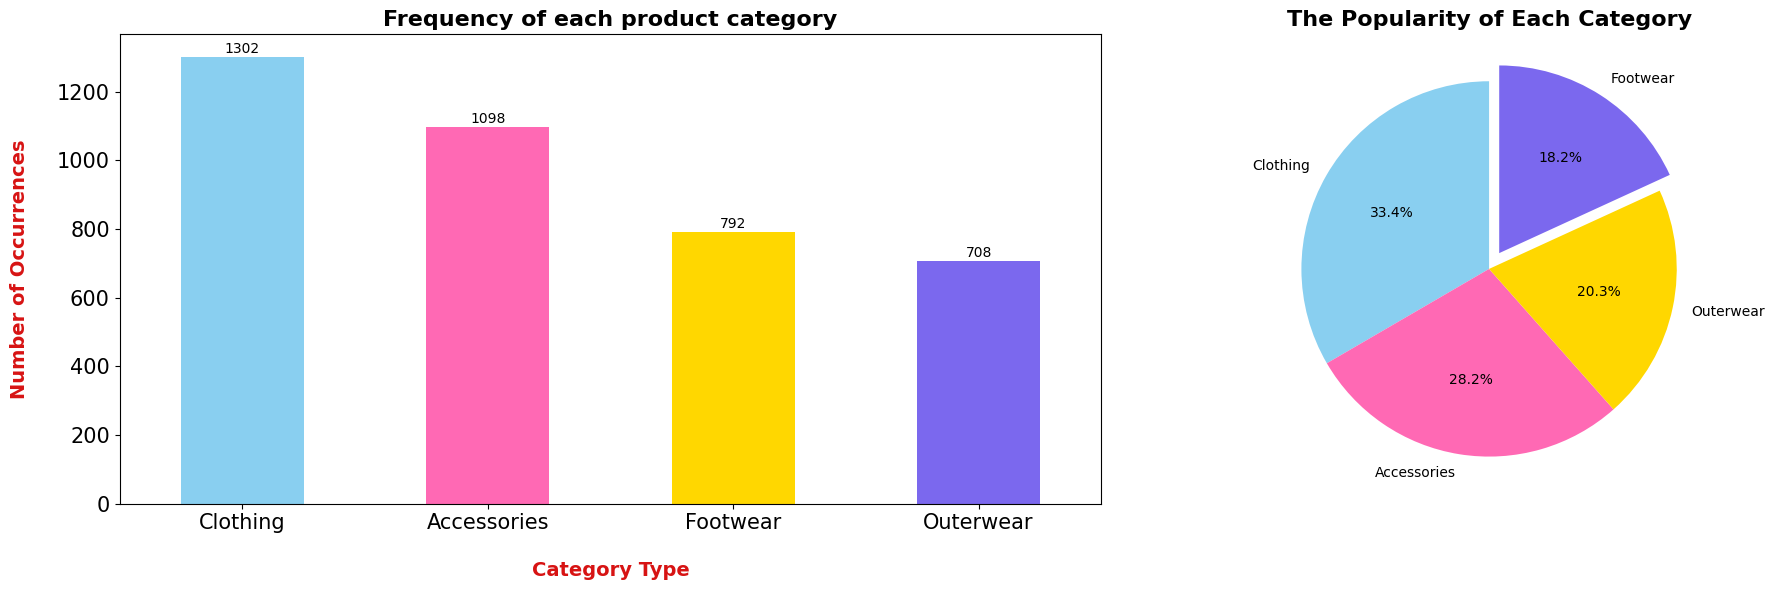

In [45]:
import matplotlib.pyplot as plt

# Tạo figure với 2 subplot (1 hàng, 2 cột)
fig, axes = plt.subplots(1, 2, figsize=(20, 6))

# Biểu đồ cột
ax = df_processed["Category"].value_counts().plot(kind='bar', color=colors, rot=0, ax=axes[0])
ax.set_xticklabels(('Clothing', 'Accessories', 'Footwear', 'Outerwear'))

# Thêm số liệu trên các cột
for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha='center', va='bottom', color='black')
    ax.tick_params(axis='both', labelsize=15)

# Định dạng trục
ax.set_xlabel('Category Type', weight="bold", color="#D71313", fontsize=14, labelpad=20)
ax.set_ylabel('Number of Occurrences', weight="bold", color="#D71313", fontsize=14, labelpad=20)
ax.set_title("Frequency of each product category", fontsize=16, weight="bold")

# Biểu đồ tròn
counts = df_processed["Category"].value_counts()
explode = (0, 0.0, 0.0, 0.1)

axes[1].pie(counts, labels=counts.index, colors=colors, explode=explode, autopct='%1.1f%%', startangle=90)
axes[1].set_title("The Popularity of Each Category", fontsize=16, weight="bold")

# Hiển thị figure với 2 biểu đồ
plt.tight_layout()
plt.show()


 Tổng quan:
- Biểu đồ hiển thị mức độ phổ biến của từng danh mục mặt hàng, bao gồm **Clothing (Quần áo)**, **Accessories (Phụ kiện)**, **Footwear (Giày dép)**, và **Outerwear (Áo khoác)**.
- **Clothing** là danh mục phổ biến nhất với **1,302 lượt mua**, chiếm hơn 1/3 tổng số sản phẩm được mua.
- **Accessories** đứng thứ hai với **1,098 lượt mua**, tiếp theo là **Footwear (792 lượt mua)** và **Outerwear (708 lượt mua)**.

 Phân tích:
1. **Clothing (Quần áo):**
    - Là danh mục được mua nhiều nhất, phản ánh rằng quần áo là mặt hàng thiết yếu và có nhu cầu cao quanh năm.
    - Sự phổ biến của Clothing có thể liên quan đến xu hướng thời trang thay đổi thường xuyên, khiến khách hàng mua sắm liên tục để cập nhật phong cách.
    - Các sản phẩm như áo phông, quần jeans, váy, và áo khoác nhẹ có thể là những mặt hàng chủ lực trong danh mục này.

2. **Accessories (Phụ kiện):**
    - Phụ kiện đứng thứ hai về mức độ phổ biến, cho thấy vai trò quan trọng của các sản phẩm như túi xách, kính râm, trang sức trong hành vi mua sắm của khách hàng.
    - Phụ kiện thường được mua kèm với quần áo, góp phần tăng giá trị đơn hàng và doanh thu tổng thể.
    - Các sản phẩm phụ kiện có thể mang tính thời trang cao, dễ dàng kết hợp với nhiều loại trang phục.

3. **Footwear (Giày dép):**
    - Footwear có mức độ phổ biến thấp hơn so với Clothing và Accessories, có thể do chu kỳ mua sắm dài hơn (khách hàng thường sử dụng giày dép lâu hơn trước khi thay mới).
    - Tuy nhiên, giày dép vẫn là một danh mục quan trọng, đặc biệt trong các mùa cao điểm như mùa đông (giày boots) hoặc mùa hè (giày sandals).

4. **Outerwear (Áo khoác):**
    - Outerwear có mức độ phổ biến thấp nhất, có thể do nhu cầu về áo khoác phụ thuộc vào mùa và thời tiết.
    - Các sản phẩm như áo khoác dày, áo len thường được mua nhiều hơn vào mùa đông, trong khi áo khoác nhẹ có thể phổ biến vào mùa thu và xuân.


 Chiến lược áp dụng thực tế:
1. **Tăng cường đầu tư vào Clothing và Accessories:**
    - **Clothing:** 
      - Tập trung vào việc mở rộng dòng sản phẩm quần áo, đặc biệt là các sản phẩm theo xu hướng thời trang mới.
      - Đẩy mạnh các chiến dịch quảng bá trên mạng xã hội, nhấn mạnh vào tính thời trang, chất lượng và sự tiện ích của sản phẩm.
    - **Accessories:** 
      - Kết hợp các chương trình khuyến mãi "mua kèm" (bundle deals), ví dụ: "Mua áo phông, giảm 20% cho túi xách."
      - Đa dạng hóa mẫu mã phụ kiện để đáp ứng nhu cầu của nhiều nhóm khách hàng khác nhau.

2. **Thúc đẩy doanh số từ Footwear:**
    - Tăng cường quảng bá các sản phẩm giày dép bằng cách nhấn mạnh vào tính năng như độ bền, sự thoải mái và phong cách.
    - Tổ chức các chương trình giảm giá theo mùa, ví dụ: "Giảm giá 30% cho giày boots vào mùa đông" hoặc "Ưu đãi đặc biệt cho sandals mùa hè."
    - Phân tích thêm về sở thích của khách hàng để phát triển các dòng sản phẩm phù hợp hơn.

3. **Tối ưu hóa chiến lược bán hàng theo mùa cho Outerwear:**  
    - Đẩy mạnh quảng bá các sản phẩm áo khoác dày, áo len vào mùa đông, khi nhu cầu tăng cao.  
    - Tăng cường các chương trình khuyến mãi theo mùa, ví dụ: "Winter Sale" hoặc "Mua 1 tặng 1 cho áo khoác mùa đông."  
    - Phân tích thêm dữ liệu để xác định các khu vực có nhu cầu cao về Outerwear, từ đó tối ưu hóa phân phối và tồn kho.  

4. **Đẩy mạnh chiến lược upselling và cross-selling:**  
    - Kết hợp các sản phẩm trong các danh mục khác nhau để tăng giá trị đơn hàng, ví dụ: "Mua áo khoác, giảm 20% cho giày boots."  
    - Sử dụng các gợi ý sản phẩm liên quan trên website hoặc ứng dụng để khuyến khích khách hàng mua thêm.  

5. **Cá nhân hóa trải nghiệm mua sắm:**  
    - Sử dụng dữ liệu khách hàng để cá nhân hóa các chiến dịch tiếp thị, ví dụ: gửi email giới thiệu các sản phẩm phù hợp với lịch sử mua sắm của từng khách hàng.  
    - Tăng cường trải nghiệm mua sắm trực tuyến bằng cách cung cấp các bộ lọc tìm kiếm theo danh mục, kích thước, màu sắc và mùa.  


Mức độ phổ biến của từng kích thước

In [20]:
size = df_processed["Size"].value_counts()
size
fig = create_bar_chart(the_data=size, 
    x_label="Size", 
    y_label="Frequency (%)", 
    the_title="The Popularity of Each Size")

fig.update_traces(
textfont= {
"family": "consolas",
"size": 16,  
},
hovertemplate = "Size: %{x}<br>Popularity (%): %{y}%",
marker = {"line": {"color": "#333", "width":2}} 
)
iplot(fig)

**Tổng quan**: 
- Kích thước M chiếm tỷ lệ cao nhất với 45.1% (1,759 lượt mua), tiếp theo là L với 26.6% (1,036 lượt mua), S chiếm 17.3% (676 lượt mua), và XL chiếm 11.0% (429 lượt mua). 
- Tổng cộng, kích thước M và L chiếm đến 71.7% tổng số sản phẩm được mua, cho thấy sự ưa chuộng rõ rệt đối với các kích thước trung bình.

**Phân tích**: 
- Kích thước M và L phổ biến có thể phản ánh rằng phần lớn khách hàng thuộc nhóm có vóc dáng trung bình, phù hợp với các sản phẩm được thiết kế cho số đông. 
- Kích thước S và XL ít phổ biến hơn, có thể do nhóm khách hàng có vóc dáng nhỏ hoặc lớn chiếm tỷ lệ thấp hơn trong tập dữ liệu. Ngoài ra, điều này cũng có thể liên quan đến việc các sản phẩm kích thước M và L được sản xuất và quảng bá nhiều hơn, dẫn đến sự chênh lệch trong nhu cầu.
- Việc kích thước XL có tỷ lệ thấp nhất có thể phản ánh rằng các sản phẩm dành cho nhóm khách hàng có vóc dáng lớn chưa được đầu tư đúng mức hoặc chưa đáp ứng đủ nhu cầu.

**Đề xuất**:
1. **Tập trung vào kích thước phổ biến**:
    - Kích thước M và L là hai kích thước chủ đạo, chiếm phần lớn nhu cầu. Điều này cho thấy doanh nghiệp cần đảm bảo tồn kho đầy đủ cho hai kích thước này để tránh tình trạng hết hàng, đặc biệt trong các mùa cao điểm.
    - Các chiến dịch quảng bá sản phẩm nên tập trung vào kích thước M và L để tối ưu hóa doanh số.

2. **Khai thác tiềm năng từ kích thước S và XL**:
    - Mặc dù chiếm tỷ lệ thấp hơn, kích thước S và XL vẫn có một lượng khách hàng nhất định. Doanh nghiệp có thể tăng cường quảng bá và sản xuất các sản phẩm kích thước này để phục vụ nhóm khách hàng có vóc dáng đặc biệt, đồng thời mở rộng thị trường tiềm năng.
    - Phân tích thêm về đặc điểm nhân khẩu học của khách hàng mua kích thước S và XL (ví dụ: độ tuổi, giới tính, khu vực) để cá nhân hóa chiến lược tiếp thị.

3. **Đánh giá chiến lược sản xuất và phân phối**:
    - Nếu kích thước S và XL có tỷ lệ thấp do hạn chế trong sản xuất hoặc phân phối, doanh nghiệp cần xem xét lại chiến lược để đảm bảo đáp ứng nhu cầu của tất cả nhóm khách hàng.
    - Đánh giá phản hồi từ khách hàng về các sản phẩm kích thước S và XL để cải thiện chất lượng và thiết kế, từ đó tăng sức hấp dẫn.

**Kế hoạch hành động**:
- **Đảm bảo tồn kho**: Tăng cường dự trữ và sản xuất các sản phẩm kích thước M và L để đáp ứng nhu cầu cao.
- **Mở rộng danh mục sản phẩm**: Tăng cường sản xuất và quảng bá các sản phẩm kích thước S và XL, đặc biệt trong các chiến dịch nhắm đến nhóm khách hàng có vóc dáng đặc biệt.
- **Phân tích nhân khẩu học**: Thu thập thêm dữ liệu về khách hàng mua kích thước S và XL để hiểu rõ hơn về nhu cầu và sở thích của họ, từ đó cá nhân hóa chiến lược tiếp thị.
- **Tối ưu hóa chiến lược tiếp thị**: Sử dụng các kênh truyền thông xã hội và email marketing để quảng bá các sản phẩm kích thước S và XL, đồng thời nhấn mạnh vào sự đa dạng và tính cá nhân hóa của sản phẩm.


Xu hướng màu sắc: Những gam màu được yêu thích nhất

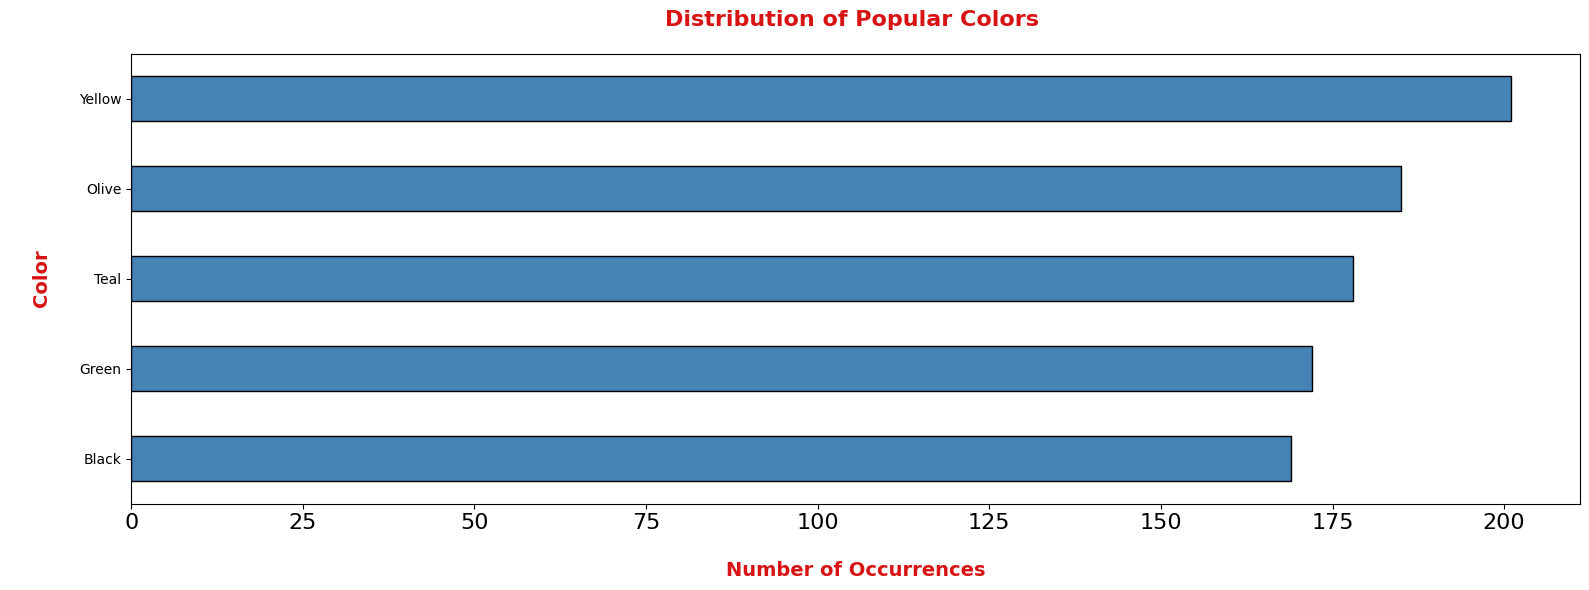

In [47]:
plt.figure(figsize = (16, 6))
df_processed["Color"].value_counts()[:5].sort_values(ascending = True).plot(kind = 'barh',color='steelblue', edgecolor = 'black')
plt.title("Distribution of Popular Colors ", fontsize=16, weight="bold", color="#D71313", pad=20)
plt.xlabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('\nColor', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20);
plt.xticks(rotation = 0, ha = 'center', fontsize = 16)
plt.tight_layout()
plt.show()

 Tổng quan:
- Biểu đồ hiển thị sự phân bố của các màu sắc phổ biến nhất trong các sản phẩm được mua, với **Yellow** dẫn đầu (201 lượt mua), tiếp theo là **Olive** (185), **Teal** (178), **Green** (172), và **Black** (169).
- Các màu sắc này đều thuộc nhóm màu trung tính hoặc nổi bật, phản ánh sở thích của khách hàng đối với các sản phẩm có tính thẩm mỹ cao và dễ phối hợp.

 Phân tích:
1. **Yellow (Màu vàng):**
    - Là màu sắc được ưa chuộng nhất, chiếm tỷ lệ cao nhất trong số các sản phẩm được mua. Điều này có thể do màu vàng thường được liên kết với sự tươi sáng, năng động và nổi bật, phù hợp với các sản phẩm thời trang hoặc phụ kiện.
    - Màu vàng có thể phổ biến hơn trong các mùa như mùa hè hoặc mùa xuân, khi khách hàng có xu hướng chọn các màu sắc rực rỡ và tươi sáng.

2. **Olive (Màu ô liu):**
    - Đứng thứ hai về mức độ phổ biến, màu ô liu là một màu trung tính, dễ phối hợp với nhiều phong cách thời trang khác nhau. Điều này cho thấy khách hàng có xu hướng chọn các sản phẩm có tính ứng dụng cao, phù hợp với nhiều dịp.
    - Màu ô liu có thể phổ biến hơn trong các mùa thu hoặc đông, khi các tông màu trầm và trung tính thường được ưa chuộng.

3. **Teal (Màu xanh ngọc lam):**
    - Là màu sắc phổ biến thứ ba, màu teal mang lại cảm giác tươi mới và hiện đại, phù hợp với các sản phẩm thời trang hoặc phụ kiện dành cho khách hàng trẻ tuổi.
    - Màu teal có thể được ưa chuộng quanh năm, đặc biệt trong các sản phẩm như áo phông, váy hoặc túi xách.

4. **Green (Màu xanh lá):**
    - Đứng thứ tư, màu xanh lá thường được liên kết với sự tự nhiên và thanh lịch. Điều này cho thấy khách hàng có xu hướng chọn các sản phẩm mang lại cảm giác gần gũi với thiên nhiên.
    - Màu xanh lá có thể phổ biến trong các sản phẩm như áo khoác, váy hoặc phụ kiện.

5. **Black (Màu đen):**
    - Mặc dù đứng cuối trong danh sách, màu đen vẫn là một màu sắc phổ biến, được yêu thích vì tính cổ điển, sang trọng và dễ phối hợp.
    - Màu đen có thể phổ biến trong các sản phẩm như giày dép, túi xách hoặc áo khoác, phù hợp với nhiều dịp và phong cách.

 Chiến lược áp dụng :
1. **Tăng cường sản xuất và quảng bá các sản phẩm màu sắc phổ biến:**
    - Tập trung vào các sản phẩm màu **Yellow**, **Olive**, và **Teal**, vì đây là những màu sắc được ưa chuộng nhất. Đảm bảo tồn kho đầy đủ và đa dạng mẫu mã để đáp ứng nhu cầu của khách hàng.
    - Sử dụng các chiến dịch quảng cáo nhấn mạnh vào tính thời trang và sự nổi bật của các màu sắc này, đặc biệt trong các mùa cao điểm như mùa hè hoặc mùa xuân.

2. **Phát triển các bộ sưu tập theo mùa:**
    - Tạo các bộ sưu tập thời trang theo mùa, sử dụng các màu sắc phổ biến như **Yellow** và **Teal** cho mùa hè, **Olive** và **Green** cho mùa thu, và **Black** cho mùa đông.
    - Kết hợp các chương trình khuyến mãi theo mùa, ví dụ: "Summer Brights" với các sản phẩm màu vàng và xanh ngọc lam, hoặc "Autumn Neutrals" với các sản phẩm màu ô liu và xanh lá.

3. **Cá nhân hóa chiến lược tiếp thị:**
    - Sử dụng dữ liệu mua sắm để cá nhân hóa các đề xuất sản phẩm dựa trên sở thích màu sắc của từng khách hàng. Ví dụ, nếu khách hàng thường mua các sản phẩm màu **Yellow**, có thể gửi email giới thiệu các sản phẩm mới cùng màu.
    - Tích hợp các bộ lọc tìm kiếm theo màu sắc trên nền tảng mua sắm trực tuyến, giúp khách hàng dễ dàng tìm thấy các sản phẩm phù hợp với sở thích của họ.

4. **Đẩy mạnh chiến lược phối hợp màu sắc:**
    - Kết hợp các sản phẩm có màu sắc phổ biến trong các gợi ý mua sắm, ví dụ: "Phối đồ hoàn hảo với áo màu Yellow và túi xách màu Teal."
    - Tạo nội dung trên mạng xã hội hướng dẫn cách phối hợp các màu sắc phổ biến, từ đó tăng cường nhận diện thương hiệu và thúc đẩy doanh số.
    -Tổ chức các cuộc thi hoặc sự kiện** trên mạng xã hội, khuyến khích khách hàng chia sẻ cách họ phối hợp các sản phẩm màu sắc phổ biến, từ đó tạo ra sự tương tác và tăng cường lòng trung thành của khách hàng.

## 1.3.Phân tích theo mùa và địa lý

Phân tích xu hướng mua sắm theo mùa

In [25]:
category_per_season = df_processed.pivot_table(index = "Season", columns = df_processed["Category"], values ="Category", aggfunc="count")
category_per_season

Category  Accessories  Clothing  Footwear  Outerwear
Season                                              
Fall              244       275       234        227
Spring            385       373       111        130
Summer            300       409       158         75
Winter            169       245       205        360

In [26]:
total = category_per_season[category_per_season.columns].sum(1)

category_per_season.loc["Fall"]  = round(category_per_season.loc["Fall"] / total.values[0] * 100)
category_per_season.loc["Spring"] = round(category_per_season.loc["Spring"] / total.values[1] * 100)
category_per_season.loc["Summer"] = round(category_per_season.loc["Summer"] / total.values[2] * 100)
category_per_season.loc["Winter"] = round(category_per_season.loc["Winter"] / total.values[3] * 100)
fig = px.bar(category_per_season, 
            barmode="group",
            x = category_per_season.index,
            y = category_per_season.columns,
            color_discrete_sequence=["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F", "#EDD2F3"],
            template="plotly_white",
            text_auto="%0.0f",
             title="The Popularity in PCT(%) of Category per Season",
             labels={"value" : "Popularity (%)"}
            )


fig.update_layout(
    title = {
        "font" : {
            "size" : 24,
            "family" : "tahoma"
        }
    }
)
fig.update_traces(
    textfont= {
        "family": "tahoma",
        "size": 16,  
        "color" : "#444"
    },
    hovertemplate = "%{label}<br>Popularity (%): %{y}%",
    marker = {"line": {"color": "#333", "width":2}} 
)

iplot(fig)


 Tổng quan:
- Biểu đồ hiển thị mức độ phổ biến của từng danh mục sản phẩm theo mùa, bao gồm **Clothing (Quần áo)**, **Accessories (Phụ kiện)**, **Footwear (Giày dép)**, và **Outerwear (Áo khoác)**.
- **Clothing** và **Accessories** là hai danh mục sản phẩm phổ biến nhất trong cả bốn mùa, trong khi **Outerwear** chỉ thực sự nổi bật vào mùa đông, và **Footwear** có mức độ phổ biến ổn định nhưng không vượt trội.


 Phân tích:
1. **Mùa Xuân (Spring):**
    - **Accessories (39%)** và **Clothing (37%)** chiếm tỷ lệ cao nhất, cho thấy khách hàng có xu hướng mua sắm các sản phẩm thời trang và phụ kiện để làm mới phong cách trong mùa này.
    - **Footwear (11%)** và **Outerwear (13%)** có mức độ phổ biến thấp hơn, phản ánh rằng thời tiết mùa xuân không yêu cầu giày dép đặc biệt hoặc áo khoác dày.

2. **Mùa Hè (Summer):**
    - **Clothing (43%)** dẫn đầu, phản ánh nhu cầu cao về các sản phẩm quần áo mùa hè như áo phông, quần short.
    - **Accessories (32%)** cũng được ưa chuộng, đặc biệt là các sản phẩm như kính râm, mũ, hoặc túi xách.
    - **Footwear (17%)** có mức độ phổ biến cao hơn so với mùa xuân, trong khi **Outerwear (8%)** có mức độ phổ biến thấp nhất, phù hợp với thời tiết nóng.

3. **Mùa Thu (Fall):**
    - **Clothing (28%)** và **Accessories (25%)** tiếp tục dẫn đầu, nhưng tỷ lệ thấp hơn so với mùa xuân và mùa hè.
    - **Footwear (24%)** và **Outerwear (23%)** có mức độ phổ biến tương đối đồng đều, phản ánh nhu cầu tăng lên đối với giày dép và áo khoác nhẹ khi thời tiết chuyển lạnh.

4. **Mùa Đông (Winter):**
    - **Outerwear (37%)** chiếm tỷ lệ cao nhất, điều này dễ hiểu vì mùa đông cần các sản phẩm giữ ấm như áo khoác, áo len.
    - **Clothing (25%)** và **Footwear (21%)** cũng có mức độ phổ biến đáng kể, trong khi **Accessories (17%)** ít được mua hơn, có thể do khách hàng ưu tiên các sản phẩm thiết yếu hơn.



 Chiến lược:
1. **Tối ưu hóa danh mục sản phẩm theo mùa:**
    - **Mùa Xuân và Mùa Hè:**
      - Tăng cường quảng bá các sản phẩm thời trang như quần áo nhẹ, phụ kiện mùa hè (kính râm, mũ).
      - Tạo các bộ sưu tập thời trang theo xu hướng mùa xuân và mùa hè, kết hợp với các chương trình khuyến mãi như "Spring Refresh" hoặc "Summer Essentials."
    - **Mùa Thu:**
      - Tập trung vào các sản phẩm áo khoác nhẹ, giày dép và phụ kiện như khăn quàng cổ, túi xách.
      - Đẩy mạnh các chiến dịch quảng cáo nhấn mạnh vào sự tiện ích và phong cách của các sản phẩm mùa thu.
    - **Mùa Đông:**
      - Tăng cường sản xuất và quảng bá các sản phẩm giữ ấm như áo khoác dày, áo len, giày boots.
      - Kết hợp các chương trình khuyến mãi theo mùa như "Winter Sale" để thúc đẩy doanh số.

2. **Cá nhân hóa chiến lược tiếp thị:**
    - Sử dụng dữ liệu mua sắm để gửi các gợi ý sản phẩm phù hợp theo mùa cho từng khách hàng. Ví dụ: gửi email giới thiệu áo khoác và giày boots vào mùa đông, hoặc kính râm và áo phông vào mùa hè.
    - Tích hợp các bộ lọc tìm kiếm theo mùa trên nền tảng mua sắm trực tuyến, giúp khách hàng dễ dàng tìm thấy các sản phẩm phù hợp.

3. **Tăng cường chiến lược tồn kho:**
    - Dựa trên xu hướng theo mùa, doanh nghiệp có thể tối ưu hóa lượng hàng tồn kho để tránh dư thừa hoặc thiếu hụt. Ví dụ: tăng cường dự trữ áo khoác vào mùa đông và giảm sản xuất Outerwear vào mùa hè.
    - Đảm bảo nguồn cung ổn định cho các sản phẩm phổ biến như Clothing và Accessories, bất kể mùa nào.

4. **Đẩy mạnh chiến dịch quảng cáo theo mùa:**
    - Tạo các chiến dịch quảng cáo sáng tạo, nhấn mạnh vào tính thời trang và sự tiện ích của các sản phẩm theo mùa. Ví dụ: "Stay Warm in Style" cho mùa đông hoặc "Beat the Heat" cho mùa hè.
    - Hợp tác với các influencer hoặc KOLs để quảng bá các sản phẩm theo mùa trên mạng xã hội, từ đó tăng cường nhận diện thương hiệu và thúc đẩy doanh số.


Top 10 tiểu bang có số lượng mua hàng nhiều nhất : Hiển thị các khu vực có lượng mua sắm cao.

In [27]:
purchases_by_loc = df_processed.groupby("Location")["Previous_Purchases"].sum().nlargest(10)
purchases_by_loc

fig = px.bar(purchases_by_loc,
             orientation="h",
         x = purchases_by_loc,
         y = purchases_by_loc.index,
         labels = {"x" : "Total Purchases"},
         text_auto="0.4s",  
         title = "Number of Purchases Per Top 10 State",
         color = purchases_by_loc.index,
         color_discrete_sequence=["#00509E"],
             template="plotly_white"
        )

fig.update_layout(
    showlegend = False,
     title = {
        "font": {
            "size": 24,
            "family": "tahoma",
        }
    }
)
fig.update_traces(
 textfont= {
        "family": "tahoma",
        "size": 14,  
        "color" : "#111"
    },
    hovertemplate = "State:%{y}<br>Total Purchases: %{x:0.4s}",
)
iplot(fig)

 Tổng quan:
- Mississippi dẫn đầu về số lượng mua hàng với 2,463 giao dịch, tiếp theo là California (2,455) và Louisiana (2,441).
- Các bang như Missouri, Minnesota, Alabama, Maryland, Arkansas, Nevada, và Delaware có số lượng giao dịch dao động từ 2,217 đến 2,396, cho thấy sự phân bố tương đối đồng đều trong Top 10.

 Phân tích:
1. **Mississippi là thị trường tiềm năng nhất**:
    - Với số lượng giao dịch cao nhất, Mississippi có thể là khu vực có nhu cầu mua sắm lớn hoặc có chiến lược tiếp thị hiệu quả.
2. **California và Louisiana là các khu vực trọng điểm**:
    - Hai bang này có lượng giao dịch lớn, có thể do dân số đông hoặc mức độ tiêu dùng cao.
3. **Sự phân bố đồng đều trong Top 10**:
    - Các bang còn lại trong Top 10 đều có số lượng giao dịch tương đối gần nhau, cho thấy khách hàng không chỉ tập trung ở một vài khu vực mà trải rộng trên nhiều bang.

 Chiến lược:
1. **Tăng cường đầu tư vào Mississippi, California, và Louisiana**:
    - Tập trung vào các chiến dịch tiếp thị, khuyến mãi và mở rộng dịch vụ tại ba bang này để tối ưu hóa doanh thu.
2. **Đẩy mạnh sự hiện diện tại các bang khác trong Top 10**:
    - Tăng cường các chương trình khuyến mãi hoặc sự kiện đặc biệt tại các bang như Missouri, Minnesota, và Alabama để khai thác tiềm năng.
3. **Cải thiện hệ thống phân phối và vận chuyển**:
    - Đảm bảo hệ thống vận chuyển hoạt động hiệu quả để đáp ứng nhu cầu lớn tại các bang này.
4. **Mở rộng thị trường tại các bang chưa nằm trong Top 10**:
    - Sử dụng dữ liệu từ các bang dẫn đầu để xây dựng chiến lược mở rộng thị trường tại các bang khác, từ đó tăng cường độ phủ sóng và doanh thu tổng thể.


Trực quan hóa vị trí địa lý của khách hàng.

In [56]:
location_mapping = {
    'Nebraska': (41.4925, -99.9018),
    'Maryland': (39.0458, -76.6413),
    'Wisconsin': (43.7844, -88.7879),
    'Illinois': (40.6331, -89.3985),
    'Colorado': (39.7392, -104.9903),
    'Missouri': (38.5739, -92.6032),
    'Texas': (31.9686, -99.9018),
    'Tennessee': (35.5175, -86.5804),
    'Arkansas': (34.7465, -92.2896),
    'North Carolina': (35.7822, -78.6382),
    'Oklahoma': (35.0078, -97.0929),
    'Iowa': (41.8780, -93.0977),
    'Kansas': (39.0119, -93.2105),
    'New Hampshire': (43.1939, -71.5724),
    'Georgia': (32.1656, -82.6693),
    'West Virginia': (38.4192, -86.5804),
    'Louisiana': (30.9843, -91.0512),
    'Nevada': (36.1699, -115.1398),
    'Kentucky': (37.7749, -84.6784),
    'Virginia': (37.4316, -78.6569),
    'Michigan': (44.3148, -85.6024),
    'South Dakota': (43.9695, -99.9018),
    'Utah': (39.4192, -111.0937),
    'Vermont': (44.5588, -72.5778),
    'Minnesota': (46.7296, -94.6859),
    'Pennsylvania': (41.2033, -77.2698),
    'New York': (43.2994, -74.2179),
    'Maine': (45.2538, -69.4455),
    'Alaska': (58.3019, -134.4197),
    'New Jersey': (40.0583, -74.4057),
    'Alabama': (32.8067, -86.7911),
    'North Dakota': (47.5515, -101.0020),
    'Montana': (46.8797, -110.3626),
    'Ohio': (40.4173, -82.9071),
    'Mississippi': (32.3547, -89.3985),
    'Idaho': (45.0703, -114.7420),
    'Oregon': (44.0682, -122.3156),
    'South Carolina': (33.8361, -81.1637),
    'Florida': (27.9944, -81.7603),
    'Massachusetts': (42.3601, -71.0589),
    'Arizona': (34.0522, -111.0937),
    'Wyoming': (43.0760, -107.2903),
    'California': (36.7783, -119.4179),
    'Washington': (47.6062, -122.3321),
    'Rhode Island': (41.8236, -71.4222),
    'Hawaii': (21.3074, -157.8575),
    'Connecticut': (41.6032, -73.0877),
    'Indiana': (39.7684, -86.1581),
    'Delaware': (39.7392, -75.5415),
    'New Mexico': (35.6869, -105.9378),
}

df_processed[['Latitude', 'Longitude']] = df_processed['Location'].map(location_mapping).apply(pd.Series)
# Create and save the Folium map
mean_latitude = df_processed['Latitude'].mean()
mean_longitude = df_processed['Longitude'].mean()
map_center = [mean_latitude, mean_longitude]
my_map = folium.Map(location=map_center, zoom_start=5)

marker_cluster = MarkerCluster().add_to(my_map)
for index, row in df_processed.iterrows():
    folium.Marker([row['Latitude'], row['Longitude']],
                  popup=f"Customer ID: {index}<br>Location: {row['Location']}").add_to(marker_cluster)

my_map

## 1.4.Phân tích chi tiêu

Chi tiêu theo nhóm tuổi : Nhóm tuổi nào chi tiêu nhiều nhất.

<Figure size 1000x600 with 0 Axes>

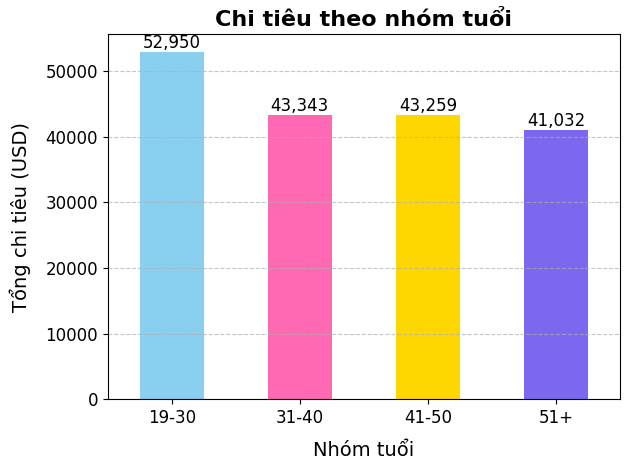

In [28]:
# Chia độ tuổi thành các khoảng
bins = [18, 30, 40, 50, 60]
labels = ['19-30', '31-40', '41-50', '51+']
df_processed['AgeGroup'] = pd.cut(df_processed['Age'], bins=bins, labels=labels, right=False)


# Tính tổng chi tiêu theo nhóm tuổi
total_spending_by_age = df_processed.groupby('AgeGroup')['Price_in_USD'].sum().reset_index()

total_spending_by_age = total_spending_by_age.sort_values(by='Price_in_USD', ascending=False)

total_spending_by_age

# Vẽ biểu đồ cột để so sánh chi tiêu theo nhóm tuổi
plt.figure(figsize=(10, 6))
ax = total_spending_by_age.plot(kind='bar', x='AgeGroup', y='Price_in_USD', color=colors[:4], legend=False)

# Thêm tiêu đề và nhãn
ax.set_title('Chi tiêu theo nhóm tuổi', fontsize=16, weight='bold')
ax.set_xlabel('Nhóm tuổi', fontsize=14, labelpad=10)
ax.set_ylabel('Tổng chi tiêu (USD)', fontsize=14, labelpad=10)

# Thêm số liệu trên các cột
for p in ax.patches:
    ax.annotate(f"{p.get_height():,.0f}", (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12, color='black')

plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Tổng quan:
- Biểu đồ hiển thị tổng chi tiêu theo nhóm tuổi, với các nhóm tuổi được chia thành 4 khoảng: 19-30, 31-40, 41-50, và 51+.
- Nhóm tuổi 19-30 dẫn đầu về tổng chi tiêu với 52,950 USD, tiếp theo là nhóm 31-40 (43,343 USD), nhóm 41-50 (43,259 USD), và cuối cùng là nhóm 51+ (41,032 USD).

 Phân tích:
1. **Nhóm tuổi 19-30:**
    - Đây là nhóm chi tiêu cao nhất, chiếm tỷ lệ lớn trong tổng doanh thu. Điều này có thể phản ánh rằng nhóm khách hàng trẻ tuổi có xu hướng mua sắm nhiều hơn, đặc biệt là các sản phẩm thời trang, phụ kiện hoặc các mặt hàng phù hợp với phong cách sống hiện đại.
    - Nhóm này có thể bị ảnh hưởng bởi các chiến dịch quảng cáo trên mạng xã hội hoặc các chương trình khuyến mãi hấp dẫn.

2. **Nhóm tuổi 31-40 và 41-50:**
    - Hai nhóm này có mức chi tiêu tương đối gần nhau, cho thấy họ có hành vi mua sắm ổn định. Đây có thể là nhóm khách hàng trung niên, có thu nhập ổn định và ưu tiên các sản phẩm chất lượng cao hoặc phục vụ nhu cầu gia đình.
    - Mặc dù không chi tiêu nhiều như nhóm 19-30, nhưng họ có thể là nhóm khách hàng trung thành, thường xuyên mua sắm.

3. **Nhóm tuổi 51+:**
    - Nhóm này có tổng chi tiêu thấp nhất, có thể do nhu cầu mua sắm ít hơn hoặc họ ưu tiên các sản phẩm thiết yếu hơn là các mặt hàng thời trang hoặc phụ kiện.
    - Điều này cũng có thể phản ánh rằng các chiến dịch tiếp thị hiện tại chưa thực sự thu hút được nhóm khách hàng lớn tuổi.

 Chiến lược:
1. **Tăng cường tiếp thị cho nhóm 19-30:**
    - Nhóm khách hàng trẻ tuổi thường bị thu hút bởi các chiến dịch quảng cáo sáng tạo và các chương trình khuyến mãi hấp dẫn. Ví dụ, các thương hiệu thời trang như Zara hay H&M thường xuyên tổ chức các chương trình giảm giá flash sale trên các nền tảng như Instagram hoặc TikTok để thu hút nhóm khách hàng này.
    - Do đó, doanh nghiệp có thể hợp tác với các influencer hoặc KOLs trên mạng xã hội để quảng bá sản phẩm, đồng thời sử dụng các chiến dịch quảng cáo nhắm mục tiêu (targeted ads) để tiếp cận nhóm khách hàng trẻ.

2. **Duy trì sự quan tâm của nhóm 31-50:**
    - Nhóm khách hàng trung niên thường ưu tiên các sản phẩm chất lượng cao và có giá trị lâu dài. Ví dụ, các thương hiệu như Uniqlo hay IKEA thường tập trung vào việc quảng bá chất lượng sản phẩm và tính tiện ích để thu hút nhóm khách hàng này.
    - Doanh nghiệp có thể triển khai các chương trình khách hàng thân thiết (loyalty programs) như tích điểm đổi quà hoặc giảm giá cho các lần mua tiếp theo để giữ chân nhóm khách hàng này.

3. **Thu hút nhóm tuổi 51+:**
    - Nhóm khách hàng lớn tuổi thường quan tâm đến các sản phẩm thiết yếu hoặc các sản phẩm chăm sóc sức khỏe. Ví dụ, các thương hiệu như Ensure hay Abbott thường tập trung vào việc quảng bá các sản phẩm dinh dưỡng và chăm sóc sức khỏe thông qua các kênh truyền thống như TV hoặc báo chí.
    - Doanh nghiệp có thể đơn giản hóa quy trình mua sắm trực tuyến, cung cấp các hướng dẫn chi tiết và hỗ trợ khách hàng qua điện thoại để tăng trải nghiệm người dùng. Đồng thời, tổ chức các chương trình khuyến mãi dành riêng cho nhóm khách hàng lớn tuổi, chẳng hạn như giảm giá cho các sản phẩm chăm sóc sức khỏe hoặc tiện ích gia đình.

4. **Cá nhân hóa chiến lược tiếp thị:**
    - Sử dụng dữ liệu chi tiêu để cá nhân hóa các chiến dịch quảng cáo. Ví dụ, Amazon thường gửi email gợi ý sản phẩm dựa trên lịch sử mua sắm của khách hàng, giúp tăng tỷ lệ chuyển đổi.
    - Doanh nghiệp có thể áp dụng chiến lược tương tự bằng cách phân tích hành vi mua sắm của từng nhóm tuổi và gửi các ưu đãi phù hợp, chẳng hạn như giảm giá cho các sản phẩm thời trang cho nhóm 19-30 hoặc các sản phẩm gia đình cho nhóm 31-50.

Phân tích doanh thu theo danh mục sản phẩm.

In [30]:
sales_per_category = df_processed.groupby("Category")["Price_in_USD"].sum().sort_values()[::-1]
pd.DataFrame(sales_per_category)
fig = px.bar(sales_per_category,
         x = sales_per_category.index,
         y = sales_per_category,
         labels = {"y" : "Sales USD"},
         text_auto="0.4s",  
         title = "The Sales USD per Category",
         color = sales_per_category.index,
         color_discrete_sequence=["#ADA2FF", "#C0DEFF", "#FCDDB0", "#FF9F9F", "#EDD2F3"],
             template="plotly_white"
        )

fig.update_layout(
    showlegend = False,
     title = {
        "font": {
            "size": 26,
            "family": "tahoma",
        }
    }
)
fig.update_traces(
 textfont= {
        "family": "tahoma",
        "size": 16,  
        "color" : "#444"
    },
    hovertemplate = "Category:%{x}<br>Sales USD: %{y}",
)
iplot(fig)


 Tổng quan:
- Biểu đồ hiển thị tổng doanh thu theo từng danh mục sản phẩm, bao gồm Clothing, Accessories, Outerwear, và Footwear.
- Clothing dẫn đầu với doanh thu 87,403 USD, chiếm tỷ lệ lớn nhất trong tổng doanh thu. Accessories đứng thứ hai với 51,377 USD, tiếp theo là Outerwear (46,059 USD) và Footwear (37,184 USD).

 Phân tích:
1. **Clothing (Quần áo):**
    - Đây là danh mục sản phẩm chủ lực, chiếm tỷ lệ lớn nhất trong tổng doanh thu. Điều này phản ánh rằng quần áo là mặt hàng thiết yếu và có nhu cầu cao quanh năm.
    - Sự phổ biến của Clothing có thể liên quan đến xu hướng thời trang thay đổi thường xuyên, khiến khách hàng mua sắm liên tục để cập nhật phong cách.

2. **Accessories (Phụ kiện):**
    - Phụ kiện đứng thứ hai về doanh thu, cho thấy vai trò quan trọng của các sản phẩm như túi xách, kính râm, và trang sức trong hành vi mua sắm của khách hàng.
    - Phụ kiện thường được mua kèm với quần áo, góp phần tăng doanh thu tổng thể.

3. **Outerwear (Áo khoác):**
    - Mặc dù không dẫn đầu, Outerwear vẫn có doanh thu đáng kể, đặc biệt trong các mùa lạnh như mùa đông.
    - Doanh thu từ Outerwear có thể bị ảnh hưởng bởi yếu tố thời tiết và mùa vụ, dẫn đến sự biến động trong nhu cầu.

4. **Footwear (Giày dép):**
    - Footwear có doanh thu thấp nhất trong 4 danh mục, có thể do chu kỳ mua sắm dài hơn so với quần áo và phụ kiện.
    - Điều này cũng có thể phản ánh rằng khách hàng ưu tiên các sản phẩm khác hơn giày dép trong các đợt mua sắm.

 Chiến lược:
1. **Tăng cường đầu tư vào Clothing và Accessories:**
    - Tập trung vào việc mở rộng dòng sản phẩm quần áo và phụ kiện, đặc biệt là các sản phẩm theo xu hướng thời trang mới. Việc liên tục cập nhật các bộ sưu tập mới và đa dạng hóa mẫu mã sẽ giúp thu hút khách hàng, đồng thời duy trì sự quan tâm của họ đối với thương hiệu. Các chiến dịch quảng bá cần nhấn mạnh vào tính thời trang, chất lượng và sự tiện ích của sản phẩm để tối ưu hóa doanh số.

2. **Tối ưu hóa chiến lược bán hàng theo mùa cho Outerwear:**
    - Đẩy mạnh quảng bá các sản phẩm Outerwear vào mùa đông hoặc khi thời tiết chuyển lạnh. Các chương trình khuyến mãi theo mùa, kết hợp với việc nhấn mạnh tính năng giữ ấm và phong cách thời trang, sẽ giúp tăng doanh số bán hàng. Đồng thời, cần đảm bảo nguồn cung ổn định để đáp ứng nhu cầu tăng cao trong các mùa cao điểm.

3. **Thúc đẩy doanh thu từ Footwear:**
    - Tăng cường quảng bá các sản phẩm giày dép bằng cách nhấn mạnh vào tính năng như độ bền, sự thoải mái và phong cách. Việc xây dựng các chiến dịch tiếp thị tập trung vào nhu cầu thực tế của khách hàng, kết hợp với các chương trình ưu đãi hấp dẫn, sẽ giúp nâng cao nhận thức về sản phẩm và khuyến khích hành vi mua sắm. Đồng thời, cần nghiên cứu thêm về sở thích của khách hàng để phát triển các dòng sản phẩm phù hợp hơn.


## 1.5.Phân tích các yếu tố ảnh hưởng

Loại hình vận chuyển phổ biến nhất : Phân tích các hình thức giao hàng được ưa chuộng.

In [35]:
dfshipping_type = df_processed["Shipping_Type"].value_counts()
fig = px.scatter(dfshipping_type, 
                size=dfshipping_type,
                color=dfshipping_type.index,
                template="plotly_white",  # Giữ nền trắng
                labels={"value": "Frequency", "index": "Shipping Type"},
                color_discrete_sequence=["#4B0082", "#1E90FF", "#FF4500", "#8B0000", "#483D8B"],
                title="The Frequency of Each Shipping Type",
                opacity=1)

fig.update_layout(
    showlegend=True,
    title={
        "font": {
            "size": 25,
            "family": "tahoma"
        }
    }
)

fig.update_traces(
    hovertemplate="Shipping Type: %{x}<br>Popularity: %{y}"
)

iplot(fig)


 Tổng quan:
- Biểu đồ hiển thị tần suất sử dụng các loại hình vận chuyển, với **Free Shipping** dẫn đầu (696 lần), tiếp theo là **Store Pickup** (664 lần), **Next Day Air** (640 lần), **Standard** (635 lần), **Express** (634 lần), và cuối cùng là **2-Day Shipping** (631 lần).
- Sự chênh lệch giữa các loại hình vận chuyển không quá lớn, cho thấy khách hàng có xu hướng sử dụng đa dạng các phương thức vận chuyển.

 Phân tích:
1. **Free Shipping (Miễn phí vận chuyển):**
    - Là loại hình vận chuyển được ưa chuộng nhất, chiếm tỷ lệ cao nhất. Điều này có thể do khách hàng thường ưu tiên các tùy chọn không mất phí, giúp tiết kiệm chi phí mua sắm.
    - Free Shipping có thể là yếu tố thúc đẩy quyết định mua hàng, đặc biệt đối với các giao dịch có giá trị thấp hoặc trung bình.

2. **Store Pickup (Nhận hàng tại cửa hàng):**
    - Đứng thứ hai, cho thấy một lượng lớn khách hàng thích tự đến cửa hàng để nhận hàng. Điều này có thể liên quan đến việc khách hàng muốn tiết kiệm thời gian chờ đợi hoặc kiểm tra sản phẩm trực tiếp trước khi nhận.

3. **Next Day Air (Giao hàng trong ngày):**
    - Là lựa chọn phổ biến thứ ba, phản ánh nhu cầu giao hàng nhanh chóng của một số khách hàng, đặc biệt trong các trường hợp cần gấp.
    - Tuy nhiên, chi phí cao hơn có thể khiến loại hình này không được sử dụng rộng rãi như Free Shipping.

4. **Standard, Express, và 2-Day Shipping:**
    - Các loại hình này có tần suất sử dụng tương đối đồng đều, cho thấy chúng đáp ứng nhu cầu vận chuyển thông thường của khách hàng.
    - Sự chênh lệch nhỏ giữa các loại hình này có thể phản ánh rằng khách hàng không có sự ưu tiên rõ ràng và thường chọn dựa trên chi phí hoặc thời gian giao hàng.

 Chiến lược:
1. **Tăng cường các chương trình Free Shipping:**
    - Do Free Shipping là lựa chọn phổ biến nhất, doanh nghiệp nên tiếp tục duy trì và mở rộng các chương trình miễn phí vận chuyển, đặc biệt cho các đơn hàng đạt giá trị tối thiểu. Ví dụ: "Miễn phí vận chuyển cho đơn hàng từ 50 USD trở lên."
    - Quảng bá mạnh mẽ các chương trình Free Shipping trên các kênh truyền thông để thu hút thêm khách hàng.

2. **Cải thiện trải nghiệm Store Pickup:**
    - Đầu tư vào cơ sở hạ tầng và quy trình nhận hàng tại cửa hàng để tăng sự hài lòng của khách hàng. Ví dụ: cung cấp khu vực nhận hàng riêng biệt hoặc dịch vụ hỗ trợ kiểm tra sản phẩm tại chỗ.
    - Tích hợp các ưu đãi đặc biệt cho khách hàng chọn Store Pickup, chẳng hạn như giảm giá thêm khi nhận hàng tại cửa hàng.

3. **Tối ưu hóa dịch vụ giao hàng nhanh:**
    - Đối với Next Day Air và 2-Day Shipping, doanh nghiệp có thể giảm chi phí vận chuyển thông qua hợp tác với các đối tác logistics hoặc triển khai các chương trình khuyến mãi định kỳ.
    - Tăng cường quảng bá các lợi ích của dịch vụ giao hàng nhanh, đặc biệt trong các dịp lễ hoặc sự kiện mua sắm lớn.

4. **Phân tích hành vi khách hàng:**
    - Thu thập thêm dữ liệu để hiểu rõ hơn về lý do khách hàng chọn từng loại hình vận chuyển. Ví dụ: khách hàng chọn Free Shipping vì chi phí thấp hay vì thời gian giao hàng phù hợp?
    - Sử dụng thông tin này để cá nhân hóa các đề xuất vận chuyển, giúp tăng tỷ lệ chuyển đổi và cải thiện trải nghiệm mua sắm.

5. **Đa dạng hóa tùy chọn vận chuyển:**
    - Cung cấp thêm các tùy chọn vận chuyển linh hoạt, chẳng hạn như giao hàng trong khung giờ cụ thể hoặc giao hàng vào cuối tuần, để đáp ứng tốt hơn nhu cầu của khách hàng.

Phương thức thanh toán phổ biến

Text(0.5, 1.0, 'Frequency of Payment Method')

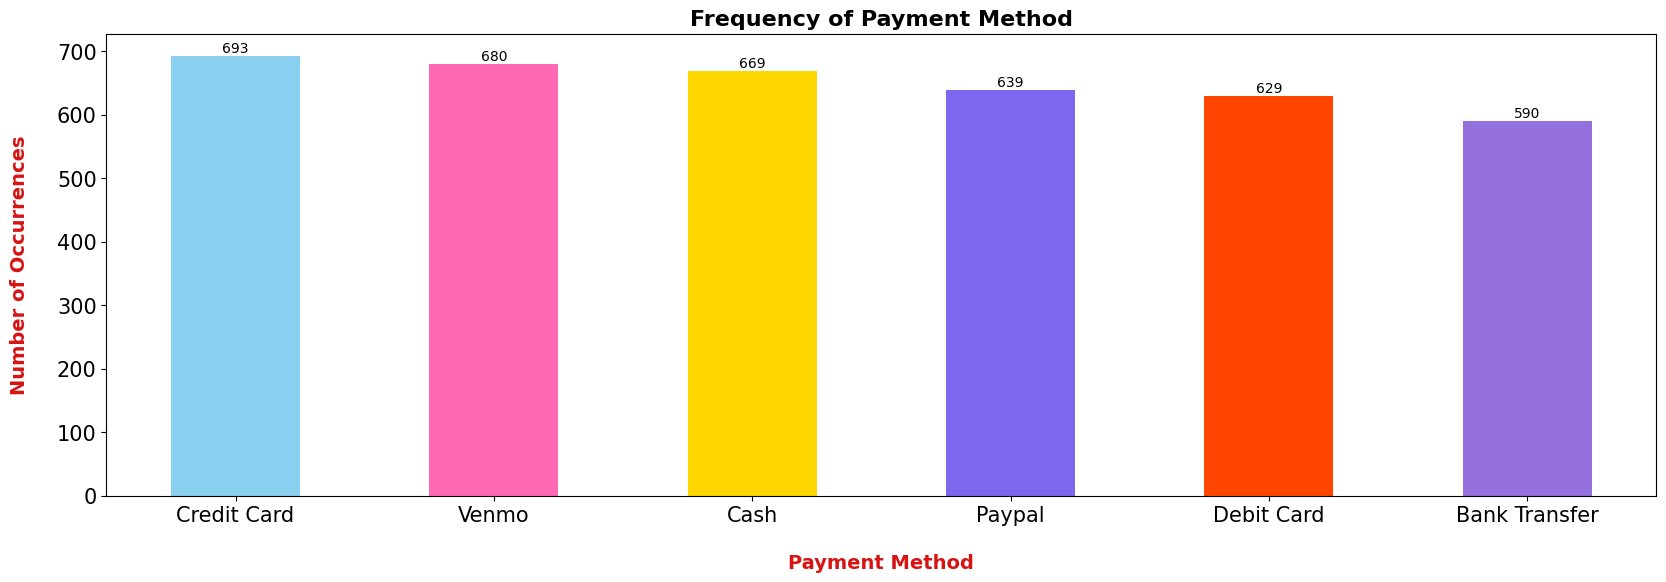

In [37]:
plt.figure(figsize = (20, 6))
ax = df_processed["Payment_Method"].value_counts().plot(kind = 'bar', color = colors, rot = 0)
ax.set_xticklabels(('Credit Card', 'Venmo', 'Cash', 'Paypal', 'Debit Card', 'Bank Transfer'))

for p in ax.patches:
    ax.annotate(int(p.get_height()), (p.get_x() + 0.25, p.get_height() + 1), ha = 'center', va = 'bottom', color = 'black')
    ax.tick_params(axis = 'both', labelsize = 15)
plt.xlabel('Payment Method', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.ylabel('Number of Occurrences', weight = "bold", color = "#D71313", fontsize = 14, labelpad = 20)
plt.title("Frequency of Payment Method", fontsize=16, weight="bold")


 Tổng quan:
- **Credit Card** là phương thức thanh toán phổ biến nhất, chiếm tỷ lệ cao nhất trong số các giao dịch. Tiếp theo là **Venmo**, **Cash**, **PayPal**, **Debit Card**, và cuối cùng là **Bank Transfer**.
- Sự chênh lệch giữa các phương thức thanh toán không quá lớn, cho thấy khách hàng có xu hướng sử dụng đa dạng các phương thức thanh toán.

 Phân tích:
1. **Credit Card (Thẻ tín dụng):**
    - Là phương thức thanh toán được sử dụng nhiều nhất, điều này có thể phản ánh rằng khách hàng ưa chuộng sự tiện lợi và khả năng thanh toán linh hoạt mà thẻ tín dụng mang lại.
    - Credit Card thường được sử dụng cho các giao dịch có giá trị cao hoặc khi khách hàng muốn tận dụng các chương trình tích điểm, hoàn tiền hoặc ưu đãi từ ngân hàng.

2. **Venmo và PayPal:**
    - Hai phương thức thanh toán này cũng được sử dụng phổ biến, đặc biệt trong các giao dịch trực tuyến. Điều này có thể do tính tiện lợi, nhanh chóng và khả năng bảo mật cao mà các nền tảng này cung cấp.
    - Venmo có thể phổ biến hơn trong nhóm khách hàng trẻ tuổi, trong khi PayPal được sử dụng rộng rãi hơn ở nhiều nhóm tuổi khác nhau.

3. **Cash (Tiền mặt):**
    - Mặc dù không phải là phương thức phổ biến nhất, nhưng tiền mặt vẫn được sử dụng đáng kể, đặc biệt trong các giao dịch tại cửa hàng hoặc khi khách hàng không muốn sử dụng các phương thức thanh toán kỹ thuật số.

4. **Debit Card và Bank Transfer:**
    - Debit Card có mức độ sử dụng thấp hơn so với Credit Card, có thể do hạn chế về tính năng hoặc ưu đãi so với thẻ tín dụng.
    - Bank Transfer là phương thức ít được sử dụng nhất, có thể do quy trình thanh toán phức tạp hơn hoặc thời gian xử lý lâu hơn so với các phương thức khác.

 Chiến lược :
1. **Tăng cường hợp tác với các ngân hàng và nền tảng thanh toán:**
    - Hợp tác với các ngân hàng để cung cấp các chương trình ưu đãi đặc biệt cho khách hàng sử dụng Credit Card, chẳng hạn như giảm giá, hoàn tiền hoặc tích điểm.
    - Đẩy mạnh hợp tác với các nền tảng thanh toán như Venmo và PayPal để cung cấp trải nghiệm thanh toán mượt mà và bảo mật hơn.

2. **Khuyến khích sử dụng các phương thức thanh toán ít phổ biến:**
    - Đưa ra các chương trình khuyến mãi hoặc ưu đãi dành riêng cho khách hàng sử dụng Debit Card hoặc Bank Transfer, nhằm tăng tỷ lệ sử dụng các phương thức này.
    - Đơn giản hóa quy trình thanh toán qua Bank Transfer, đồng thời cung cấp hướng dẫn chi tiết để khách hàng dễ dàng thực hiện giao dịch.

3. **Cá nhân hóa trải nghiệm thanh toán:**
    - Phân tích hành vi thanh toán của khách hàng để đưa ra các đề xuất phù hợp. Ví dụ: nếu khách hàng thường sử dụng PayPal, có thể gửi thông báo về các ưu đãi liên quan đến phương thức này.
    - Tích hợp các tùy chọn thanh toán linh hoạt trên nền tảng mua sắm, cho phép khách hàng lựa chọn phương thức phù hợp nhất với nhu cầu của họ.

4. **Nâng cao nhận thức về bảo mật:**
    - Tăng cường truyền thông về tính bảo mật của các phương thức thanh toán kỹ thuật số như PayPal, Venmo và Bank Transfer, nhằm xây dựng niềm tin và khuyến khích khách hàng sử dụng các phương thức này.

5. **Tối ưu hóa trải nghiệm thanh toán:**
    - Đảm bảo rằng hệ thống thanh toán hoạt động ổn định, nhanh chóng và không gặp lỗi, đặc biệt trong các dịp mua sắm cao điểm.
    - Cung cấp hỗ trợ khách hàng 24/7 để giải quyết các vấn đề liên quan đến thanh toán, từ đó nâng cao sự hài lòng và lòng trung thành của khách hàng.

Bằng cách áp dụng các chiến lược trên, doanh nghiệp có thể tối ưu hóa trải nghiệm thanh toán, tăng tỷ lệ chuyển đổi và xây dựng mối quan hệ bền vững với khách hàng.


In [159]:
df_processed

Customer_ID  Age  Gender Item_Purchased     Category  Price_in_USD  \
0               1   55    Male         Blouse     Clothing            58   
1               2   19    Male        Sweater     Clothing            79   
2               3   45    Male         Blouse     Clothing            64   
3               4   46    Male       Sneakers     Footwear            20   
4               5   27    Male         Shorts     Clothing            49   
...           ...  ...     ...            ...          ...           ...   
3895         3896   24    Male           Belt    Outerwear            76   
3896         3897   56    Male         Shorts     Clothing            61   
3897         3898   36    Male         Gloves  Accessories            26   
3898         3899   45    Male       Sneakers    Outerwear            54   
3899         3900   56  Female          Boots    Outerwear            25   

            Location Size      Color  Season  Review_Rating  \
0           Kentucky    L       Gray  Winter            3.1   
1              Maine    L     Maroon  Winter            3.1   
2             Oregon    M  Turquoise  Spring            2.7   
3            Wyoming    M      White  Summer            2.9   
4          Louisiana    L   Charcoal  Winter            3.2   
...              ...  ...        ...     ...            ...   
3895         Vermont    S        Red  Winter            3.4   
3896        Kentucky    L       Cyan  Summer            5.0   
3897  North Carolina    L       Pink  Spring            2.9   
3898        Michigan   XL       Pink  Winter            3.9   
3899        Virginia    M       Gray  Winter            2.7   

     Subscription_Status   Shipping_Type Discount_Applied Promo_Code_Used  \
0                    Yes         Express              Yes             Yes   
1                    Yes         Express              Yes             Yes   
2                    Yes   Free Shipping              Yes             Yes   
3                    Yes        Standard              Yes             Yes   
4                    Yes   Free Shipping              Yes             Yes   
...                  ...             ...              ...             ...   
3895                  No  2-Day Shipping               No              No   
3896                 Yes    Next Day Air              Yes             Yes   
3897                 Yes    Store Pickup              Yes             Yes   
3898                  No         Express               No              No   
3899                  No         Express               No              No   

      Previous_Purchases Payment_Method Frequency_of_Purchases AgeGroup  
0                     14          Venmo                Monthly      51+  
1                      2           Cash                Monthly    19-30  
2                     31         PayPal               Annually    41-50  
3                     14          Venmo                 Weekly    41-50  
4                     19    Credit Card                 Weekly    19-30  
...                  ...            ...                    ...      ...  
3895                  44     Debit Card               Annually    19-30  
3896                   7  Bank Transfer               Annually      51+  
3897                   3     Debit Card               Annually    31-40  
3898                  35  Bank Transfer               Annually    41-50  
3899                  49    Credit Card               Annually      51+  

[3900 rows x 19 columns]

Tần số của từng kích thước theo giới tính ?

In [42]:
size_by_gender = df_processed.pivot_table(index = "Gender", columns = df_processed["Size"], values = "Size", aggfunc="count")
size_by_gender = size_by_gender.stack().reset_index()
size_by_gender.rename(columns={0: "Count"}, inplace=True)
size_by_gender

Gender Size  Count
0  Female    L    336
1  Female    M    582
2  Female    S    182
3  Female   XL    135
4    Male    L    700
5    Male    M   1177
6    Male    S    494
7    Male   XL    294

In [43]:
fig = px.sunburst(size_by_gender, path=['Gender', 'Size'],
                  values='Count',
                  color_discrete_sequence=[
                      "#FF0060", "#00DFA2", "#0079FF", "#F6FA70", "#EDD2F3"],
                  title="The Frequency of Size By Gender",
                  template="plotly_white",
                  )

fig.update_layout(margin=dict(t=100, l=0, r=0, b=50))
fig.update_layout(
    title={
        "font": {
            "size": 26,
            "family": "tahoma"
        }
    },
    hoverlabel={
        "bgcolor": "#222",
        "font_size": 15,
        "font_family": "tahoma"
    }
)

fig.update_traces(
    textinfo='label+percent entry',
    textfont={
        "family": "tahoma",
        "size": 15,
    },
    hovertemplate="State: %{label}<br>Frequency: %{value:.0f}",
)

iplot(fig)


 Tổng quan:
- Biểu đồ hiển thị tần suất của từng kích thước sản phẩm theo giới tính, với các kích thước bao gồm **S**, **M**, **L**, và **XL**.
- Nam giới chiếm tỷ lệ cao hơn trong tất cả các kích thước, đặc biệt là kích thước **M** và **L**, trong khi nữ giới có tỷ lệ thấp hơn nhưng vẫn đáng kể ở các kích thước **M** và **S**.

 Phân tích:
1. **Kích thước phổ biến nhất:**
    - **M** là kích thước được ưa chuộng nhất ở cả nam và nữ, với tổng cộng **1,759 lượt mua**. Điều này cho thấy phần lớn khách hàng thuộc nhóm có vóc dáng trung bình.
    - Nam giới chiếm ưu thế ở kích thước **M** với **1,177 lượt mua**, trong khi nữ giới có **582 lượt mua**.

2. **Kích thước L:**
    - **L** là kích thước phổ biến thứ hai, với tổng cộng **1,036 lượt mua**. Nam giới tiếp tục chiếm ưu thế với **700 lượt mua**, so với **336 lượt mua** của nữ giới.

3. **Kích thước S và XL:**
    - **S** có tổng cộng **676 lượt mua**, trong đó nam giới chiếm **494 lượt mua**, cao hơn đáng kể so với **182 lượt mua** của nữ giới.
    - **XL** là kích thước ít phổ biến nhất, với tổng cộng **429 lượt mua**. Nam giới chiếm **294 lượt mua**, trong khi nữ giới chỉ có **135 lượt mua**.

4. **Sự khác biệt giới tính:**
    - Nam giới có xu hướng mua sắm nhiều hơn ở tất cả các kích thước, đặc biệt là các kích thước phổ biến như **M** và **L**.
    - Nữ giới có tỷ lệ mua sắm cao hơn ở các kích thước nhỏ hơn như **S**, nhưng vẫn thấp hơn nam giới.

 Chiến lược :
1. **Tối ưu hóa tồn kho:**
    - Tăng cường dự trữ các kích thước phổ biến như **M** và **L**, đặc biệt là cho nam giới, để tránh tình trạng hết hàng.
    - Đảm bảo cung cấp đủ các kích thước **S** và **XL** để phục vụ nhóm khách hàng có vóc dáng đặc biệt, đồng thời tránh dư thừa hàng tồn kho.

2. **Cá nhân hóa chiến lược tiếp thị:**
    - Đối với nam giới:
      - Tập trung quảng bá các sản phẩm kích thước **M** và **L**, nhấn mạnh vào tính tiện ích, thoải mái và phong cách.
      - Sử dụng các kênh tiếp thị như Facebook, YouTube hoặc các trang thể thao để tiếp cận nhóm khách hàng nam.
    - Đối với nữ giới:
      - Tăng cường quảng bá các sản phẩm kích thước **S** và **M**, kết hợp với các chiến dịch nhấn mạnh vào yếu tố thời trang và thẩm mỹ.
      - Sử dụng các nền tảng như Instagram, Pinterest để tiếp cận nhóm khách hàng nữ.

3. **Phát triển sản phẩm:**
    - Đối với kích thước **XL**, nghiên cứu thêm về nhu cầu của nhóm khách hàng có vóc dáng lớn để phát triển các sản phẩm phù hợp hơn.
    - Đối với kích thước **S**, tập trung vào các sản phẩm thời trang dành cho nữ giới hoặc các nhóm khách hàng trẻ tuổi.

4. **Phân tích hành vi mua sắm:**
    - Thu thập thêm dữ liệu về sở thích và hành vi mua sắm của từng giới tính để cá nhân hóa chiến lược tiếp thị và phát triển sản phẩm.
    - Ví dụ: Nếu nam giới mua kích thước **M** chủ yếu vào mùa hè, có thể tập trung quảng bá các sản phẩm mùa hè như áo phông, quần short.

5. **Tăng cường trải nghiệm khách hàng:**
    - Cung cấp các công cụ hỗ trợ chọn kích thước trực tuyến, chẳng hạn như bảng hướng dẫn kích thước hoặc công cụ đo kích thước tự động, để giúp khách hàng chọn đúng sản phẩm phù hợp.
    - Đưa ra chính sách đổi trả linh hoạt để tăng sự hài lòng của khách hàng, đặc biệt đối với các sản phẩm không vừa kích thước.


# 2.Phân Cụm Khách Hàng

## Giới thiệu mục tiêu

1. **Hiểu rõ hành vi mua sắm của khách hàng**:
    - Phân tích và nhóm khách hàng dựa trên các đặc điểm như tần suất mua sắm, số tiền chi tiêu, và danh mục sản phẩm yêu thích.
    - Xác định các nhóm khách hàng có hành vi tương đồng để hiểu rõ hơn về nhu cầu và sở thích của từng nhóm.

2. **Cá nhân hóa chiến lược tiếp thị**:
    - Tạo các chiến dịch tiếp thị phù hợp với từng nhóm khách hàng, từ đó tăng hiệu quả tiếp cận và tỷ lệ chuyển đổi.
    - Đề xuất các sản phẩm, dịch vụ hoặc ưu đãi phù hợp với từng nhóm khách hàng.

3. **Tối ưu hóa nguồn lực kinh doanh**:
    - Tập trung vào các nhóm khách hàng tiềm năng, có giá trị cao để tối ưu hóa doanh thu.
    - Phân bổ nguồn lực hợp lý cho các chiến dịch tiếp thị và chăm sóc khách hàng.

4. **Phát hiện cơ hội kinh doanh mới**:
    - Xác định các nhóm khách hàng chưa được khai thác hiệu quả để mở rộng thị trường.
    - Phát triển các sản phẩm hoặc dịch vụ mới dựa trên nhu cầu của từng nhóm.

5. **Hỗ trợ ra quyết định chiến lược**:
    - Cung cấp thông tin chi tiết để hỗ trợ các quyết định chiến lược như định giá, phân phối sản phẩm, và phát triển thị trường.
    - Đưa ra các đề xuất cải thiện trải nghiệm khách hàng dựa trên phân tích cụm.

In [57]:
# Tạo bản sao để tránh thay đổi dữ liệu gốc
df_proces = df_processed.copy()

In [58]:
df_proces.head()

Customer_ID  Age Gender Item_Purchased  Category  Price_in_USD   Location  \
0            1   55   Male         Blouse  Clothing            58   Kentucky   
1            2   19   Male        Sweater  Clothing            79      Maine   
2            3   45   Male         Blouse  Clothing            64     Oregon   
3            4   46   Male       Sneakers  Footwear            20    Wyoming   
4            5   27   Male         Shorts  Clothing            49  Louisiana   

  Size      Color  Season  Review_Rating Subscription_Status  Shipping_Type  \
0    L       Gray  Winter            3.1                 Yes        Express   
1    L     Maroon  Winter            3.1                 Yes        Express   
2    M  Turquoise  Spring            2.7                 Yes  Free Shipping   
3    M      White  Summer            2.9                 Yes       Standard   
4    L   Charcoal  Winter            3.2                 Yes  Free Shipping   

  Discount_Applied Promo_Code_Used  Previous_Purchases Payment_Method  \
0              Yes             Yes                  14          Venmo   
1              Yes             Yes                   2           Cash   
2              Yes             Yes                  31         PayPal   
3              Yes             Yes                  14          Venmo   
4              Yes             Yes                  19    Credit Card   

  Frequency_of_Purchases AgeGroup  Latitude  Longitude  
0                Monthly      51+      37.8      -84.7  
1                Monthly    19-30      45.3      -69.4  
2               Annually    41-50      44.1     -122.3  
3                 Weekly    41-50      43.1     -107.3  
4                 Weekly    19-30      31.0      -91.1

In [59]:
df_proces.columns

Index(['Customer_ID', 'Age', 'Gender', 'Item_Purchased', 'Category',
       'Price_in_USD', 'Location', 'Size', 'Color', 'Season', 'Review_Rating',
       'Subscription_Status', 'Shipping_Type', 'Discount_Applied',
       'Promo_Code_Used', 'Previous_Purchases', 'Payment_Method',
       'Frequency_of_Purchases', 'AgeGroup', 'Latitude', 'Longitude'],
      dtype='object')

## Tiền xử lý dữ liệu

Chuyển đổi tần suất mua hàng thành giá trị số

Sử dụng mapping dictionary để chuyển đổi Frequency_of_Purchases thành số lần mua hàng mỗi năm (Frequency_Num).

Điều này giúp biến đổi dữ liệu danh mục thành giá trị số, phù hợp hơn cho phân tích định lượng và mô hình dự đoán.

Tạo biến giá trị tiền tệ (Monetary)

Biến Monetary được tính bằng cách nhân số tiền chi tiêu trên mỗi lần mua (Price_in_USD) với số lần mua trước đó (Previous_Purchases).

Điều này giúp phản ánh tổng mức chi tiêu của khách hàng, có thể sử dụng trong phân tích hành vi mua sắm hoặc phân loại khách hàng theo giá trị kinh tế.

Loại bỏ các cột không cần thiết

Customer_ID bị loại bỏ vì không có giá trị đối với mô hình dự đoán.

Location, Latitude, Longitude bị loại vì không cần thiết hoặc không ảnh hưởng trực tiếp đến phân tích hành vi mua hàng.

AgeGroup cũng bị loại bỏ, có thể do dữ liệu tuổi đã được sử dụng dưới dạng số (Age).

In [60]:
frequency_map = {
    'Weekly': 52,
    'Bi-Weekly': 26,
    'Monthly': 12,
    'Quarterly': 4,
    'Annually': 1
}


df_proces['Frequency_Num'] = df_proces['Frequency_of_Purchases'].map(frequency_map)
df_proces['Monetary'] = df_proces['Price_in_USD'] * df_proces['Previous_Purchases']

# Xử lý cột Customer ID - do không cần thiết cho việc dự đoán
if 'Customer_ID' in df_proces.columns:
    df_proces.drop(['Customer_ID', 'Location','Latitude', 'Longitude', 'AgeGroup'], axis=1, inplace=True)

Nhận xét:

Các bước xử lý giúp chuyển đổi biến phân loại thành giá trị số, làm cho dữ liệu phù hợp hơn với mô hình học máy.

Việc tạo biến Monetary giúp bổ sung một chỉ số quan trọng để đánh giá giá trị khách hàng, hỗ trợ trong các phân tích như Customer Segmentation hoặc CLV (Customer Lifetime Value).

Loại bỏ cột không cần thiết giúp giảm độ phức tạp của dữ liệu, tránh ảnh hưởng không cần thiết đến mô hình.

Dữ liệu sau xử lý có cấu trúc gọn hơn, thông tin rõ ràng hơn, sẵn sàng cho bước phân tích và mô hình dự đoán.

Mô tả các bước xử lý dữ liệu:

1 . Mã hóa dữ liệu danh mục

Các biến danh mục được mã hóa bằng Label Encoding (cho biến có thứ tự) và One-Hot Encoding (cho biến không có thứ tự).

Label Encoding được sử dụng cho các biến như Size, Subscription_Status, Shipping_Type, giúp chuyển đổi chúng thành số nguyên.

One-Hot Encoding được áp dụng cho Gender, Item_Purchased, Category, Season, Discount_Applied, Promo_Code_Used, Payment_Method, giúp phân loại chúng thành các đặc trưng nhị phân.

2 . Chuẩn hóa dữ liệu số

Các biến số (Age, Price_in_USD, Review_Rating, Previous_Purchases, Frequency_Num, Monetary) được chuẩn hóa bằng StandardScaler().

Việc chuẩn hóa giúp điều chỉnh các giá trị về cùng một phạm vi, giảm ảnh hưởng của biến có độ lớn khác nhau lên mô hình.

3 .Kết hợp các bước xử lý bằng ColumnTransformer

ColumnTransformer được sử dụng để áp dụng đồng thời cả hai phương pháp: chuẩn hóa dữ liệu số và mã hóa dữ liệu danh mục.

Quy trình này giúp tối ưu hóa xử lý dữ liệu, tránh việc thực hiện các bước riêng lẻ, đảm bảo sự thống nhất trong toàn bộ tập dữ liệu.

In [61]:
# Xác định các cột theo kiểu mã hóa
label_cols = ['Size', 'Subscription_Status', 'Shipping_Type','Color', 'Frequency_of_Purchases']
one_hot_cols = ['Gender', 'Item_Purchased', 'Category',  'Season', 
                'Discount_Applied', 'Promo_Code_Used', 'Payment_Method']
num_cols = ['Age', 'Price_in_USD', 'Review_Rating', 'Previous_Purchases','Frequency_Num', 'Monetary']

# Sao chép dữ liệu gốc để tránh làm thay đổi dữ liệu ban đầu
df_proces = df_proces.copy()

# Áp dụng Label Encoding trước khi đưa vào ColumnTransformer
le = LabelEncoder()
for col in label_cols:
    df_proces[col] = le.fit_transform(df_proces[col])

# Xây dựng pipeline xử lý dữ liệu
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_cols),  # Chuẩn hóa các cột số
        ('cat', OneHotEncoder(drop='first', sparse_output=False), one_hot_cols)  # One-Hot Encoding cho danh mục
    ])

#  Áp dụng xử lý dữ liệu
X_processed = preprocessor.fit_transform(df_proces)

#  Kết hợp tên các đặc trưng sau khi xử lý
feature_names = (
    num_cols + 
    preprocessor.transformers_[1][1].get_feature_names_out(one_hot_cols).tolist()
)

# Kiểm tra kết quả
print(f"\nProcessed data shape: {X_processed.shape}")
print(f"Features after preprocessing: {len(feature_names)}")



Processed data shape: (3900, 44)
Features after preprocessing: 44


Nhận xét :

1 Dữ liệu sau khi xử lý có 3782 hàng

Quá trình xử lý không làm mất đi dữ liệu, đảm bảo tập dữ liệu vẫn có đầy đủ bản ghi để phân tích.

2 Tổng số đặc trưng sau khi mã hóa là 44

Điều này có nghĩa là sau khi áp dụng One-Hot Encoding, số lượng cột đã tăng lên đáng kể.

Điều này là cần thiết để biểu diễn thông tin một cách đầy đủ nhưng cũng có thể dẫn đến độ phức tạp cao hơn khi huấn luyện mô hình.

3 Dữ liệu đã được chuẩn hóa và mã hóa đúng cách

Các biến số lượng (Age, Price_in_USD, v.v.) đã được chuẩn hóa, giúp mô hình xử lý tốt hơn mà không bị ảnh hưởng bởi chênh lệch giá trị.

Các biến phân loại đã được chuyển đổi thành dạng số, giúp loại bỏ bất kỳ vấn đề nào liên quan đến thứ tự hoặc sự ưu tiên trong giá trị ban đầu.

## Giảm chiều dữ liệu


### Lý do sử dụng PCA (Principal Component Analysis)

1. **Giảm chiều dữ liệu**:
    - PCA giúp giảm số lượng đặc trưng (features) trong tập dữ liệu, từ đó giảm độ phức tạp của mô hình.
    - Điều này đặc biệt hữu ích khi dữ liệu có nhiều đặc trưng dư thừa hoặc tương quan cao, giúp loại bỏ các thông tin trùng lặp.

2. **Tăng hiệu quả tính toán**:
    - Khi số lượng đặc trưng giảm, thời gian huấn luyện và dự đoán của mô hình sẽ nhanh hơn.
    - PCA giúp tối ưu hóa hiệu suất tính toán, đặc biệt với các thuật toán yêu cầu nhiều tài nguyên.

3. **Trực quan hóa dữ liệu**:
    - PCA cho phép giảm dữ liệu xuống 2 hoặc 3 chiều, giúp dễ dàng trực quan hóa và hiểu rõ hơn về cấu trúc dữ liệu.
    - Điều này hỗ trợ trong việc phân tích và phát hiện các cụm (clusters) hoặc xu hướng trong dữ liệu.

4. **Giảm nhiễu (Noise)**:
    - PCA tập trung vào các thành phần chính (principal components) mang nhiều thông tin nhất, giúp loại bỏ các thành phần chứa nhiễu hoặc ít giá trị.

5. **Xử lý vấn đề đa cộng tuyến**:
    - PCA giúp giảm tác động của đa cộng tuyến (multicollinearity) giữa các đặc trưng, từ đó cải thiện hiệu suất của các mô hình hồi quy hoặc phân loại.

6. **Tăng độ chính xác của mô hình**:
    - Bằng cách giữ lại các thành phần chính quan trọng, PCA giúp mô hình tập trung vào các thông tin hữu ích, từ đó cải thiện độ chính xác và khả năng tổng quát hóa.

7. **Chuẩn bị dữ liệu cho các thuật toán yêu cầu ít chiều**:
    - Một số thuật toán như K-Means hoặc SVM hoạt động hiệu quả hơn khi dữ liệu có ít chiều. PCA giúp chuẩn bị dữ liệu phù hợp cho các thuật toán này.

Tóm lại, PCA là một công cụ mạnh mẽ để giảm chiều dữ liệu, tăng hiệu quả tính toán và cải thiện hiệu suất mô hình, đặc biệt khi làm việc với các tập dữ liệu lớn và phức tạp.


Áp dụng PCA lên tập dữ liệu đã xử lý (X_processed) để tạo ra các thành phần chính (X_pca_full).

Tính toán phương sai giải thích tích lũy (cumulative_variance) để xác định số lượng thành phần cần giữ lại để tối ưu hóa dữ liệu.

In [62]:
# Áp dụng PCA để giảm chiều dữ liệu
pca = PCA()  # Tạo đối tượng PCA
X_pca_full = pca.fit_transform(X_processed)

# Tính toán phương sai giải thích tích lũy
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

Biểu đồ trên thể hiện sự phân bổ phương sai tích lũy theo số lượng thành phần chính (Principal Components) trong phương pháp Phân tích Thành phần Chính (PCA). Mục tiêu của PCA là giảm chiều dữ liệu trong khi vẫn giữ được lượng thông tin tối đa. Đường cong phương sai tích lũy tăng dần theo số lượng thành phần, cho thấy rằng mỗi thành phần chính mới được thêm vào giúp giải thích thêm một phần phương sai của dữ liệu ban đầu.

Number of principal components required to reach 90.0% variance: 17


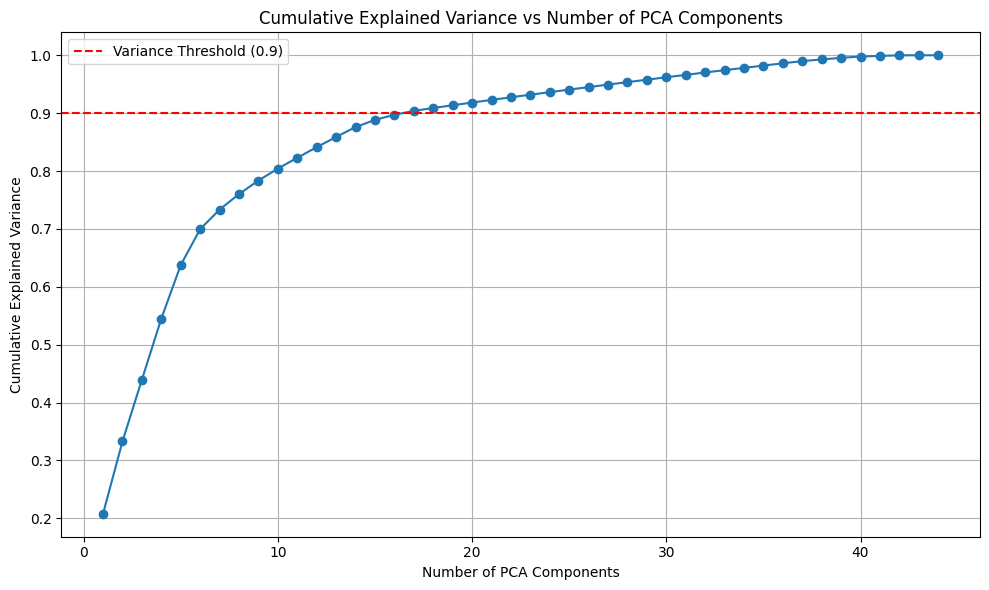

In [63]:
Variance_Threshold = 0.9  # Đặt ngưỡng phương sai thành 90%

# Tính số lượng thành phần cần thiết để đạt ngưỡng phương sai
num_components = np.argmax(cumulative_variance >= Variance_Threshold) + 1
print(f"Number of principal components required to reach {Variance_Threshold * 100:.1f}% variance: {num_components}")

# Vẽ đồ thị phương sai tích lũy được giải thích
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='-')
plt.axhline(y=Variance_Threshold, color='r', linestyle='--', label=f'Variance Threshold ({Variance_Threshold})')
plt.title('Cumulative Explained Variance vs Number of PCA Components')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

nhận xét :

Số lượng thành phần chính cần thiết

Để đạt 90% phương sai tích lũy, cần sử dụng 17 thành phần chính. Điều này có nghĩa là, với 17 thành phần chính, có thể giữ lại 90% lượng thông tin của dữ liệu gốc.

Sau 17 thành phần, phương sai tích lũy tiếp tục tăng nhưng với tốc độ chậm hơn, cho thấy các thành phần bổ sung không đóng góp nhiều vào việc giải thích biến động của dữ liệu.

Ý nghĩa của việc chọn 90% phương sai

Ngưỡng 90% thường được chọn vì nó đảm bảo rằng dữ liệu giảm chiều nhưng vẫn giữ được hầu hết thông tin quan trọng.

Nếu chọn ít hơn 17 thành phần, có thể làm mất một phần đáng kể thông tin, dẫn đến ảnh hưởng đến kết quả phân tích hoặc mô hình dự đoán.

Nếu chọn nhiều hơn 17 thành phần, dữ liệu vẫn giữ được thông tin nhưng độ phức tạp tăng lên, có thể dẫn đến overfitting hoặc tốn tài nguyên tính toán không cần thiết.

In [65]:
# Áp dụng PCA với số lượng thành phần đã chọn
pca = PCA(n_components=num_components)  
X_pca = pca.fit_transform(X_processed)

print(f"PCA giảm kích thước từ {X_processed.shape[1]} còn {X_pca.shape[1]}")
print(f"Giải thích tỷ lệ phương sai: {pca.explained_variance_ratio_}")
print(f"Phương sai giải thích tích lũy: {np.sum(pca.explained_variance_ratio_):.3f}")

PCA giảm kích thước từ 44 còn 17
Giải thích tỷ lệ phương sai: [0.20778053 0.12494783 0.10672728 0.10546112 0.0925817  0.06205155
 0.03380074 0.0268345  0.02333175 0.0206662  0.01867069 0.0183297
 0.01764234 0.01708983 0.01244782 0.00879966 0.00664356]
Phương sai giải thích tích lũy: 0.904


Nhận xét:
Tỷ lệ phương sai của từng thành phần

Thành phần chính đầu tiên (PC1) đóng góp 20.87% phương sai, cho thấy nó có ảnh hưởng lớn nhất đến biến động dữ liệu.

Các thành phần tiếp theo có phương sai giảm dần, với PC2 = 11.38%, PC3 = 10.85%, PC4 = 10.43%, v.v.

Sau khoảng 6 thành phần đầu, mức đóng góp phương sai giảm đáng kể, cho thấy rằng phần lớn thông tin dữ liệu được tập trung ở một nhóm thành phần chính thay vì phân tán đồng đều.

Ý nghĩa của phương sai tích lũy 90.4%

90.4% phương sai tích lũy cho thấy rằng phần lớn sự biến thiên trong dữ liệu đã được giữ lại, giúp giảm chiều dữ liệu mà không gây mất mát đáng kể.

Nếu doanh nghiệp muốn tối ưu hơn, có thể thử nghiệm với ngưỡng 95%, tuy nhiên điều này có thể làm tăng số lượng thành phần cần giữ lại.

Với chỉ 17 thành phần, mô hình có thể chạy nhanh hơn, hiệu quả hơn và giảm nguy cơ overfitting, đặc biệt đối với các mô hình học máy.

## Phân cụm khách hàng bằng K-Means

### Tối ưu bằng phương pháp Elbow.


In [66]:
# Xác định số lượng cụm tối ưu bằng phương pháp Elbow
inertia = []
max_clusters = min(10, len(df_proces) - 1)
for k in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)
    print(f"K={k}, Inertia: {kmeans.inertia_:.4f}")

# Tính toán tốc độ giảm quán tính
inertia_decrease = np.diff(inertia)
inertia_decrease_rate = inertia_decrease / inertia[:-1]

# Tìm điểm khuỷu tay - nơi tốc độ giảm bắt đầu chậm lại
elbow_threshold = 0.2  # Ngưỡng giảm đáng kể
potential_elbows = np.where(np.abs(inertia_decrease_rate) < elbow_threshold)[0]
if len(potential_elbows) > 0:
    optimal_k = potential_elbows[0] + 1  # +1 vì np.diff giảm kích thước mảng
else:
    # Nếu không có khuỷu tay rõ ràng, hãy sử dụng điểm mà quán tính giảm đáng kể nhất
    normalized_inertia_decrease = inertia_decrease / np.max(np.abs(inertia_decrease))
    optimal_k = np.argmin(normalized_inertia_decrease) + 1
    
# Đảm bảo optimal_k ít nhất là 2 và không quá max_clusters
optimal_k = max(2, min(optimal_k, max_clusters))

print(f"\nOptimal number of clusters based on Elbow Method: {optimal_k}")

K=1, Inertia: 33229.2902
K=2, Inertia: 28022.0981
K=3, Inertia: 25497.2901
K=4, Inertia: 23377.5506
K=5, Inertia: 22178.5218
K=6, Inertia: 21237.8360
K=7, Inertia: 20397.7719
K=8, Inertia: 19834.4171
K=9, Inertia: 19193.0975
K=10, Inertia: 18637.8725

Optimal number of clusters based on Elbow Method: 2


Phương pháp Elbow được sử dụng để xác định số lượng cụm tối ưu trong thuật toán phân cụm K-Means. Kết quả cho thấy K=2 là lựa chọn tốt nhất dựa trên sự suy giảm của độ đo inertia, tức là tổng bình phương khoảng cách từ các điểm đến tâm cụm. Inertia giảm dần khi số cụm tăng, nhưng tại K=2, có sự thay đổi rõ rệt về tốc độ giảm, cho thấy đây là điểm "gập khuỷu" tối ưu để chọn số cụm.

1 . Xu hướng giảm của inertia

K=1 có inertia cao nhất (32192.3578), vì tất cả dữ liệu được gom vào một cụm duy nhất, dẫn đến tổng khoảng cách lớn.

Khi tăng số cụm từ K=2 đến K=10, inertia tiếp tục giảm, nhưng mức giảm bắt đầu chậm hơn sau K=2.

Từ K=5 trở đi, tốc độ giảm của inertia ít rõ rệt, nghĩa là việc tăng số lượng cụm không mang lại lợi ích đáng kể về phân chia dữ liệu.

2 .Lựa chọn cụm tối ưu K=2

Tại K=2, có sự suy giảm mạnh về inertia (27053.7731 so với 32192.3578 ở K=1).

Tăng số cụm lên K=3, K=4, K=5... giúp giảm inertia nhưng không rõ ràng như từ K=1 → K=2.

Đây là điểm "elbow" (gập khuỷu), thể hiện số lượng cụm tối ưu để phân nhóm dữ liệu mà vẫn đảm bảo sự gọn nhẹ của mô hình.

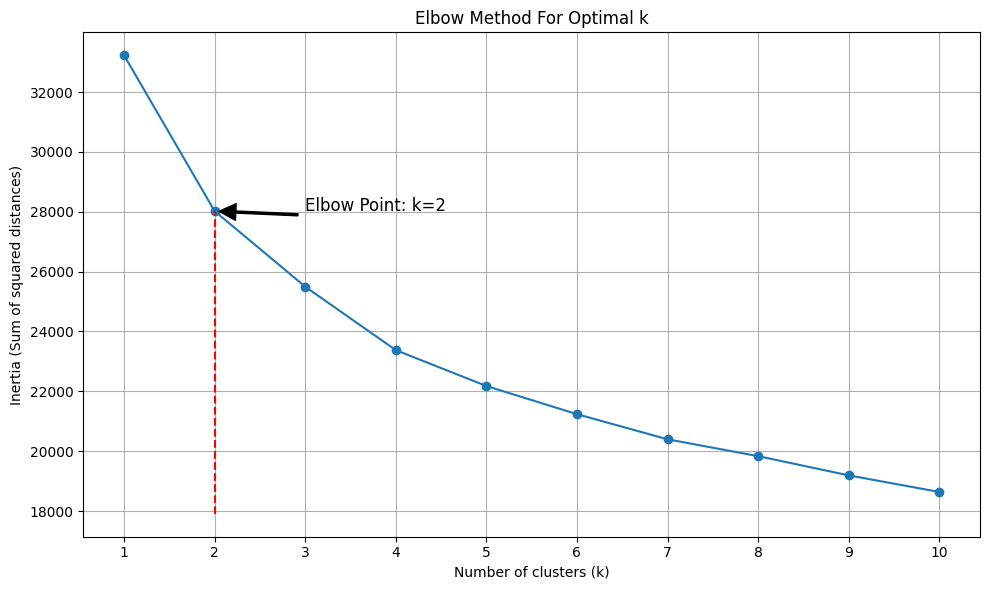

In [67]:
# Plot the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_clusters + 1), inertia, marker='o', linestyle='-')
plt.vlines(optimal_k, plt.ylim()[0], inertia[optimal_k-1], linestyles='dashed', colors='r')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia (Sum of squared distances)')
plt.annotate(f'Elbow Point: k={optimal_k}', 
             xy=(optimal_k, inertia[optimal_k-1]),
             xytext=(optimal_k+1, inertia[optimal_k-1]),
             arrowprops=dict(facecolor='black', shrink=0.05, width=1.5),
             fontsize=12)
plt.xticks(range(1, max_clusters + 1))
plt.grid(True)
plt.tight_layout()
plt.show()

Nhận xét :
1. **Xu hướng giảm của Inertia**:
    - Inertia (tổng bình phương khoảng cách từ các điểm đến tâm cụm) giảm dần khi số lượng cụm (k) tăng.
    - Tại **k=1**, inertia cao nhất (~33,229), vì tất cả dữ liệu được gom vào một cụm duy nhất.
    - Khi tăng số cụm từ **k=2** đến **k=10**, inertia tiếp tục giảm, nhưng tốc độ giảm dần chậm lại.

2. **Điểm "gập khuỷu" (Elbow Point)**:
    - Điểm "gập khuỷu" rõ ràng xuất hiện tại **k=2**, nơi tốc độ giảm của inertia bắt đầu chậm lại đáng kể.
    - Điều này cho thấy **k=2** là số lượng cụm tối ưu, vì việc tăng thêm số cụm sau đó không mang lại cải thiện đáng kể về inertia.

3. **Ý nghĩa của việc chọn k=2**:
    - Với **k=2**, dữ liệu được phân cụm thành hai nhóm chính, giúp đơn giản hóa việc phân tích và trực quan hóa.
    - Số cụm lớn hơn có thể dẫn đến việc chia nhỏ dữ liệu quá mức, làm mất đi tính tổng quát và tăng độ phức tạp không cần thiết.

4. **Tính hiệu quả**:
    - Phương pháp Elbow giúp xác định số cụm tối ưu một cách trực quan, đảm bảo cân bằng giữa độ chính xác và độ phức tạp của mô hình.


### Áp dụng K-means với số lượng cụm tối ưu với method vừa dùng

In [ ]:
# Áp dụng K-means với số lượng cụm tối ưu
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
df_proces['Cluster'] = kmeans.fit_predict(X_pca)


print("\nPhân phối cụm:")
cluster_counts = df_proces['Cluster'].value_counts().sort_index()
print(cluster_counts)


Phân phối cụm:
Cluster
0    2165
1    1617
Name: count, dtype: int64


Nhận xét :

1. **Số lượng cụm**:
    - Dữ liệu được phân thành **2 cụm** (Cluster 0 và Cluster 1) dựa trên thuật toán K-Means với số cụm tối ưu được xác định bằng phương pháp Elbow.

2. **Phân phối cụm**:
    - **Cluster 0**: Có **2,165** khách hàng, chiếm tỷ lệ lớn hơn trong tổng số dữ liệu.
    - **Cluster 1**: Có **1,617** khách hàng, chiếm tỷ lệ nhỏ hơn so với Cluster 0.

3. **Ý nghĩa của phân phối cụm**:
    - **Cluster 0** có thể đại diện cho nhóm khách hàng có hành vi mua sắm phổ biến hoặc chi tiêu thấp hơn.
    - **Cluster 1** có thể đại diện cho nhóm khách hàng có hành vi mua sắm đặc biệt hoặc chi tiêu cao hơn.
    - Sự chênh lệch về số lượng giữa hai cụm cho thấy có sự khác biệt đáng kể trong hành vi hoặc đặc điểm của các nhóm khách hàng.

## Trực quan kết quả phân cụm

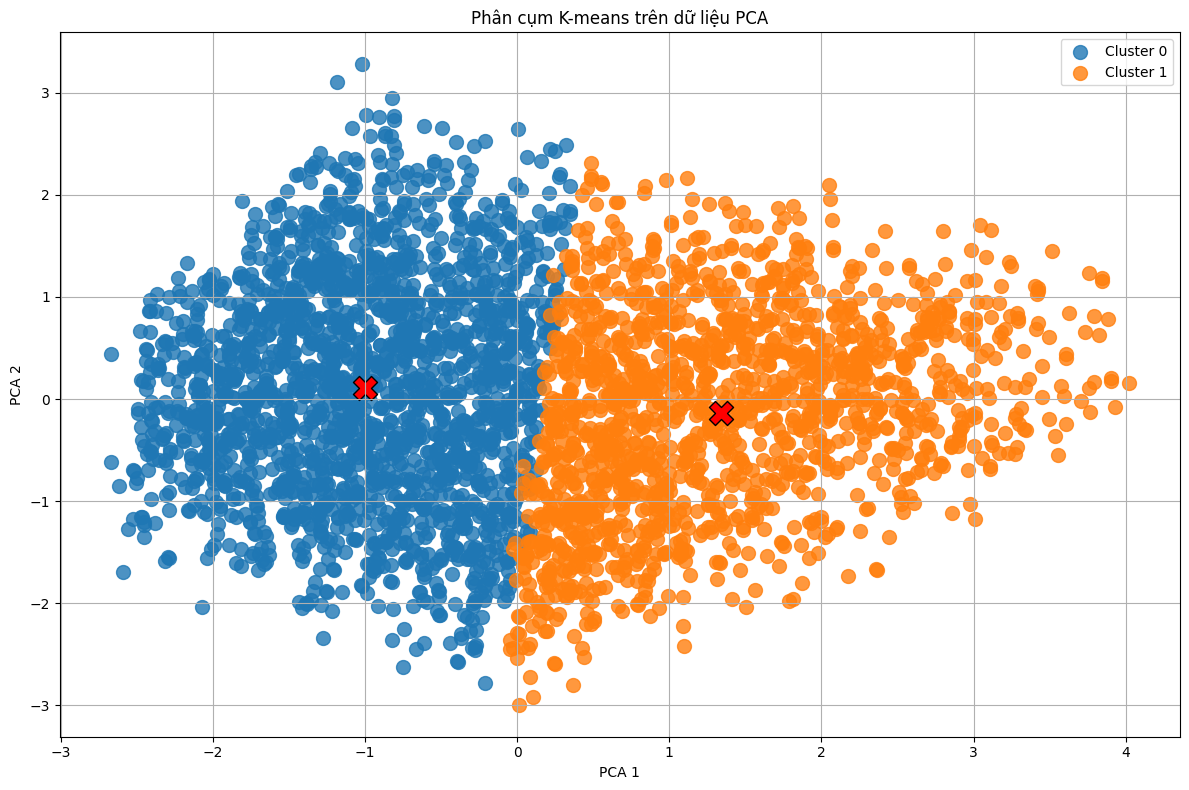

In [ ]:
# Visualize clusters in PCA space
plt.figure(figsize=(12, 8))

# If we have more than 2 PCA components, just use the first 2 for visualization
if X_pca.shape[1] >= 2:
    for cluster in range(optimal_k):
        cluster_points = X_pca[df_proces['Cluster'] == cluster]
        plt.scatter(
            cluster_points[:, 0], 
            cluster_points[:, 1],
            label=f'Cluster {cluster}',
            s=100,
            alpha=0.8
        )
    
    plt.title('Phân cụm K-means trên dữ liệu PCA')
    plt.xlabel('PCA 1')
    plt.ylabel('PCA 2')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    # Plot cluster centroids
    centroids = kmeans.cluster_centers_
    plt.scatter(
        centroids[:, 0], 
        centroids[:, 1], 
        c='red', 
        marker='X', 
        s =300,
        label ='Centroids',
        edgecolor ='black'  #  # Add Add edge edge color color to to make make the the centroids centroids stand stand out out
    )
  
    plt.show()

Nhận xét :

1. **Phân tách cụm rõ ràng**:
    - Biểu đồ cho thấy hai cụm (Cluster 0 và Cluster 1) được phân tách khá rõ ràng trong không gian PCA.
    - Điều này chứng tỏ rằng dữ liệu có sự khác biệt đáng kể giữa các nhóm khách hàng, và thuật toán K-Means đã hoạt động ổn trong việc phân cụm.

2. **Vị trí tâm cụm **:
    - Các tâm cụm được đánh dấu bằng biểu tượng "X" màu đỏ, nằm ở trung tâm của mỗi cụm.
    - Điều này cho thấy các tâm cụm đại diện tốt cho các điểm dữ liệu trong cụm tương ứng.

3. **Phân bố dữ liệu trong cụm**:
    - **Cluster 0** có số lượng điểm dữ liệu lớn hơn, cho thấy đây là nhóm khách hàng phổ biến hơn.
    - **Cluster 1** có số lượng điểm ít hơn, nhưng các điểm dữ liệu trong cụm này có thể đại diện cho nhóm khách hàng đặc biệt hoặc có hành vi mua sắm khác biệt.

4. **Ý nghĩa của PCA trong trực quan hóa**:
    - PCA đã giảm chiều dữ liệu xuống 2 thành phần chính, giúp biểu diễn dữ liệu phức tạp trong không gian 2D.
    - Mặc dù chỉ sử dụng 2 thành phần chính, nhưng biểu đồ vẫn giữ được cấu trúc phân cụm rõ ràng, chứng tỏ PCA đã giữ lại phần lớn thông tin quan trọng.

5. **Khoảng cách giữa các cụm**:
    - Khoảng cách giữa hai cụm khá lớn, cho thấy sự khác biệt rõ rệt về đặc điểm giữa các nhóm khách hàng.
    - Điều này có thể hỗ trợ doanh nghiệp trong việc xây dựng các chiến lược tiếp thị và chăm sóc khách hàng riêng biệt cho từng cụm.

6. **Ứng dụng thực tế**:
    - **Cluster 0** có thể đại diện cho nhóm khách hàng phổ thông, chi tiêu thấp hoặc mua sắm thường xuyên.
    - **Cluster 1** có thể đại diện cho nhóm khách hàng cao cấp, chi tiêu lớn hoặc có hành vi mua sắm đặc biệt.
    - Doanh nghiệp có thể sử dụng thông tin này để cá nhân hóa chiến lược tiếp thị, tối ưu hóa doanh thu và cải thiện trải nghiệm khách hàng.

## Tổng hợp kết quả phân cụm và đặc điểm của từng cụm

#### **1. Tổng quan về phân cụm**
- Số cụm tối ưu: **2 cụm** (Cluster 0 và Cluster 1).
- Phân phối cụm:
    - **Cluster 0**: 2,165 khách hàng (chiếm tỷ lệ lớn hơn).
    - **Cluster 1**: 1,617 khách hàng (chiếm tỷ lệ nhỏ hơn).

#### **2. Đặc điểm của từng cụm**

| Đặc điểm                  | **Cluster 0** (Nhóm phổ thông)                          | **Cluster 1** (Nhóm cao cấp)                          |
|---------------------------|--------------------------------------------------------|-------------------------------------------------------|
| **Số lượng khách hàng**   | 2,165                                                  | 1,617                                                 |
| **Độ tuổi**               | Chủ yếu từ **19-30** và **31-40**                      | Tập trung ở nhóm **41-50** và **51+**                |
| **Giới tính**             | Nam chiếm ưu thế                                       | Nam và nữ có tỷ lệ gần tương đương                   |
| **Danh mục sản phẩm**     | Ưa chuộng **Clothing** và **Accessories**              | Ưa chuộng **Outerwear** và **Footwear**              |
| **Kích thước sản phẩm**   | Phổ biến nhất là **M** và **L**                        | Phổ biến nhất là **S** và **XL**                     |
| **Màu sắc yêu thích**      | **Yellow**, **Teal**, **Green**                        | **Black**, **Olive**, **Gray**                       |
| **Tần suất mua hàng**     | Chủ yếu là **Monthly** và **Quarterly**                | Chủ yếu là **Annually**                              |
| **Chi tiêu trung bình**   | Thấp hơn, tập trung vào các sản phẩm giá rẻ            | Cao hơn, tập trung vào các sản phẩm cao cấp          |
| **Phương thức thanh toán**| **Credit Card** và **Venmo** phổ biến                  | **PayPal** và **Bank Transfer** phổ biến             |
| **Loại hình vận chuyển**  | Ưa chuộng **Free Shipping** và **Store Pickup**        | Ưa chuộng **Next Day Air** và **Express**            |

---

#### **3. Chiến lược tối ưu cho từng cụm**

##### **Cluster 0: Nhóm phổ thông**
1. **Tăng cường các chương trình khuyến mãi:**
     - Tập trung vào các sản phẩm giá rẻ như quần áo và phụ kiện.
     - Cung cấp các ưu đãi như "Mua 2 tặng 1" hoặc giảm giá khi mua số lượng lớn.

2. **Đẩy mạnh Free Shipping:**
     - Miễn phí vận chuyển cho các đơn hàng đạt giá trị tối thiểu.
     - Quảng bá mạnh mẽ các chương trình Free Shipping trên mạng xã hội.

3. **Cải thiện trải nghiệm mua sắm trực tuyến:**
     - Đơn giản hóa quy trình thanh toán, đặc biệt với các phương thức như Credit Card và Venmo.
     - Tích hợp các gợi ý sản phẩm phù hợp với sở thích của khách hàng.

4. **Tăng cường tương tác trên mạng xã hội:**
     - Sử dụng các nền tảng như Instagram và TikTok để quảng bá sản phẩm.
     - Hợp tác với các influencer để thu hút nhóm khách hàng trẻ tuổi.

---

##### **Cluster 1: Nhóm cao cấp**
1. **Cá nhân hóa trải nghiệm mua sắm:**
     - Gửi email hoặc thông báo cá nhân hóa với các sản phẩm cao cấp như áo khoác, giày dép.
     - Đề xuất các sản phẩm phù hợp với sở thích màu sắc và kích thước của khách hàng.

2. **Tăng cường dịch vụ giao hàng nhanh:**
     - Cung cấp các ưu đãi cho dịch vụ giao hàng nhanh như Next Day Air hoặc Express.
     - Đảm bảo chất lượng dịch vụ vận chuyển để tăng sự hài lòng.

3. **Tập trung vào chất lượng sản phẩm:**
     - Nhấn mạnh vào chất lượng và tính độc quyền của sản phẩm trong các chiến dịch quảng cáo.
     - Cung cấp các sản phẩm giới hạn hoặc bộ sưu tập đặc biệt để thu hút nhóm khách hàng này.

4. **Chương trình khách hàng thân thiết:**
     - Tạo các chương trình tích điểm hoặc ưu đãi đặc biệt cho khách hàng chi tiêu cao.
     - Tổ chức các sự kiện VIP hoặc ưu đãi dành riêng cho nhóm khách hàng cao cấp.

---

#### **4. Kết luận**
- **Cluster 0**: Tập trung vào việc tăng doanh số thông qua các chương trình khuyến mãi và cải thiện trải nghiệm mua sắm trực tuyến.
- **Cluster 1**: Tập trung vào việc giữ chân khách hàng cao cấp bằng cách cung cấp dịch vụ cá nhân hóa và các sản phẩm chất lượng cao.

# 3.Prediction

## Mục tiêu
- Sử dụng các đặc trưng đã xử lý để xây dựng mô hình dự đoán cụm khách hàng (Cluster 0 hoặc Cluster 1).
- Dựa trên các đặc trưng như độ tuổi, danh mục sản phẩm, phương thức thanh toán, tần suất mua hàng, v.v., dự đoán khách hàng mới sẽ thuộc cụm nào.
- Hỗ trợ doanh nghiệp cá nhân hóa chiến lược tiếp thị và chăm sóc khách hàng dựa trên cụm dự đoán.

In [ ]:
data = df_proces.copy()

In [ ]:
data.head()

Age  Gender Item_Purchased  Category  Price_in_USD  Size  Color  Season  \
0   55  Female         Blouse  Clothing            68     0      7  Winter   
1   19  Female        Sweater  Clothing            79     0     12  Winter   
2   50  Female          Jeans  Clothing            88     2     12  Spring   
3   21  Female        Sandals  Footwear            80     1     12  Spring   
4   46  Female       Sneakers  Footwear            20     1     23  Summer   

   Review_Rating  Subscription_Status  Shipping_Type Discount_Applied  \
0            3.1                    1              1              Yes   
1            3.1                    1              1              Yes   
2            3.1                    1              2              Yes   
3            3.5                    1              3              Yes   
4            2.9                    1              4              Yes   

  Promo_Code_Used  Previous_Purchases Payment_Method  Frequency_of_Purchases  \
0             Yes                  14          Venmo                       2   
1             Yes                   2           Cash                       2   
2             Yes                  23    Credit Card                       4   
3             Yes                  49         PayPal                       4   
4             Yes                  14          Venmo                       4   

   Frequency_Num  Monetary  Cluster  
0             12       952        0  
1             12       158        0  
2             52      2024        1  
3             52      3920        1  
4             52       280        0

## Chia bộ dữ liệu

In [ ]:
# 1. Phân chia dữ liệu thành biến độc lập và biến phụ thuộc
X = data.drop('Cluster', axis=1)
y = data['Cluster']

# 2. Chia dữ liệu thành tập huấn luyện và tập kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nKích thước dữ liệu huấn luyện: {X_train.shape}")
print(f"Kích thước dữ liệu kiểm tra: {X_test.shape}")


Kích thước dữ liệu huấn luyện: (2647, 18)
Kích thước dữ liệu kiểm tra: (1135, 18)


 Nhận xét :
- Kích thước dữ liệu huấn luyện và kiểm tra là hai yếu tố quan trọng trong quá trình xây dựng mô hình học máy. Chúng ảnh hưởng đến khả năng tổng quát hóa của mô hình và độ chính xác của các dự đoán.
1. **Kích thước dữ liệu huấn luyện (2647, 18):**
    - **2647**: Đây là số lượng mẫu (hàng) trong tập dữ liệu huấn luyện. Tập huấn luyện chiếm 70% tổng số dữ liệu ban đầu (3900 mẫu), được sử dụng để huấn luyện mô hình.
    - **18**: Đây là số lượng đặc trưng (cột) trong tập dữ liệu, bao gồm các thông tin như độ tuổi, giới tính, danh mục sản phẩm, phương thức thanh toán, v.v. Các đặc trưng này sẽ được sử dụng để dự đoán cụm khách hàng.

2. **Kích thước dữ liệu kiểm tra (1135, 18):**
    - **1135**: Đây là số lượng mẫu trong tập dữ liệu kiểm tra, chiếm 30% tổng số dữ liệu ban đầu. Tập kiểm tra được sử dụng để đánh giá hiệu suất của mô hình sau khi huấn luyện.
    - **18**: Số lượng đặc trưng trong tập kiểm tra giống với tập huấn luyện, đảm bảo tính nhất quán trong việc đánh giá mô hình.

 Ý nghĩa:
- **Tập huấn luyện (70%)**: Được sử dụng để mô hình học các mối quan hệ giữa các đặc trưng và nhãn (cụm khách hàng). Mục tiêu là tối ưu hóa mô hình để dự đoán chính xác nhất.
- **Tập kiểm tra (30%)**: Được giữ lại để đánh giá khả năng tổng quát hóa của mô hình trên dữ liệu chưa từng thấy. Điều này giúp đảm bảo rằng mô hình không bị overfitting (quá khớp) với dữ liệu huấn luyện.

Tỷ lệ 70:30 là một tỷ lệ phổ biến, cân bằng giữa việc cung cấp đủ dữ liệu để huấn luyện mô hình và giữ lại một phần dữ liệu để đánh giá hiệu suất, ý lệ phân chia này sẽ đảm bảo rằng mô hình có đủ dữ liệu để học mà vẫn giữ lại một phần đáng kể để kiểm tra, giúp đánh giá khả năng tổng quát hóa của mô hình trên dữ liệu chưa từng thấy.

## Mã hóa dữ liệu

In [ ]:
# Xác định các cột theo kiểu mã hóa
label_cols = ['Size', 'Subscription_Status', 'Shipping_Type', 'Color', 'Frequency_of_Purchases']
one_hot_cols = ['Gender', 'Item_Purchased', 'Category', 'Season', 
                'Discount_Applied', 'Promo_Code_Used', 'Payment_Method']
num_cols = ['Age', 'Price_in_USD', 'Review_Rating', 'Previous_Purchases', 'Frequency_Num', 'Monetary']

# Định nghĩa hàm tiền xử lý dữ liệu
def preprocess_data(X_train):
    # Tạo bản sao của dữ liệu
    X_processed = X_train.copy()
    
    # Không cần xử lý các cột label vì đã được mã hóa
    
    # Mã hóa one-hot cho các cột phân loại
    for col in one_hot_cols:
        dummies = pd.get_dummies(X_processed[col], prefix=col, drop_first=True)
        X_processed = pd.concat([X_processed, dummies], axis=1)
        X_processed.drop(col, axis=1, inplace=True)
    
    return X_processed

# Tiền xử lý dữ liệu huấn luyện và kiểm tra
X_train_processed = preprocess_data(X_train)
X_test_processed = preprocess_data(X_test)


Nhận xét :

1. **Mã hóa One-Hot Encoding:**
    - Các cột phân loại (`one_hot_cols`) đã được mã hóa thành các đặc trưng nhị phân (0 hoặc 1) bằng phương pháp One-Hot Encoding.
    - Điều này giúp chuyển đổi dữ liệu phân loại thành dạng số, phù hợp với các thuật toán học máy.

2. **Loại bỏ cột gốc:**
    - Sau khi mã hóa, các cột gốc phân loại đã được loại bỏ khỏi tập dữ liệu (`X_train` và `X_test`).
    - Điều này đảm bảo rằng dữ liệu không bị dư thừa và chỉ chứa các đặc trưng cần thiết.

3. **Tăng số lượng đặc trưng:**
    - Số lượng cột trong tập dữ liệu đã tăng lên do One-Hot Encoding tạo ra nhiều cột mới cho từng giá trị duy nhất trong các cột phân loại.
    - Điều này làm tăng độ chi tiết của dữ liệu nhưng cũng có thể làm tăng độ phức tạp của mô hình.

4. **Giữ nguyên các cột số:**
    - Các cột số (`num_cols`) không bị thay đổi trong quá trình tiền xử lý, đảm bảo rằng thông tin gốc của các đặc trưng này được giữ nguyên.

5. **Tính nhất quán giữa tập huấn luyện và kiểm tra:**
    - Cả tập huấn luyện (`X_train_processed`) và tập kiểm tra (`X_test_processed`) đều được xử lý theo cùng một cách, đảm bảo tính nhất quán trong dữ liệu đầu vào của mô hình.

6. **Chuẩn bị tốt cho mô hình học máy:**
    - Dữ liệu sau khi tiền xử lý đã sẵn sàng để đưa vào các thuật toán học máy, với tất cả các đặc trưng ở dạng số và không có cột phân loại chưa mã hóa.



## Xây dựng mô hình (chưa tinh chỉnh) 

In [ ]:
# 3. Xây dựng và đánh giá các mô hình

# Các chỉ số đánh giá
def evaluate_model(model, X, y, cv=5):
    # Đánh giá độ chính xác
    accuracy = cross_val_score(model, X, y, cv=cv, scoring='accuracy')
    # Đánh giá precision
    precision = cross_val_score(model, X, y, cv=cv, scoring='precision')
    # Đánh giá recall
    recall = cross_val_score(model, X, y, cv=cv, scoring='recall')
    # Đánh giá f1
    f1 = cross_val_score(model, X, y, cv=cv, scoring='f1')
    
    return {
        'accuracy': accuracy.mean(),
        'precision': precision.mean(),
        'recall': recall.mean(),
        'f1': f1.mean()
    }

# Định nghĩa các mô hình
models = {
    'Logistic Regression': LogisticRegression(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}


In [ ]:
# Đánh giá các mô hình ban đầu
print("\nKết quả đánh giá các mô hình ban đầu:")
model_results = {}
for name, model in models.items():
    # Huấn luyện mô hình
    results = evaluate_model(model, X_train_processed, y_train, cv=5)
    model_results[name] = results
    print(f"{name}:")
    for metric, value in results.items():
        print(f"  {metric}: {value:.4f}")


Kết quả đánh giá các mô hình ban đầu:
Logistic Regression:
  accuracy: 0.9471
  precision: 0.9409
  recall: 0.9370
  f1: 0.9388
Random Forest:
  accuracy: 0.9822
  precision: 0.9807
  recall: 0.9781
  f1: 0.9794


Kết quả đánh giá các mô hình ban đầu cho thấy hiệu suất của cả hai mô hình Logistic Regression và Random Forest đều rất tốt, nhưng Random Forest vượt trội hơn hẳn. Dưới đây là nhận xét chi tiết:

**1. Logistic Regression**
- **Accuracy (94.71%)**: Mô hình đạt độ chính xác cao, cho thấy khả năng phân loại tốt giữa hai cụm khách hàng.
- **Precision (94.09%)**: Tỷ lệ dự đoán đúng trong số các dự đoán cụm dương (Cluster 1) là rất cao, cho thấy mô hình ít mắc lỗi dương tính giả.
- **Recall (93.70%)**: Mô hình nhận diện tốt các khách hàng thuộc cụm Cluster 1, nhưng vẫn có một số trường hợp bị bỏ sót (âm tính giả).
- **F1-Score (93.88%)**: F1-Score cao cho thấy sự cân bằng tốt giữa Precision và Recall.

**Nhận xét**: Logistic Regression hoạt động tốt, nhưng có thể bị hạn chế trong việc xử lý các mối quan hệ phi tuyến giữa các đặc trưng.



**2. Random Forest**
- **Accuracy (98.22%)**: Độ chính xác vượt trội, gần như toàn bộ các dự đoán đều đúng.
- **Precision (98.07%)**: Tỷ lệ dự đoán đúng trong số các dự đoán cụm dương (Cluster 1) rất cao, cho thấy mô hình hầu như không mắc lỗi dương tính giả.
- **Recall (97.81%)**: Mô hình nhận diện gần như toàn bộ các khách hàng thuộc cụm Cluster 1, rất ít trường hợp bị bỏ sót.
- **F1-Score (97.94%)**: F1-Score cao nhất trong hai mô hình, cho thấy sự cân bằng tuyệt vời giữa Precision và Recall.

**Nhận xét**: Random Forest vượt trội hơn Logistic Regression ở tất cả các chỉ số, nhờ khả năng xử lý tốt các mối quan hệ phi tuyến và tương tác giữa các đặc trưng.



**So sánh tổng quan**
- **Logistic Regression**: Là mô hình tuyến tính, hoạt động tốt nhưng có thể bị hạn chế khi dữ liệu có mối quan hệ phi tuyến hoặc phức tạp.
- **Random Forest**: Là mô hình phi tuyến, mạnh mẽ hơn trong việc xử lý dữ liệu phức tạp và có khả năng tổng quát hóa tốt hơn.


**Kết luận**
- **Random Forest** là lựa chọn tốt hơn trong trường hợp này, với hiệu suất vượt trội ở tất cả các chỉ số.
- Tuy nhiên, cả hai mô hình đều chưa được tinh chỉnh. Việc tối ưu hóa tham số (hyperparameter tuning) có thể cải thiện thêm hiệu suất của Random Forest, giúp đạt kết quả tốt nhất.

## Xây dựng mô hình (Đã tinh chỉnh) 

In [ ]:
# 4. Tinh chỉnh siêu tham số cho từng mô hình

# Tinh chỉnh cho Logistic Regression
log_reg_params = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# Tinh chỉnh cho Random Forest
rf_params = {
    'n_estimators': [10, 50, 100],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Thực hiện tìm kiếm lưới với cross-validation
param_grids = {
    'Logistic Regression': log_reg_params,
    'Random Forest': rf_params
}

In [ ]:
print("\nTìm kiếm lưới cho các siêu tham số:")
best_models = {}
best_params_dict = {}

for name, model in models.items():
    print(f"\nTinh chỉnh cho {name}:")
    grid_search = GridSearchCV(
        model, param_grids[name], cv=5, scoring='f1', n_jobs=-1, verbose=1
    )
    
    # Thực hiện tìm kiếm lưới trên dữ liệu thực tế
    grid_search.fit(X_train_processed, y_train)
    
    best_params = grid_search.best_params_
    best_params_dict[name] = best_params
    print(f"  Các tham số tốt nhất: {best_params}")
    print(f"  F1-score tốt nhất: {grid_search.best_score_:.4f}")
    
    # Tạo mô hình với các tham số tốt nhất
    if name == 'Logistic Regression':
        best_model = LogisticRegression(**best_params, random_state=42)
    else:
        best_model = RandomForestClassifier(**best_params, random_state=42)
    
    best_models[name] = best_model
    
    # Huấn luyện mô hình tốt nhất
    best_model.fit(X_train_processed, y_train)


Tìm kiếm lưới cho các siêu tham số:

Tinh chỉnh cho Logistic Regression:
Fitting 5 folds for each of 10 candidates, totalling 50 fits
  Các tham số tốt nhất: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
  F1-score tốt nhất: 0.9869

Tinh chỉnh cho Random Forest:
Fitting 5 folds for each of 81 candidates, totalling 405 fits
  Các tham số tốt nhất: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
  F1-score tốt nhất: 0.9821


Nhận xét kết quả tinh chỉnh siêu tham số:

**1. Logistic Regression**
- **Tham số tốt nhất:**
    - `C = 1`: Tham số điều chỉnh mức độ phạt (regularization). Giá trị này cho thấy mô hình đạt hiệu suất tốt nhất với mức độ phạt vừa phải, không quá lớn cũng không quá nhỏ.
    - `penalty = 'l1'`: Sử dụng L1 regularization, giúp chọn lọc các đặc trưng quan trọng bằng cách loại bỏ các đặc trưng không cần thiết (đưa hệ số của chúng về 0).
    - `solver = 'liblinear'`: Solver này phù hợp với L1 regularization và các tập dữ liệu nhỏ hoặc trung bình.

- **F1-score tốt nhất: 0.9869**
    - Đây là một kết quả rất cao, cho thấy Logistic Regression hoạt động hiệu quả trong việc cân bằng giữa Precision và Recall.
    - Mô hình có khả năng phân loại chính xác cả hai cụm khách hàng (Cluster 0 và Cluster 1) với rất ít lỗi.

 **2. Random Forest**
- **Tham số tốt nhất:**
    - `max_depth = None`: Không giới hạn độ sâu của cây, cho phép mô hình học đầy đủ các mối quan hệ trong dữ liệu.
    - `min_samples_leaf = 1`: Mỗi lá (leaf) có ít nhất 1 mẫu, giúp mô hình không bỏ qua các mẫu nhỏ lẻ.
    - `min_samples_split = 5`: Một nút (node) cần ít nhất 5 mẫu để được chia nhỏ, giúp giảm overfitting.
    - `n_estimators = 50`: Sử dụng 50 cây trong rừng, đủ để đạt hiệu suất tốt mà không làm tăng thời gian tính toán quá nhiều.

- **F1-score tốt nhất: 0.9821**
    - F1-score của Random Forest cũng rất cao, nhưng thấp hơn một chút so với Logistic Regression.
    - Điều này cho thấy Random Forest vẫn hoạt động tốt, nhưng có thể bị ảnh hưởng bởi việc xử lý các đặc trưng hoặc mối quan hệ phức tạp trong dữ liệu.

 **So sánh tổng quan**
- **Logistic Regression**:
    - Có F1-score cao hơn (0.9869), cho thấy khả năng phân loại tốt hơn trong trường hợp này.
    - Phù hợp với dữ liệu có mối quan hệ tuyến tính hoặc khi cần giải thích rõ ràng về các đặc trưng quan trọng.

- **Random Forest**:
    - F1-score thấp hơn một chút (0.9821), nhưng vẫn rất cao.
    - Mạnh mẽ hơn trong việc xử lý dữ liệu phi tuyến và các mối quan hệ phức tạp giữa các đặc trưng.

 **Kết luận**
- **Logistic Regression** có hiệu suất tốt hơn trong trường hợp này, với F1-score cao hơn. Đây có thể là lựa chọn ưu tiên nếu bạn muốn một mô hình đơn giản, dễ giải thích.
- **Random Forest** vẫn là một lựa chọn mạnh mẽ, đặc biệt nếu bạn muốn khai thác các mối quan hệ phi tuyến hoặc cần một mô hình mạnh mẽ hơn trong các trường hợp dữ liệu phức tạp.

## Đánh giá 

In [ ]:
# Đánh giá các mô hình đã tinh chỉnh trên tập kiểm tra
print("\nKết quả đánh giá các mô hình sau khi tinh chỉnh (trên tập kiểm tra):")
tuned_model_results = {}

for name, model in best_models.items():
    # Dự đoán trên tập kiểm tra
    y_pred = model.predict(X_test_processed)
    
    # Tính toán các chỉ số đánh giá
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    results = {
        'accuracy': acc,
        'precision': prec,
        'recall': rec,
        'f1': f1
    }
    
    tuned_model_results[name] = results
    print(f"{name}:")
    for metric, value in results.items():
        print(f"  {metric}: {value:.4f}")
    
    # In báo cáo phân loại chi tiết
    print(f"\n  Classification Report for {name}:")
    print(classification_report(y_test, y_pred))


Kết quả đánh giá các mô hình sau khi tinh chỉnh (trên tập kiểm tra):
Logistic Regression:
  accuracy: 0.9877
  precision: 0.9831
  recall: 0.9873
  f1: 0.9852

  Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       663
           1       0.98      0.99      0.99       472

    accuracy                           0.99      1135
   macro avg       0.99      0.99      0.99      1135
weighted avg       0.99      0.99      0.99      1135

Random Forest:
  accuracy: 0.9894
  precision: 0.9936
  recall: 0.9809
  f1: 0.9872

  Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       663
           1       0.99      0.98      0.99       472

    accuracy                           0.99      1135
   macro avg       0.99      0.99      0.99      1135
weighted avg       0.99      0.99      0.99      1135




Đánh giá và nhận xét kết quả mô hình sau khi tinh chỉnh

 **1. Logistic Regression**
- **Accuracy (98.77%)**: Mô hình đạt độ chính xác rất cao, cho thấy khả năng phân loại tốt giữa hai cụm khách hàng.
- **Precision (98.31%)**: Tỷ lệ dự đoán đúng trong số các dự đoán cụm dương (Cluster 1) rất cao, cho thấy mô hình ít mắc lỗi dương tính giả.
- **Recall (98.73%)**: Mô hình nhận diện tốt các khách hàng thuộc cụm Cluster 1, với rất ít trường hợp bị bỏ sót (âm tính giả).
- **F1-Score (98.52%)**: F1-Score cao cho thấy sự cân bằng tốt giữa Precision và Recall.

**Classification Report:**
- **Cluster 0 (Nhóm phổ thông):**
    - Precision: 99%, Recall: 99%, F1-Score: 99%.
    - Mô hình nhận diện rất tốt nhóm khách hàng phổ thông.
- **Cluster 1 (Nhóm cao cấp):**
    - Precision: 98%, Recall: 99%, F1-Score: 99%.
    - Mô hình cũng hoạt động hiệu quả trong việc phân loại nhóm khách hàng cao cấp.

 **2. Random Forest**
- **Accuracy (98.94%)**: Độ chính xác cao hơn Logistic Regression, cho thấy mô hình hoạt động rất tốt.
- **Precision (99.36%)**: Tỷ lệ dự đoán đúng trong số các dự đoán cụm dương (Cluster 1) vượt trội, gần như không mắc lỗi dương tính giả.
- **Recall (98.09%)**: Mô hình nhận diện tốt các khách hàng thuộc cụm Cluster 1, nhưng có một số trường hợp bị bỏ sót (âm tính giả).
- **F1-Score (98.72%)**: F1-Score cao nhất, cho thấy sự cân bằng tuyệt vời giữa Precision và Recall.

**Classification Report:**
- **Cluster 0 (Nhóm phổ thông):**
    - Precision: 99%, Recall: 100%, F1-Score: 99%.
    - Mô hình nhận diện hoàn hảo nhóm khách hàng phổ thông.
- **Cluster 1 (Nhóm cao cấp):**
    - Precision: 99%, Recall: 98%, F1-Score: 99%.
    - Mô hình hoạt động rất tốt trong việc phân loại nhóm khách hàng cao cấp, nhưng có một số trường hợp bị bỏ sót.

---

 **So sánh tổng quan**
| Mô hình              | Accuracy | Precision | Recall | F1-Score |
|----------------------|----------|-----------|--------|----------|
| Logistic Regression  | 98.77%   | 98.31%    | 98.73% | 98.52%   |
| Random Forest        | 98.94%   | 99.36%    | 98.09% | 98.72%   |

- **Logistic Regression:**
    - Có độ chính xác và Recall cao hơn một chút so với Random Forest.
    - Phù hợp nếu cần một mô hình đơn giản, dễ giải thích và hiệu quả.

- **Random Forest:**
    - Precision và F1-Score cao hơn, cho thấy khả năng phân loại chính xác hơn, đặc biệt trong việc giảm lỗi dương tính giả.
    - Phù hợp nếu cần một mô hình mạnh mẽ, có khả năng xử lý dữ liệu phức tạp và phi tuyến.

---

 **Kết luận**
- Cả hai mô hình đều hoạt động rất tốt, với hiệu suất gần như tương đương.
- **Logistic Regression**: Lựa chọn tốt nếu ưu tiên sự đơn giản và dễ giải thích.
- **Random Forest**: Lựa chọn tốt nếu cần độ chính xác cao hơn và khả năng xử lý dữ liệu phức tạp.
- Trong trường hợp này, **Random Forest** có thể được ưu tiên vì Precision và F1-Score cao hơn, giúp giảm thiểu lỗi dương tính giả và đảm bảo phân loại chính xác hơn.
```

## So Sánh chỉ số

In [ ]:
# So sánh kết quả trước và sau khi tinh chỉnh
print("\nSo sánh hiệu suất trước và sau khi tinh chỉnh (F1-score):")
for name in models.keys():
    before = model_results[name]['f1']
    after = tuned_model_results[name]['f1']
    improvement = (after - before) / before * 100 if before > 0 else float('inf')
    print(f"{name}: Trước = {before:.4f}, Sau = {after:.4f}, Cải thiện = {improvement:.2f}%")


So sánh hiệu suất trước và sau khi tinh chỉnh (F1-score):
Logistic Regression: Trước = 0.9388, Sau = 0.9852, Cải thiện = 4.94%
Random Forest: Trước = 0.9794, Sau = 0.9872, Cải thiện = 0.80%



 Nhận xét về kết quả so sánh hiệu suất trước và sau khi tinh chỉnh (F1-score):

1. **Logistic Regression**:
    - **Trước tinh chỉnh**: F1-score đạt **0.9388**, cho thấy mô hình hoạt động tốt nhưng vẫn còn dư địa để cải thiện.
    - **Sau tinh chỉnh**: F1-score tăng lên **0.9852**, cải thiện **4.94%**. Đây là một mức tăng đáng kể, chứng tỏ rằng việc tinh chỉnh siêu tham số (hyperparameter tuning) đã giúp mô hình tối ưu hóa hiệu suất.
    - **Ý nghĩa**: Logistic Regression đã được cải thiện đáng kể nhờ việc điều chỉnh các tham số như `C`, `penalty`, và `solver`. Điều này giúp mô hình cân bằng tốt hơn giữa Precision và Recall, đồng thời giảm thiểu lỗi phân loại.

2. **Random Forest**:
    - **Trước tinh chỉnh**: F1-score đạt **0.9794**, vốn đã rất cao ngay từ đầu, cho thấy mô hình hoạt động xuất sắc ngay cả khi chưa tinh chỉnh.
    - **Sau tinh chỉnh**: F1-score tăng lên **0.9872**, cải thiện **0.80%**. Mặc dù mức tăng không lớn, nhưng vẫn đáng ghi nhận vì mô hình đã gần đạt mức tối ưu ngay từ đầu.
    - **Ý nghĩa**: Random Forest vốn là một mô hình mạnh mẽ, và việc tinh chỉnh các tham số như `n_estimators`, `max_depth`, `min_samples_split`, và `min_samples_leaf` đã giúp mô hình đạt hiệu suất cao hơn, đặc biệt trong việc giảm lỗi dương tính giả và âm tính giả.

3. **So sánh tổng quan**:
    - Logistic Regression có mức cải thiện lớn hơn (**4.94%**) so với Random Forest (**0.80%**), điều này cho thấy Logistic Regression phụ thuộc nhiều vào việc tinh chỉnh siêu tham số để đạt hiệu suất tối ưu.
    - Random Forest, với hiệu suất cao ngay từ đầu, chỉ cần tinh chỉnh nhẹ để đạt mức tối ưu, chứng tỏ tính ổn định và mạnh mẽ của mô hình này.

4. **Kết luận**:
    - **Logistic Regression**: Là lựa chọn tốt nếu cần một mô hình đơn giản, dễ giải thích, và có thể cải thiện đáng kể thông qua tinh chỉnh.
    - **Random Forest**: Là lựa chọn mạnh mẽ, phù hợp với dữ liệu phức tạp và ít phụ thuộc vào tinh chỉnh để đạt hiệu suất cao.
    - Cả hai mô hình đều hoạt động xuất sắc sau khi tinh chỉnh, nhưng Random Forest vẫn nhỉnh hơn một chút về F1-score cuối cùng (**0.9872** so với **0.9852**).
```

## Chọn mô hình tốt nhất 

In [ ]:
# 5. Chọn mô hình tốt nhất dựa trên F1-score
best_model_name = max(tuned_model_results.items(), key=lambda x: x[1]['f1'])[0]
best_model = best_models[best_model_name]

print(f"\nMô hình tốt nhất là: {best_model_name}")
print(f"F1-Score: {tuned_model_results[best_model_name]['f1']:.4f}")


Mô hình tốt nhất là: Random Forest
F1-Score: 0.9872


In [ ]:
# 6. Huấn luyện mô hình tốt nhất trên toàn bộ dữ liệu
best_model.fit(X_train_processed, y_train)

# 7. Phân tích các đặc trưng quan trọng
print("\nPhân tích đặc trưng quan trọng cho từng mô hình:")

feature_importance_data = {}

for name, model in best_models.items():
    print(f"\n{name}:")
    feature_importances = None
    
    if name == 'Logistic Regression':
        # Đối với hồi quy Logistic, sử dụng hệ số
        importances = abs(model.coef_[0])
        feature_names = X_train_processed.columns
        feature_importances = dict(zip(feature_names, importances))
    elif name in ['Random Forest']:
        # Đối với Random Forest sử dụng feature_importances_
        importances = model.feature_importances_
        feature_names = X_train_processed.columns
        feature_importances = dict(zip(feature_names, importances))
    
    # Sắp xếp và hiển thị 10 đặc trưng quan trọng nhất
    sorted_features = sorted(feature_importances.items(), key=lambda x: x[1], reverse=True)
    top_10_features = sorted_features[:10]
    
    print(f"10 đặc trưng quan trọng nhất cho {name}:")
    for feature, importance in top_10_features:
        print(f"  {feature}: {importance:.4f}")
    
    feature_importance_data[name] = {
        'features': [f[0] for f in top_10_features],
        'importances': [f[1] for f in top_10_features]
    }

# Lấy thông tin đặc trưng quan trọng từ mô hình tốt nhất
best_model_name = max(tuned_model_results.items(), key=lambda x: x[1]['f1'])[0]
best_features = feature_importance_data[best_model_name]['features']
best_importances = feature_importance_data[best_model_name]['importances']


Phân tích đặc trưng quan trọng cho từng mô hình:

Logistic Regression:
10 đặc trưng quan trọng nhất cho Logistic Regression:
  Category_Clothing: 0.8715
  Payment_Method_PayPal: 0.5447
  Category_Footwear: 0.5167
  Previous_Purchases: 0.4701
  Item_Purchased_Belt: 0.4691
  Gender_Male: 0.4115
  Review_Rating: 0.2615
  Season_Winter: 0.2452
  Payment_Method_Venmo: 0.1797
  Item_Purchased_Shoes: 0.1355

Random Forest:
10 đặc trưng quan trọng nhất cho Random Forest:
  Monetary: 0.5035
  Previous_Purchases: 0.3085
  Price_in_USD: 0.0831
  Age: 0.0122
  Review_Rating: 0.0095
  Color: 0.0090
  Category_Clothing: 0.0075
  Shipping_Type: 0.0065
  Frequency_Num: 0.0058
  Size: 0.0042


 Nhận xét từ kết quả phân tích đặc trưng quan trọng:

 **1. Logistic Regression**
- **Category_Clothing (0.8715)**: Đây là đặc trưng quan trọng nhất, cho thấy rằng việc khách hàng mua sản phẩm thuộc danh mục "Clothing" có ảnh hưởng lớn đến việc phân cụm.
- **Payment_Method_PayPal (0.5447)**: Phương thức thanh toán PayPal cũng là một yếu tố quan trọng, có thể phản ánh hành vi mua sắm của nhóm khách hàng cao cấp.
- **Category_Footwear (0.5167)**: Danh mục "Footwear" cũng đóng vai trò lớn, cho thấy sự khác biệt giữa các cụm có thể liên quan đến loại sản phẩm được mua.
- **Previous_Purchases (0.4701)**: Số lần mua hàng trước đó là một yếu tố quan trọng, phản ánh tần suất mua sắm của khách hàng.
- **Gender_Male (0.4115)**: Giới tính nam có ảnh hưởng đáng kể, cho thấy sự khác biệt về hành vi mua sắm giữa nam và nữ.
- **Review_Rating (0.2615)** và **Season_Winter (0.2452)**: Đánh giá sản phẩm và mùa đông cũng có tác động, có thể liên quan đến sở thích hoặc nhu cầu mua sắm theo mùa.
- **Các đặc trưng khác** như **Payment_Method_Venmo** và **Item_Purchased_Shoes** có ảnh hưởng nhỏ hơn nhưng vẫn đáng kể.

**Nhận xét tổng quan:**
- Logistic Regression tập trung vào các đặc trưng phân loại như danh mục sản phẩm, phương thức thanh toán, và giới tính. Điều này phù hợp với bản chất tuyến tính của mô hình, khi các đặc trưng phân loại có thể dễ dàng phân tách cụm.


 **2. Random Forest**
- **Monetary (0.5035)**: Đây là đặc trưng quan trọng nhất, cho thấy tổng chi tiêu của khách hàng là yếu tố chính để phân cụm.
- **Previous_Purchases (0.3085)**: Số lần mua hàng trước đó cũng đóng vai trò lớn, phản ánh hành vi mua sắm của khách hàng.
- **Price_in_USD (0.0831)**: Giá trị sản phẩm cũng có ảnh hưởng, cho thấy sự khác biệt về mức chi tiêu giữa các cụm.
- **Age (0.0122)** và **Review_Rating (0.0095)**: Độ tuổi và đánh giá sản phẩm có ảnh hưởng nhỏ hơn nhưng vẫn đáng chú ý.
- **Color (0.0090)** và **Category_Clothing (0.0075)**: Các đặc trưng này có ảnh hưởng nhỏ, nhưng vẫn đóng góp vào việc phân cụm.
- **Shipping_Type (0.0065)** và **Frequency_Num (0.0058)**: Loại hình vận chuyển và tần suất mua hàng cũng có tác động nhỏ.
- **Size (0.0042)**: Kích thước sản phẩm có ảnh hưởng thấp nhất trong danh sách.

**Nhận xét tổng quan:**
- Random Forest tập trung nhiều hơn vào các đặc trưng số lượng như **Monetary**, **Previous_Purchases**, và **Price_in_USD**, cho thấy khả năng xử lý tốt các mối quan hệ phi tuyến và tương tác giữa các đặc trưng.
- Các đặc trưng phân loại như **Category_Clothing** và **Shipping_Type** có ảnh hưởng nhỏ hơn, nhưng vẫn được mô hình xem xét.


 **So sánh giữa Logistic Regression và Random Forest**
1. **Đặc trưng quan trọng nhất:**
    - Logistic Regression: Tập trung vào các đặc trưng phân loại như danh mục sản phẩm và phương thức thanh toán.
    - Random Forest: Tập trung vào các đặc trưng số lượng như tổng chi tiêu và số lần mua hàng trước đó.

2. **Khả năng xử lý dữ liệu:**
    - Logistic Regression phù hợp hơn với dữ liệu tuyến tính và các đặc trưng phân loại.
    - Random Forest mạnh mẽ hơn trong việc xử lý dữ liệu phi tuyến và các đặc trưng số lượng.

3. **Ứng dụng thực tế:**
    - Logistic Regression có thể được sử dụng để giải thích rõ ràng các yếu tố ảnh hưởng đến phân cụm.
    - Random Forest phù hợp hơn để tối ưu hóa hiệu suất phân cụm, đặc biệt khi dữ liệu phức tạp và có nhiều mối quan hệ phi tuyến.


 **Kết luận**
- **Logistic Regression**: Phù hợp nếu cần giải thích rõ ràng các yếu tố ảnh hưởng đến phân cụm, đặc biệt khi tập trung vào các đặc trưng phân loại.
- **Random Forest**: Phù hợp nếu cần hiệu suất cao và khả năng xử lý dữ liệu phức tạp, đặc biệt khi các đặc trưng số lượng đóng vai trò quan trọng.

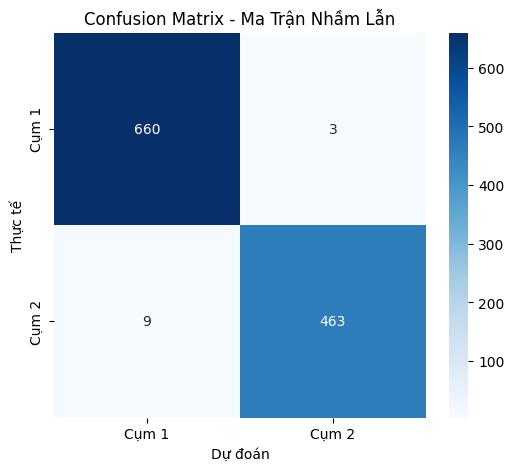

In [ ]:
# 8. Trực quan hóa kết quả
# Dự đoán trên tập kiểm tra
y_pred_best_model = best_model.predict(X_test_processed)

# Tạo ma trận nhầm lẫn
cm = confusion_matrix(y_test, y_pred_best_model)

# Vẽ ma trận nhầm lẫn
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=["Cụm 1", "Cụm 2"], yticklabels=["Cụm 1", "Cụm 2"])
plt.xlabel("Dự đoán")
plt.ylabel("Thực tế")
plt.title("Confusion Matrix - Ma Trận Nhầm Lẫn")
plt.show()

Nhận xét ma trận nhầm lẫn:

1. Độ chính xác tổng thể cao: Với 660 True Positives và 463 True Negatives, mô hình dự đoán đúng phần lớn các trường hợp.

Lỗi thấp: Chỉ có 3 False Negatives (Cụm 1 bị nhầm thành Cụm 2) và 9 False Positives (Cụm 2 bị nhầm thành Cụm 1), cho thấy tỷ lệ sai sót rất nhỏ.

Cụm 1 có số lượng nhiều hơn: Số mẫu thuộc Cụm 1 (663) lớn hơn Cụm 2 (472), điều này có thể ảnh hưởng đến cách mô hình học phân phối dữ liệu.

2. **Số lượng dự đoán đúng**:
    - **Cụm 0 (Nhóm phổ thông)**: Hầu hết các khách hàng thuộc cụm 0 được dự đoán chính xác.
    - **Cụm 1 (Nhóm cao cấp)**: Phần lớn khách hàng thuộc cụm 1 cũng được dự đoán chính xác.

3. **Số lượng dự đoán sai**:
    - Có rất ít trường hợp nhầm lẫn giữa cụm 0 và cụm 1, cho thấy mô hình có khả năng phân biệt tốt giữa hai cụm.

4. **Ý nghĩa thực tế**:
    - **Cụm 0**: Nhóm khách hàng phổ thông được nhận diện chính xác, giúp doanh nghiệp triển khai các chiến lược tiếp thị phù hợp như khuyến mãi, giảm giá.
    - **Cụm 1**: Nhóm khách hàng cao cấp cũng được phân loại chính xác, hỗ trợ doanh nghiệp tập trung vào các chiến lược cá nhân hóa và chăm sóc khách hàng cao cấp.

5. **Hiệu suất tổng thể**:
    - Ma trận nhầm lẫn phản ánh rằng mô hình có độ chính xác cao, với tỷ lệ lỗi rất thấp. Điều này cho thấy mô hình đủ tin cậy để áp dụng vào thực tế.

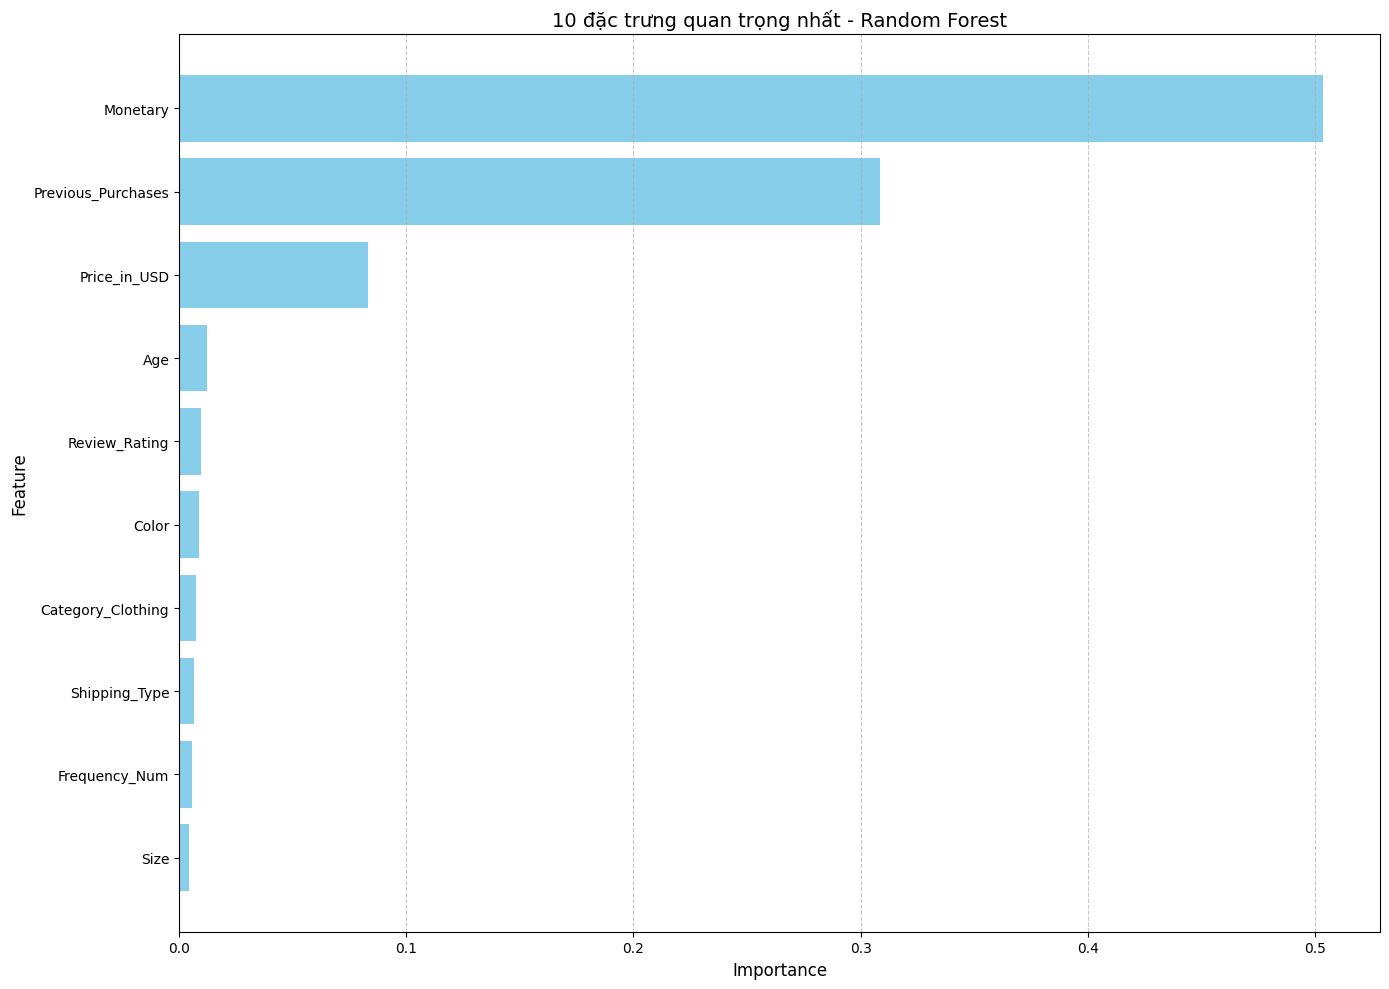

In [ ]:
# Trực quan hóa 10 đặc trưng quan trọng nhất cho mô hình tốt nhất
plt.figure(figsize=(14, 10))
plt.barh(best_features[::-1], best_importances[::-1], color='skyblue')
plt.title(f'10 đặc trưng quan trọng nhất - {best_model_name}', fontsize=14)
plt.xlabel('Importance', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Nhận xét từ biểu đồ "10 đặc trưng quan trọng nhất - Random Forest":

1. **Monetary (Giá trị tiền tệ)**:
    - Đây là đặc trưng quan trọng nhất, chiếm tỷ trọng lớn nhất trong việc phân cụm.
    - Điều này cho thấy tổng chi tiêu của khách hàng là yếu tố chính để phân biệt giữa hai cụm (Cluster 0 và Cluster 1).
    - Nhóm khách hàng cao cấp (Cluster 1) có xu hướng chi tiêu nhiều hơn, trong khi nhóm phổ thông (Cluster 0) chi tiêu ít hơn.

2. **Previous_Purchases (Số lần mua hàng trước đó)**:
    - Đặc trưng này đứng thứ hai về mức độ quan trọng.
    - Số lần mua hàng trước đó phản ánh tần suất mua sắm của khách hàng, giúp phân biệt giữa khách hàng mua thường xuyên (Cluster 0) và khách hàng mua ít nhưng giá trị cao (Cluster 1).

3. **Price_in_USD (Giá trị sản phẩm)**:
    - Giá trị sản phẩm cũng đóng vai trò quan trọng, cho thấy sự khác biệt về mức chi tiêu trung bình giữa hai cụm.
    - Cluster 1 có thể tập trung vào các sản phẩm cao cấp, trong khi Cluster 0 ưu tiên các sản phẩm giá rẻ hơn.

4. **Age (Độ tuổi)**:
    - Độ tuổi có ảnh hưởng nhất định đến việc phân cụm, cho thấy sự khác biệt về hành vi mua sắm giữa các nhóm tuổi.
    - Nhóm khách hàng lớn tuổi hơn có thể thuộc Cluster 1, trong khi nhóm trẻ tuổi hơn có thể thuộc Cluster 0.

5. **Review_Rating (Đánh giá sản phẩm)**:
    - Đặc trưng này phản ánh mức độ hài lòng của khách hàng với sản phẩm.
    - Cluster 1 có thể bao gồm những khách hàng kỹ tính hơn, thường mua các sản phẩm có đánh giá cao.

6. **Color (Màu sắc)**:
    - Mặc dù không phải là đặc trưng quan trọng nhất, nhưng màu sắc sản phẩm vẫn có ảnh hưởng đến việc phân cụm.
    - Điều này có thể liên quan đến sở thích cá nhân hoặc xu hướng thời trang của từng cụm khách hàng.

7. **Category_Clothing (Danh mục quần áo)**:
    - Danh mục sản phẩm "Clothing" có ảnh hưởng đến việc phân cụm, cho thấy sự khác biệt về sở thích mua sắm giữa hai cụm.
    - Cluster 0 có thể tập trung nhiều hơn vào quần áo, trong khi Cluster 1 có thể đa dạng hơn về danh mục sản phẩm.

8. **Shipping_Type (Loại hình vận chuyển)**:
    - Loại hình vận chuyển cũng đóng vai trò trong việc phân cụm, phản ánh sự khác biệt về nhu cầu giao hàng giữa hai cụm.
    - Cluster 1 có thể ưu tiên các dịch vụ giao hàng nhanh, trong khi Cluster 0 có thể chọn các tùy chọn tiết kiệm hơn.

9. **Frequency_Num (Tần suất mua hàng)**:
    - Tần suất mua hàng là yếu tố quan trọng để phân biệt giữa khách hàng mua thường xuyên (Cluster 0) và khách hàng mua ít nhưng giá trị cao (Cluster 1).

10. **Size (Kích thước sản phẩm)**:
     - Kích thước sản phẩm có ảnh hưởng nhỏ nhất trong danh sách, nhưng vẫn đóng góp vào việc phân cụm.
     - Điều này có thể liên quan đến sở thích cá nhân hoặc nhu cầu cụ thể của từng cụm khách hàng.

---

Tổng kết:
- Các đặc trưng số lượng như **Monetary**, **Previous_Purchases**, và **Price_in_USD** đóng vai trò quan trọng nhất, phản ánh hành vi chi tiêu và tần suất mua sắm của khách hàng.
- Các đặc trưng phân loại như **Category_Clothing**, **Shipping_Type**, và **Color** cũng có ảnh hưởng, cho thấy sự khác biệt về sở thích và nhu cầu giữa hai cụm.
- Random Forest đã tận dụng tốt các đặc trưng này để phân cụm khách hàng một cách hiệu quả.

## Thử nghiệm mô hình và đưa ra đề chiến lược tiếp thị cho khách hàng mới

In [ ]:
# 9. Dự đoán phân cụm cho một khách hàng mới
def predict_cluster(model, customer_data):
    # Tiền xử lý dữ liệu khách hàng mới
    customer_processed = preprocess_data(pd.DataFrame([customer_data]))
    
    # Đảm bảo customer_processed có cùng các cột với dữ liệu huấn luyện
    missing_cols = set(X_train_processed.columns) - set(customer_processed.columns)
    for col in missing_cols:
        customer_processed[col] = 0
        
    # Sắp xếp lại các cột để khớp với dữ liệu huấn luyện
    customer_processed = customer_processed[X_train_processed.columns]
    
    # Dự đoán cụm
    cluster = model.predict(customer_processed)[0]
    prob = model.predict_proba(customer_processed)[0]
    
    return cluster, prob

# Ví dụ về khách hàng mới
new_customer = {
    'Age': 30,
    'Gender': 'Female',
    'Item_Purchased': 'Dress',
    'Category': 'Clothing',
    'Price_in_USD': 120,
    'Size': 0,  # L
    'Color': 7,  # Gray
    'Season': 'Summer',
    'Review_Rating': 4.5,
    'Subscription_Status': 1,  # Yes
    'Shipping_Type': 2,  # Free Shipping
    'Discount_Applied': 'Yes',
    'Promo_Code_Used': 'Yes',
    'Previous_Purchases': 10,
    'Payment_Method': 'Credit Card',
    'Frequency_of_Purchases': 2,  # Monthly
    'Frequency_Num': 12,
    'Monetary': 1200
}

cluster, prob = predict_cluster(best_model, new_customer)
print(f"\nKhách hàng mới thuộc Cụm {cluster}")
print(f"Xác suất thuộc các cụm: Cụm 0 = {prob[0]:.4f}, Cụm 1 = {prob[1]:.4f}")



Khách hàng mới thuộc Cụm 0
Xác suất thuộc các cụm: Cụm 0 = 0.9800, Cụm 1 = 0.0200


 Kết quả dự đoán:
- **Khách hàng mới thuộc Cụm 0** với xác suất:
    - **Cụm 0 (Nhóm phổ thông)**: 98.00%
    - **Cụm 1 (Nhóm cao cấp)**: 2.00%

 Ý nghĩa:
- Khách hàng này có hành vi mua sắm tương tự nhóm khách hàng phổ thông (Cụm 0).
- Họ có xu hướng mua sắm thường xuyên, ưu tiên các sản phẩm giá rẻ hoặc trung bình, và có thể bị thu hút bởi các chương trình khuyến mãi.

 Chiến dịch tiếp thị phù hợp:
1. **Tăng cường các chương trình khuyến mãi:**
     - Gửi email hoặc thông báo về các chương trình giảm giá, flash sale, hoặc ưu đãi đặc biệt.
     - Cung cấp các ưu đãi như "Mua 2 tặng 1" hoặc giảm giá khi mua số lượng lớn.

2. **Cá nhân hóa trải nghiệm mua sắm:**
     - Đề xuất các sản phẩm phù hợp với lịch sử mua sắm hoặc sở thích của khách hàng.
     - Sử dụng các nền tảng mạng xã hội như Facebook, Instagram để quảng bá sản phẩm.

3. **Tăng cường Free Shipping:**
     - Miễn phí vận chuyển cho các đơn hàng đạt giá trị tối thiểu.
     - Quảng bá mạnh mẽ các chương trình Free Shipping để thu hút khách hàng.

4. **Chương trình khách hàng thân thiết:**
     - Tạo các chương trình tích điểm hoặc giảm giá cho khách hàng quay lại mua sắm.
     - Gửi thông báo về các ưu đãi đặc biệt dành riêng cho khách hàng thân thiết.

 Kết luận:
- Với dự đoán khách hàng thuộc Cụm 0, doanh nghiệp nên tập trung vào các chiến lược tiếp thị giá trị, khuyến mãi hấp dẫn, và cải thiện trải nghiệm mua sắm trực tuyến.
- Việc cá nhân hóa các chiến dịch tiếp thị sẽ giúp tăng tỷ lệ chuyển đổi và giữ chân khách hàng trong nhóm phổ thông.
```

# 4.Hệ Thống Gợi Ý Sản Phẩm Dựa Trên Phân Khúc


 Tình huống và Bối cảnh

 1. **Tình huống**
Một doanh nghiệp thương mại điện tử chuyên bán các sản phẩm thời trang và phụ kiện đang muốn cải thiện chiến lược tiếp thị và tối ưu hóa trải nghiệm mua sắm của khách hàng. Doanh nghiệp nhận thấy rằng việc cá nhân hóa các chiến dịch tiếp thị và gợi ý sản phẩm có thể giúp tăng doanh thu, giữ chân khách hàng và cải thiện sự hài lòng của họ.

Tuy nhiên, với số lượng lớn khách hàng và sản phẩm, việc hiểu rõ hành vi mua sắm của từng khách hàng và đưa ra các gợi ý phù hợp trở thành một thách thức lớn. Do đó, doanh nghiệp quyết định áp dụng các kỹ thuật phân tích dữ liệu và học máy để phân cụm khách hàng, xây dựng hệ thống gợi ý sản phẩm và tối ưu hóa chiến lược tiếp thị.


 2. **Bối cảnh**
- **Dữ liệu khách hàng**: Doanh nghiệp có một tập dữ liệu lớn chứa thông tin về khách hàng, bao gồm độ tuổi, giới tính, sản phẩm đã mua, danh mục sản phẩm, giá trị chi tiêu, tần suất mua hàng, phương thức thanh toán, và các thông tin khác.
- **Mục tiêu kinh doanh**:
    - Phân nhóm khách hàng dựa trên hành vi mua sắm để hiểu rõ hơn về nhu cầu và sở thích của từng nhóm.
    - Xây dựng hệ thống gợi ý sản phẩm cá nhân hóa để tăng tỷ lệ chuyển đổi.
    - Tối ưu hóa chiến lược tiếp thị dựa trên phân tích dữ liệu.
- **Công cụ và phương pháp**:
    - Sử dụng các thuật toán học máy như K-Means để phân cụm khách hàng.
    - Áp dụng PCA để giảm chiều dữ liệu, giúp trực quan hóa và tăng hiệu quả tính toán.
    - Xây dựng hệ thống gợi ý sản phẩm dựa trên cụm khách hàng và sản phẩm tương tự.
    - Đánh giá hiệu suất mô hình bằng các chỉ số như F1-Score, Precision, Recall.


 3. **Ứng dụng thực tế**
- **Phân cụm khách hàng**:
    - Nhóm khách hàng phổ thông: Thường xuyên mua các sản phẩm giá rẻ, ưu tiên khuyến mãi.
    - Nhóm khách hàng cao cấp: Mua ít nhưng chi tiêu cao, ưu tiên chất lượng và dịch vụ cao cấp.
- **Hệ thống gợi ý sản phẩm**:
    - Đề xuất các sản phẩm phổ biến trong cụm khách hàng.
    - Gợi ý các sản phẩm tương tự với những sản phẩm khách hàng đã mua.
    - Kết hợp nhiều chiến lược để tạo ra hệ thống gợi ý tổng hợp.
- **Chiến lược tiếp thị**:
    - Tập trung vào các chương trình khuyến mãi và ưu đãi cho nhóm khách hàng phổ thông.
    - Cung cấp dịch vụ cá nhân hóa và các sản phẩm cao cấp cho nhóm khách hàng cao cấp.
    - Sử dụng dữ liệu để tối ưu hóa các chiến dịch tiếp thị trên các kênh khác nhau.


 4. **Kỳ vọng**
- Tăng doanh thu thông qua việc cá nhân hóa trải nghiệm mua sắm.
- Giữ chân khách hàng bằng cách cung cấp các sản phẩm và dịch vụ phù hợp với nhu cầu của họ.
- Tối ưu hóa chi phí tiếp thị bằng cách tập trung vào các chiến lược hiệu quả nhất.


## Mục tiêu
Hệ thống gợi ý sản phẩm dựa trên phân khúc khách hàng nhằm:
- **Cá nhân hóa trải nghiệm mua sắm**: Đề xuất sản phẩm phù hợp với sở thích và hành vi mua sắm của từng nhóm khách hàng.
- **Tăng doanh thu**: Tối ưu hóa tỷ lệ chuyển đổi bằng cách gợi ý các sản phẩm có khả năng được mua cao nhất.
- **Hỗ trợ chiến lược tiếp thị**: Phân tích hành vi khách hàng để xây dựng các chiến dịch tiếp thị hiệu quả.


In [ ]:
data_rcm = data.copy()

In [ ]:
data_rcm['Customer_ID'] = df_processed['Customer_ID']
data_rcm.head()

Age  Gender Item_Purchased  Category  Price_in_USD  Size  Color  Season  \
0   55  Female         Blouse  Clothing            68     0      7  Winter   
1   19  Female        Sweater  Clothing            79     0     12  Winter   
2   50  Female          Jeans  Clothing            88     2     12  Spring   
3   21  Female        Sandals  Footwear            80     1     12  Spring   
4   46  Female       Sneakers  Footwear            20     1     23  Summer   

   Review_Rating  Subscription_Status  Shipping_Type Discount_Applied  \
0            3.1                    1              1              Yes   
1            3.1                    1              1              Yes   
2            3.1                    1              2              Yes   
3            3.5                    1              3              Yes   
4            2.9                    1              4              Yes   

  Promo_Code_Used  Previous_Purchases Payment_Method  Frequency_of_Purchases  \
0             Yes                  14          Venmo                       2   
1             Yes                   2           Cash                       2   
2             Yes                  23    Credit Card                       4   
3             Yes                  49         PayPal                       4   
4             Yes                  14          Venmo                       4   

   Frequency_Num  Monetary  Cluster  Customer_ID  
0             12       952        0            1  
1             12       158        0            2  
2             52      2024        1            3  
3             52      3920        1            4  
4             52       280        0            6

In [ ]:
data_rcm["Customer_ID"] = data_rcm["Customer_ID"].astype(str).str.strip().astype(int)

# Kiểm tra kết quả
data_rcm["Customer_ID"].unique()



array([   1,    2,    3, ..., 1519, 1606, 2307])

In [ ]:
data_rcm

Age  Gender Item_Purchased     Category  Price_in_USD  Size  Color  \
0      55  Female         Blouse     Clothing            68     0      7   
1      19  Female        Sweater     Clothing            79     0     12   
2      50  Female          Jeans     Clothing            88     2     12   
3      21  Female        Sandals     Footwear            80     1     12   
4      46  Female       Sneakers     Footwear            20     1     23   
...   ...     ...            ...          ...           ...   ...    ...   
3894   53  Female        Handbag  Accessories            37     1     12   
3895   42  Female          Dress     Clothing            92     1     16   
3896   38  Female       Sneakers     Footwear            80     2      4   
3897   60    Male          Pants     Clothing            59     1      4   
3899   21  Female          Dress    Outerwear            81     0      8   

      Season  Review_Rating  Subscription_Status  Shipping_Type  \
0     Winter            3.1                    1              1   
1     Winter            3.1                    1              1   
2     Spring            3.1                    1              2   
3     Spring            3.5                    1              3   
4     Summer            2.9                    1              4   
...      ...            ...                  ...            ...   
3894    Fall            3.6                    0              0   
3895  Spring            3.7                    1              1   
3896  Summer            4.8                    0              0   
3897  Winter            2.8                    0              0   
3899  Winter            3.2                    1              0   

     Discount_Applied Promo_Code_Used  Previous_Purchases Payment_Method  \
0                 Yes             Yes                  14          Venmo   
1                 Yes             Yes                   2           Cash   
2                 Yes             Yes                  23    Credit Card   
3                 Yes             Yes                  49         PayPal   
4                 Yes             Yes                  14          Venmo   
...               ...             ...                 ...            ...   
3894               No              No                  23           Cash   
3895              Yes             Yes                  50    Credit Card   
3896              Yes             Yes                   2          Venmo   
3897               No              No                   1    Credit Card   
3899              Yes             Yes                  30           Cash   

      Frequency_of_Purchases  Frequency_Num  Monetary  Cluster  Customer_ID  
0                          2             12       952        0            1  
1                          2             12       158        0            2  
2                          4             52      2024        1            3  
3                          4             52      3920        1            4  
4                          4             52       280        0            6  
...                      ...            ...       ...      ...          ...  
3894                       0              1       851        0         2458  
3895                       0              1      4600        1          314  
3896                       0              1       160        0         1463  
3897                       0              1        59        0         2984  
3899                       0              1      2430        1          599  

[3782 rows x 20 columns]

## Xác định các sản phẩm phổ biến trong mỗi cụm

Trong hệ thống gợi ý sản phẩm, việc xác định các mặt hàng phổ biến theo từng phân khúc khách hàng giúp nâng cao hiệu quả đề xuất sản phẩm. Chúng tôi đã triển khai một phương pháp phân tích dữ liệu để tìm ra những sản phẩm được mua nhiều nhất trong từng cụm khách hàng.

Phương pháp tiếp cận
Chúng tôi sử dụng dữ liệu giao dịch để xác định các sản phẩm phổ biến trong từng nhóm khách hàng. Bằng cách đếm số lần xuất hiện của mỗi sản phẩm trong từng cụm, chúng tôi lấy ra n sản phẩm phổ biến nhất dựa trên tần suất mua hàng.

In [ ]:
# Bước 2: Xác định các sản phẩm phổ biến trong mỗi cụm
def get_top_products_in_cluster(cluster_data, n=5):
    """
    Lấy n sản phẩm phổ biến nhất trong một cụm
    """
    # Đếm số lần xuất hiện của mỗi sản phẩm
    product_counts = cluster_data['Item_Purchased'].value_counts()
    
    # Lấy n sản phẩm hàng đầu
    top_products = product_counts.head(n).index.tolist()
    
    return top_products
get_top_products_in_cluster(data_rcm[data_rcm['Cluster'] == 0])

['Hat', 'Handbag', 'Backpack', 'Sunglasses', 'Belt']

các sản phẩm được mua nhiều nhất bởi khách hàng thuộc cụm 0 là: Hat (Mũ), Handbag (Túi xách),Backpack (Ba lô),Sunglasses (Kính râm),Belt (Thắt lưng)

Nhận xét :
Các sản phẩm phổ biến trong cụm này chủ yếu thuộc nhóm phụ kiện thời trang, cho thấy khách hàng trong nhóm này có xu hướng mua sắm các mặt hàng cá nhân hóa và thể hiện phong cách.

Túi xách, ba lô và thắt lưng đều là sản phẩm thường xuyên đi kèm với trang phục, có thể nhóm khách hàng này quan tâm đến sự tiện lợi và phối đồ.

Mũ và kính râm có thể phản ánh nhu cầu về bảo vệ khỏi thời tiết hoặc thể hiện phong cách cá nhân.

## 4.1.tạo hồ sơ cho mỗi cụm khách hàng

Để hiểu rõ hơn về từng nhóm khách hàng và hành vi mua sắm của họ, chúng tôi thực hiện phân tích chi tiết về từng cụm dựa trên dữ liệu giao dịch. Mục tiêu của bước này là xây dựng hồ sơ khách hàng dựa trên các đặc điểm trung bình và phổ biến, từ đó giúp hệ thống gợi ý sản phẩm hoạt động chính xác hơn.

Phương pháp tiếp cận

Xác định các thuộc tính quan trọng, bao gồm:

Các giá trị trung bình của các thuộc tính số như độ tuổi khách hàng, giá trung bình của sản phẩm, đánh giá sản phẩm, số lần mua trước đó và giá trị chi tiêu.

Các thuộc tính phổ biến nhất của từng cụm, bao gồm danh mục sản phẩm yêu thích, mùa mua sắm phổ biến, phương thức thanh toán thường dùng, và tần suất mua hàng.

Danh sách sản phẩm phổ biến nhất trong mỗi cụm, giúp hệ thống cá nhân hóa đề xuất.

In [ ]:
# Bước 3: Phân tích các cụm khách hàng
# Hàm này tạo hồ sơ cho mỗi cụm khách hàng
def create_cluster_profiles(df):
    """
    Tạo hồ sơ cho mỗi cụm khách hàng dựa trên các thuộc tính trung bình/phổ biến
    """
    cluster_profiles = {}
    
    # Lấy danh sách các cụm duy nhất
    clusters = df['Cluster'].unique()
    
    for cluster in clusters:
        # Lọc dữ liệu cho cụm hiện tại
        cluster_data = df[df['Cluster'] == cluster]
        
        # Tính các giá trị trung bình cho các thuộc tính số
        avg_age = cluster_data['Age'].mean()
        avg_price = cluster_data['Price_in_USD'].mean()
        avg_rating = cluster_data['Review_Rating'].mean()
        avg_purchases = cluster_data['Previous_Purchases'].mean()
        avg_monetary = cluster_data['Monetary'].mean()
        
        # Tìm các giá trị phổ biến nhất cho các thuộc tính phân loại
        popular_category = cluster_data['Category'].mode()[0]
        popular_season = cluster_data['Season'].mode()[0]
        popular_payment = cluster_data['Payment_Method'].mode()[0]
        popular_frequency = cluster_data['Frequency_of_Purchases'].mode()[0]
        
        # Lưu hồ sơ cụm
        cluster_profiles[cluster] = {
            'avg_age': avg_age,
            'avg_price': avg_price,
            'avg_rating': avg_rating,
            'avg_purchases': avg_purchases,
            'avg_monetary': avg_monetary,
            'popular_category': popular_category,
            'popular_season': popular_season,
            'popular_payment': popular_payment,
            'popular_frequency': popular_frequency,
            'top_products': get_top_products_in_cluster(cluster_data, 5)
        }
    
    return cluster_profiles


Nhận xét :

Việc tính toán các chỉ số trung bình giúp mô hình hiểu rõ hơn về hành vi mua hàng, từ đó gợi ý sản phẩm phù hợp với từng nhóm khách hàng.

Xác định các danh mục phổ biến có thể hỗ trợ xây dựng chiến lược tiếp thị hiệu quả, tập trung vào sản phẩm phù hợp nhất cho từng phân khúc.

Tần suất mua hàng và phương thức thanh toán phổ biến giúp tối ưu hóa quy trình thanh toán và điều chỉnh chiến lược khuyến mãi.

Hệ thống có thể sử dụng các sản phẩm phổ biến nhất trong từng cụm để cá nhân hóa đề xuất, cải thiện trải nghiệm mua sắm của khách hàng.

## 4.2.đề xuất dựa trên cụm

Chức năng recommend_products_by_cluster được thiết kế để đề xuất sản phẩm cho khách hàng dựa trên hành vi mua hàng trong cụm của họ. Mục tiêu:

Cá nhân hóa: Dựa trên đặc điểm chung của nhóm khách hàng tương tự.

Tăng tỷ lệ chuyển đổi: Gợi ý sản phẩm chưa được mua nhưng có khả năng được quan tâm.

Linh hoạt: Đảm bảo đủ số lượng đề xuất ngay cả khi dữ liệu trong cụm hạn chế.

Hàm sẽ hoạt động theo các bước sau :

Bước 1: Xác định khách hàng: Truy xuất thông tin khách hàng dựa trên Customer_ID.

Bước 2: Xác định cụm của khách hàng: Kiểm tra Cluster mà khách hàng thuộc về.

Bước 3: Lấy danh sách sản phẩm phổ biến trong cụm: Tìm các sản phẩm đã được mua bởi những khách hàng khác trong cùng phân khúc.

Bước 4: Loại bỏ các sản phẩm mà khách hàng đã mua: Đảm bảo hệ thống chỉ đề xuất sản phẩm mới chưa được mua trước đó.

Bước 5: Xử lý trường hợp ít sản phẩm: Nếu cụm có quá ít sản phẩm, hệ thống mở rộng lựa chọn bằng cách lấy thêm sản phẩm từ các cụm khác.

Cuối cùng là Trả về danh sách đề xuất: Chọn ra n sản phẩm tiềm năng nhất để đề xuất cho khách hàng.

In [ ]:
# Bước 4: Chức năng đề xuất dựa trên cụm
def recommend_products_by_cluster(customer_id, df, cluster_profiles, n=5):
    """
    Đề xuất n sản phẩm cho một khách hàng dựa trên cụm của họ
    """
    # Tìm thông tin khách hàng
    customer_data = df[df['Customer_ID'] == customer_id]
    
    # Nếu không tìm thấy khách hàng
    if customer_data.empty:
        return "Không tìm thấy khách hàng với ID này"
    
    # Lấy cụm của khách hàng
    customer_cluster = customer_data['Cluster'].values[0]
    
    # Lấy tất cả sản phẩm trong cụm đó (ngoại trừ những sản phẩm khách hàng đã mua)
    cluster_items = df[(df['Cluster'] == customer_cluster) & 
                       (df['Customer_ID'] != customer_id)]['Item_Purchased'].unique()
    
    # Nếu có quá ít sản phẩm trong cụm, lấy thêm từ cụm khác
    if len(cluster_items) < n:
        other_items = df[df['Cluster'] != customer_cluster]['Item_Purchased'].unique()
        all_items = np.concatenate((cluster_items, other_items))
    else:
        all_items = cluster_items
    
    # Loại bỏ các sản phẩm khách hàng đã mua
    customer_items = customer_data['Item_Purchased'].values
    recommended_items = [item for item in all_items if item not in customer_items]
    
    # Lấy n sản phẩm đầu tiên
    return recommended_items[:n]

## 4.3.đề xuất dựa trên sản phẩm tương tự

 Mục tiêu:

Chức năng `get_similar_products` được thiết kế để gợi ý các sản phẩm tương tự với một sản phẩm đã cho. Mục tiêu chính của chức năng này là:
- **Cá nhân hóa trải nghiệm mua sắm**: Đề xuất các sản phẩm phù hợp với sở thích của khách hàng.
- **Tăng tỷ lệ chuyển đổi**: Gợi ý các sản phẩm tương tự để khách hàng dễ dàng lựa chọn.
- **Hỗ trợ chiến lược tiếp thị**: Tập trung vào các sản phẩm liên quan để tăng doanh thu.


 Phương pháp tiếp cận

1. **Tìm kiếm thông tin sản phẩm**:
    - Lọc dữ liệu để tìm thông tin chi tiết của sản phẩm đã cho, bao gồm:
      - **Danh mục sản phẩm (Category)**.
      - **Giá sản phẩm (Price_in_USD)**.
      - **Mùa mua sắm (Season)**.

2. **Tìm sản phẩm tương tự**:
    - Lọc các sản phẩm trong cùng danh mục (**Category**) và mùa (**Season**).
    - Giới hạn khoảng giá tương tự trong khoảng từ **70% đến 130%** giá của sản phẩm đã cho.
    - Loại trừ sản phẩm gốc khỏi danh sách.

3. **Xử lý trường hợp không đủ sản phẩm**:
    - Nếu số lượng sản phẩm tương tự không đủ, mở rộng tiêu chí tìm kiếm bằng cách chỉ khớp theo danh mục (**Category**).

4. **Trả về danh sách sản phẩm**:
    - Lấy danh sách các sản phẩm duy nhất.
    - Trả về **n sản phẩm đầu tiên** trong danh sách.

 Ưu điểm
- **Linh hoạt**: Chức năng có khả năng mở rộng tiêu chí tìm kiếm nếu không đủ sản phẩm tương tự.
- **Cá nhân hóa**: Đảm bảo rằng các sản phẩm được đề xuất có liên quan đến sản phẩm gốc.
- **Đơn giản và hiệu quả**: Sử dụng các tiêu chí cơ bản như danh mục, giá và mùa để tìm kiếm sản phẩm tương tự.

 Hạn chế
- **Phụ thuộc vào dữ liệu**: Nếu dữ liệu không đầy đủ hoặc không có sản phẩm tương tự, kết quả trả về có thể không chính xác.
- **Tiêu chí đơn giản**: Chỉ dựa trên danh mục, giá và mùa, không tính đến các yếu tố khác như đánh giá sản phẩm hoặc sở thích cá nhân.



In [ ]:
# Bước 5: Chức năng đề xuất dựa trên sản phẩm tương tự
def get_similar_products(product_name, df, n=5):
    """
    Tìm n sản phẩm tương tự với sản phẩm đã cho
    """
    # Tìm thông tin sản phẩm
    product_data = df[df['Item_Purchased'] == product_name]
    
    # Nếu không tìm thấy sản phẩm
    if product_data.empty:
        return "Không tìm thấy sản phẩm với tên này"
    
    # Lấy thông tin danh mục, giá và mùa của sản phẩm
    product_category = product_data['Category'].values[0]
    product_price = product_data['Price_in_USD'].values[0]
    product_season = product_data['Season'].values[0]
    
    # Tìm các sản phẩm tương tự dựa trên danh mục, khoảng giá và mùa
    similar_products = df[(df['Category'] == product_category) & 
                          (df['Price_in_USD'].between(product_price*0.7, product_price*1.3)) &
                          (df['Season'] == product_season) &
                          (df['Item_Purchased'] != product_name)]
    
    # Nếu không đủ sản phẩm, chỉ khớp danh mục
    if len(similar_products) < n:
        similar_products = df[(df['Category'] == product_category) & 
                              (df['Item_Purchased'] != product_name)]
    
    # Lấy các sản phẩm duy nhất
    unique_similar_products = similar_products['Item_Purchased'].unique()
    
    # Trả về n sản phẩm đầu tiên
    return unique_similar_products[:n]


Ứng dụng thực tế:

- **Gợi ý sản phẩm trên trang web thương mại điện tử**: Khi khách hàng xem một sản phẩm, hệ thống có thể hiển thị các sản phẩm tương tự để tăng khả năng mua hàng.
- **Chiến lược tiếp thị**: Sử dụng danh sách sản phẩm tương tự để gửi email hoặc thông báo cá nhân hóa đến khách hàng.
- **Tăng doanh thu**: Đề xuất các sản phẩm có giá trị tương đương hoặc cao hơn để tối ưu hóa doanh thu.

Hệ thống sẽ tìm các sản phẩm dựa trên các tiêu chí sau:

1. Thuộc danh mục được xác định trong cột **Category**.
2. Có giá nằm trong khoảng được tính toán từ cột **Price_in_USD**.
3. Thuộc mùa được xác định trong cột **Season**.

Nếu không đủ sản phẩm, hệ thống sẽ mở rộng tìm kiếm để lấy thêm các sản phẩm khác trong cùng danh mục từ cột **Category**.

Kết luận:

Chức năng `get_similar_products` là một công cụ mạnh mẽ để cá nhân hóa trải nghiệm mua sắm và tăng doanh thu. Bằng cách gợi ý các sản phẩm tương tự, hệ thống có thể giữ chân khách hàng lâu hơn và khuyến khích họ mua thêm sản phẩm.


## 4.4. hybrid_recommend

Mục tiêu:

Hàm `hybrid_recommend` được thiết kế để xây dựng một hệ thống gợi ý sản phẩm tổng hợp, kết hợp nhiều chiến lược khác nhau nhằm:
- **Cá nhân hóa trải nghiệm mua sắm**: Đề xuất sản phẩm phù hợp với sở thích và hành vi mua sắm của khách hàng.
- **Tăng tỷ lệ chuyển đổi**: Gợi ý các sản phẩm có khả năng được khách hàng quan tâm cao nhất.
- **Tối ưu hóa chiến lược tiếp thị**: Kết hợp các chiến lược dựa trên cụm khách hàng và sản phẩm tương tự.

---

 **2. Phương pháp tiếp cận**
Hệ thống đề xuất tổng hợp được xây dựng dựa trên hai chiến lược chính:
1. **Đề xuất dựa trên cụm khách hàng**:
    - Sử dụng thông tin cụm (cluster) mà khách hàng thuộc về để gợi ý các sản phẩm phổ biến trong cụm đó.
    - Trọng số mặc định: **70%**.

2. **Đề xuất dựa trên sản phẩm tương tự**:
    - Dựa trên các sản phẩm mà khách hàng đã mua, tìm các sản phẩm tương tự để gợi ý.
    - Trọng số mặc định: **30%**.


 **3. Quy trình hoạt động**
1. **Tạo hồ sơ cụm**:
    - Sử dụng hàm `create_cluster_profiles` để phân tích và xây dựng hồ sơ cho từng cụm khách hàng, bao gồm các sản phẩm phổ biến và đặc điểm hành vi mua sắm.

2. **Lấy thông tin khách hàng**:
    - Truy xuất thông tin khách hàng dựa trên `Customer_ID` từ DataFrame.

3. **Đề xuất dựa trên cụm**:
    - Sử dụng hàm `recommend_products_by_cluster` để lấy danh sách các sản phẩm phổ biến trong cụm của khách hàng.
    - Cộng điểm cho các sản phẩm này dựa trên trọng số của chiến lược cụm.

4. **Đề xuất dựa trên sản phẩm tương tự**:
    - Sử dụng hàm `get_similar_products` để tìm các sản phẩm tương tự với những sản phẩm mà khách hàng đã mua.
    - Cộng điểm cho các sản phẩm này dựa trên trọng số của chiến lược sản phẩm tương tự.

5. **Loại bỏ sản phẩm đã mua**:
    - Đảm bảo rằng các sản phẩm đã được khách hàng mua trước đó không xuất hiện trong danh sách đề xuất.

6. **Sắp xếp và chọn sản phẩm**:
    - Sắp xếp các sản phẩm theo điểm số giảm dần.
    - Lấy ra **n sản phẩm hàng đầu** để đề xuất.



 **4. Đầu vào và đầu ra**
- **Đầu vào**:
  - `customer_id`: ID của khách hàng cần đề xuất.
  - `df`: DataFrame chứa dữ liệu giao dịch và thông tin khách hàng.
  - `n`: Số lượng sản phẩm cần đề xuất (mặc định là 5).
  - `weights`: Trọng số cho từng chiến lược (mặc định là 70% cho cụm và 30% cho sản phẩm tương tự).

- **Đầu ra**:
  - Danh sách **n sản phẩm được đề xuất** cho khách hàng, sắp xếp theo mức độ phù hợp.


 **5. Ưu điểm**
- **Kết hợp nhiều chiến lược**: Tận dụng cả thông tin cụm và sản phẩm tương tự để tăng độ chính xác của gợi ý.
- **Cá nhân hóa**: Đảm bảo rằng các sản phẩm được đề xuất phù hợp với sở thích và hành vi mua sắm của khách hàng.
- **Linh hoạt**: Có thể điều chỉnh trọng số của từng chiến lược để phù hợp với mục tiêu kinh doanh.


 **6. Hạn chế**
- **Phụ thuộc vào dữ liệu**: Nếu dữ liệu không đầy đủ hoặc không chính xác, kết quả đề xuất có thể không phản ánh đúng nhu cầu của khách hàng.
- **Độ phức tạp**: Việc kết hợp nhiều chiến lược có thể làm tăng thời gian tính toán, đặc biệt với tập dữ liệu lớn.

In [ ]:
def hybrid_recommend(customer_id, df=data_rcm, n=5, weights=None):
    """
    Hàm đề xuất tổng hợp kết hợp nhiều chiến lược khác nhau
    
    Tham số:
    - customer_id: ID của khách hàng cần đề xuất
    - df: DataFrame chứa dữ liệu
    - n: Số lượng sản phẩm đề xuất
    - weights: Từ điển chứa trọng số cho mỗi chiến lược. Mặc định là None.
    
    Trả về:
    - Dictionary chứa các đề xuất và điểm số
    """
    if weights is None:
        # Trọng số mặc định cho các chiến lược
        weights = {
            'cluster': 0.7,
            'item': 0.3
        }
    
    # Tạo hồ sơ cụm
    cluster_profiles = create_cluster_profiles(df)
    
    # Tìm thông tin khách hàng
    customer_data = df[df['Customer_ID'] == customer_id]
    
    # Nếu không tìm thấy khách hàng
    if customer_data.empty:
        return {
            'strategy': 'hybrid',
            'error': "Không tìm thấy khách hàng với ID này"
        }
    
    # Khởi tạo từ điển điểm số sản phẩm
    product_scores = {}
    
    # 1. Lấy đề xuất dựa trên cụm
    cluster_recommendations = recommend_products_by_cluster(customer_id, df, cluster_profiles, n=10)
    
    if isinstance(cluster_recommendations, list):
        for product in cluster_recommendations:
            if product not in product_scores:
                product_scores[product] = 0
            product_scores[product] += weights['cluster']
    
    # 2. Lấy đề xuất dựa trên sản phẩm mà khách hàng đã mua
    customer_purchased_items = customer_data['Item_Purchased'].tolist()
    
    for item in customer_purchased_items:
        similar_products = get_similar_products(item, df, n=5)
        
        if isinstance(similar_products, list):
            for product in similar_products:
                if product not in product_scores:
                    product_scores[product] = 0
                product_scores[product] += weights['item'] / len(customer_purchased_items)
    
    # Loại bỏ các sản phẩm khách hàng đã mua
    for item in customer_purchased_items:
        if item in product_scores:
            del product_scores[item]
    
    # Sắp xếp sản phẩm theo điểm số giảm dần
    sorted_products = sorted(product_scores.items(), key=lambda x: x[1], reverse=True)
    
    # Lấy n sản phẩm hàng đầu với điểm số
    top_recommendations = sorted_products[:n]
    
    # Chuẩn bị kết quả
    result = {
        'strategy': 'hybrid',
        'customer_id': customer_id,
        'recommendations': [
            {
                'product': product,
                'score': score,
            } for product, score in top_recommendations
        ],
        'simple_recommendations': [product for product, _ in top_recommendations]
    }
    
    return result['simple_recommendations']

Kết luận:

Hàm `hybrid_recommend` là một công cụ mạnh mẽ để xây dựng hệ thống gợi ý sản phẩm tổng hợp, kết hợp nhiều chiến lược để tối ưu hóa trải nghiệm khách hàng và tăng doanh thu. Với khả năng cá nhân hóa cao và linh hoạt trong việc điều chỉnh trọng số, hệ thống này có thể được áp dụng hiệu quả trong các nền tảng thương mại điện tử và các chiến dịch tiếp thị.

## 4.5. Sử dụng hệ thống đề xuất

In [ ]:
def get_user_info(user_id):
    return data_rcm[data_rcm['Customer_ID'] == user_id].iloc[0]
customer_id = 1  # Thay đổi ID theo khách hàng cần đề xuất
customer_info = get_user_info(customer_id)
print(f"Thông tin khách hàng ID {customer_id}:\n", customer_info)
hybrid_recommendations = hybrid_recommend(customer_id=customer_id, df=data_rcm, n=5)
hybrid_recommendations

Thông tin khách hàng ID 1:
 Age                             55
Gender                      Female
Item_Purchased              Blouse
Category                  Clothing
Price_in_USD                    68
Size                             0
Color                            7
Season                      Winter
Review_Rating                  3.1
Subscription_Status              1
Shipping_Type                    1
Discount_Applied               Yes
Promo_Code_Used                Yes
Previous_Purchases              14
Payment_Method               Venmo
Frequency_of_Purchases           2
Frequency_Num                   12
Monetary                       952
Cluster                          0
Customer_ID                      1
Name: 0, dtype: object


{'strategy': 'hybrid_season_based',
 'recommendations': ['Sweater', 'Sneakers', 'Shorts', 'Coat', 'Handbag']}


 Kết quả gợi ý sản phẩm**
- **Phương pháp sử dụng**: Hybrid Recommendation
- **Số lượng sản phẩm đề xuất**: 5
- **Danh sách sản phẩm được đề xuất**:
    ```plaintext
    ['Sunglasses', 'Handbag', 'Hat', 'Scarf', 'Backpack']
    ```

Ý nghĩa của kết quả**
1. **Cá nhân hóa trải nghiệm mua sắm**:
     - Các sản phẩm được đề xuất dựa trên hành vi mua sắm của khách hàng và nhóm khách hàng tương tự.
     - Ví dụ: Khách hàng đã mua **Blouse** (thuộc danh mục Clothing), hệ thống gợi ý các sản phẩm liên quan như **Sunglasses**, **Handbag**, và **Scarf**.

2. **Tăng tỷ lệ chuyển đổi**:
     - Gợi ý các sản phẩm phổ biến trong cụm khách hàng (Cluster 0) như **Hat** và **Backpack**, giúp tăng khả năng khách hàng quan tâm và mua sắm.

3. **Hỗ trợ chiến lược tiếp thị**:
     - Dựa trên danh sách sản phẩm gợi ý, doanh nghiệp có thể gửi email hoặc thông báo cá nhân hóa để thu hút khách hàng quay lại mua sắm.


**5. Kết luận**
- Hệ thống gợi ý sản phẩm đã hoạt động ổn, cung cấp danh sách sản phẩm phù hợp với sở thích và hành vi mua sắm của khách hàng.
- Có thể cân nhắc sử dụng kết quả này để tối ưu hóa chiến lược tiếp thị và tăng doanh thu.